# <h1><center>DS203 Project</center></h1>

# <b><center>Sustainability and Utilisation of Energy Sources</center></b>

# Data Cleaning

### Data Cleaning and Preliminaries
<ol>
<li> Import the necessary libraries
<li> Read the data file into a data frame and display a portion of the data 
<li> Print the number of records and variables
<li> Print the datatype of each variable
<li> For each variable, print the number of unique values
<li> Identify redundant columns and drop them
<li> Identify nominal/categorical, ordinal, temporal (time stamps), integer (native but not nominal or ordinal), and continuous variables
<li> Identify countries with excessive null values and drop them
<li> Remove the rows with all NaN values
<li> Account for changes in world boundaries over 
<li> Scale data for energy to same units
<li> Rename columns for better readability
<li> Create new columns for total renewable and non-renewable energy production
<li> Scale data to per capita values for meaningful comparisons
<li> Cleaning of GDP and HDI data
</ol>

## Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Read the data file into a data frame and display a portion of the data 

In [2]:
pd.set_option("display.max_rows",10, "display.max_columns", 20) # Setting the number of maximum rows and columns to display in the PANDAS library
df = pd.read_excel("data/bp-stats-review-2021-consolidated-dataset-panel-format.xlsx") # Importing the excel sheet
df

Country  Year        pop ISO3166_alpha3  ISO3166_numeric  Region  \
0      Algeria  1965  12.550880            DZA             12.0  Africa   
1      Algeria  1966  12.902626            DZA             12.0  Africa   
2      Algeria  1967  13.275020            DZA             12.0  Africa   
3      Algeria  1968  13.663581            DZA             12.0  Africa   
4      Algeria  1969  14.061724            DZA             12.0  Africa   
...        ...   ...        ...            ...              ...     ...   
6624  Zimbabwe  2016  14.030338            ZWE            716.0  Africa   
6625  Zimbabwe  2017  14.236599            ZWE            716.0  Africa   
6626  Zimbabwe  2018  14.438812            ZWE            716.0  Africa   
6627  Zimbabwe  2019  14.645473            ZWE            716.0  Africa   
6628  Zimbabwe  2020  14.862927            ZWE            716.0  Africa   

            SubRegion  OPEC   EU  OECD  ...  ren_power_mtoe  ren_power_twh  \
0     Northern Africa   1.0  0.0   0.0  ...             0.0            0.0   
1     Northern Africa   1.0  0.0   0.0  ...             0.0            0.0   
2     Northern Africa   1.0  0.0   0.0  ...             0.0            0.0   
3     Northern Africa   1.0  0.0   0.0  ...             0.0            0.0   
4     Northern Africa   1.0  0.0   0.0  ...             0.0            0.0   
...               ...   ...  ...   ...  ...             ...            ...   
6624   Eastern Africa   0.0  0.0   0.0  ...             NaN            NaN   
6625   Eastern Africa   0.0  0.0   0.0  ...             NaN            NaN   
6626   Eastern Africa   0.0  0.0   0.0  ...             NaN            NaN   
6627   Eastern Africa   0.0  0.0   0.0  ...             NaN            NaN   
6628   Eastern Africa   0.0  0.0   0.0  ...             NaN            NaN   

      renewables_ej  renewables_mtoe  solar_ej  solar_mtoe  solar_twh  \
0               0.0              0.0       0.0         0.0        0.0   
1               0.0              0.0       0.0         0.0        0.0   
2               0.0              0.0       0.0         0.0        0.0   
3               0.0              0.0       0.0         0.0        0.0   
4               0.0              0.0       0.0         0.0        0.0   
...             ...              ...       ...         ...        ...   
6624            NaN              NaN       NaN         NaN        NaN   
6625            NaN              NaN       NaN         NaN        NaN   
6626            NaN              NaN       NaN         NaN        NaN   
6627            NaN              NaN       NaN         NaN        NaN   
6628            NaN              NaN       NaN         NaN        NaN   

      wind_ej  wind_mtoe  wind_twh  
0         0.0        0.0       0.0  
1         0.0        0.0       0.0  
2         0.0        0.0       0.0  
3         0.0        0.0       0.0  
4         0.0        0.0       0.0  
...       ...        ...       ...  
6624      NaN        NaN       NaN  
6625      NaN        NaN       NaN  
6626      NaN        NaN       NaN  
6627      NaN        NaN       NaN  
6628      NaN        NaN       NaN  

[6629 rows x 95 columns]

## Print the number of records and variables

In [3]:
records, variables = df.shape
print(f"records = {records}, variables = {variables}")

records = 6629, variables = 95


## Print the datatype of each variable

In [4]:
df.dtypes

Country             object
Year                 int64
pop                float64
ISO3166_alpha3      object
ISO3166_numeric    float64
                    ...   
solar_mtoe         float64
solar_twh          float64
wind_ej            float64
wind_mtoe          float64
wind_twh           float64
Length: 95, dtype: object

## For each variable, print the number of unique values

In [5]:
pd.set_option("display.max_rows", 69)
pd.DataFrame(df.nunique())

0
Country           123
Year               56
pop              6583
ISO3166_alpha3    107
ISO3166_numeric   107
...               ...
solar_mtoe       1602
solar_twh        1401
wind_ej          1811
wind_mtoe        1810
wind_twh         1624

[95 rows x 1 columns]

## Identify redundant columns and drop them

In [6]:
(df.columns)

Index(['Country', 'Year', 'pop', 'ISO3166_alpha3', 'ISO3166_numeric', 'Region',
       'SubRegion', 'OPEC', 'EU', 'OECD', 'CIS', 'biodiesel_cons_kbd',
       'biodiesel_cons_kboed', 'biodiesel_cons_ktoe', 'biodiesel_cons_pj',
       'biodiesel_prod_kbd', 'biodiesel_prod_kboed', 'biodiesel_prod_ktoe',
       'biodiesel_prod_pj', 'biofuels_cons_ej', 'biofuels_cons_kbd',
       'biofuels_cons_kboed', 'biofuels_cons_ktoe', 'biofuels_cons_mtoe',
       'biofuels_cons_pj', 'biofuels_prod_kbd', 'biofuels_prod_kboed',
       'biofuels_prod_ktoe', 'biofuels_prod_pj', 'biogeo_ej', 'biogeo_mtoe',
       'biogeo_twh', 'co2_mtco2', 'coalcons_ej', 'coalcons_mtoe',
       'coalprod_ej', 'coalprod_mt', 'coalprod_mtoe', 'cobalt_kt', 'elect_twh',
       'electbyfuel_coal', 'electbyfuel_gas', 'electbyfuel_oil',
       'ethanol_cons_kbd', 'ethanol_cons_kboed', 'ethanol_cons_ktoe',
       'ethanol_cons_pj', 'ethanol_prod_kbd', 'ethanol_prod_kboed',
       'ethanol_prod_ktoe', 'ethanol_prod_pj', 'gascons_bc

One can observe that many columns represent the measurement of identical quantities in different units. Therefore, we will drop all columns that repeat this reading and only keep the measurements in one particular unit. 


In [7]:
['Country', # Country
'Year', # year of data measurement
'pop', # population
'Region',    # Geographical regions
'SubRegion', # Geographical subregions
'OPEC', 'EU', 'OECD', 'CIS'] # one-hot bit encoding for country member classes (i.e. OPEC member or non-member )
# all columns chosen

# biodiesel
['biodiesel_cons_kbd','biodiesel_cons_kboed', 'biodiesel_cons_ktoe', 'biodiesel_cons_pj',
'biodiesel_prod_kbd', 'biodiesel_prod_kboed', 'biodiesel_prod_ktoe',
'biodiesel_prod_pj']
# chosen column = 'biodiesel_cons_pj'

# biofuel
['biofuels_cons_ej', 'biofuels_cons_kbd',
'biofuels_cons_kboed', 'biofuels_cons_ktoe', 'biofuels_cons_mtoe',
'biofuels_cons_pj', 'biofuels_prod_kbd', 'biofuels_prod_kboed',
'biofuels_prod_ktoe', 'biofuels_prod_pj']
# chosen column = 'biofuels_cons_ej'

# geothermal, biomass and others
['biogeo_ej', 'biogeo_mtoe',
'biogeo_twh']
# chosen column = biogeo_ej

# co2
['co2_mtco2']

# coal
['coalcons_ej', 'coalcons_mtoe', 'coalprod_ej', 'coalprod_mt', 'coalprod_mtoe']
# chosen column = 'coalcons_ej'

# electricity
['elect_twh', 'electbyfuel_coal', 'electbyfuel_gas', 'electbyfuel_oil']
# chosen column = all

# ethanol
['ethanol_cons_kbd', 'ethanol_cons_kboed', 'ethanol_cons_ktoe','ethanol_cons_pj', 'ethanol_prod_kbd', 'ethanol_prod_kboed',
'ethanol_prod_ktoe', 'ethanol_prod_pj']
# chosen column = 'ethanol_cons_pj'

# gas
['gascons_bcfd', 'gascons_bcm', 'gascons_ej',
'gascons_mtoe', 'gasprod_bcfd', 'gasprod_bcm', 'gasprod_ej',
'gasprod_mtoe', 'gasreserves_tcm']
# chosen column = 'gascons_ej'

# hydro
['hydro_ej','hydro_mtoe', 'hydro_twh']
# chosen column = 'hydro_ej'

# nuclear
['nuclear_ej', 'nuclear_mtoe', 'nuclear_twh']
# chosen column = 'nuclear_ej'

# oil
['oilcons_ej', 'oilcons_kbd', 'oilcons_mt', 'oilcons_mtoe', 'oilprod_crudecond_kbd', 'oilprod_kbd',
'oilprod_mt', 'oilprod_ngl_kbd', 'oilreserves_bbl']
#chosen column = 'oilcons_ej'

# primary energy
['primary_ej',
'primary_gj_pc', 'primary_mtoe']
# chosen column = 'primary_ej'

# renewables
['ren_power_ej', 'ren_power_mtoe', 'ren_power_twh',
'renewables_ej', 'renewables_mtoe']
#chosen column = 'renewables_ej'

# solar
['solar_ej', 'solar_mtoe', 'solar_twh']
# chosen column = 'solar_ej'

# wind
['wind_ej', 'wind_mtoe', 'wind_twh']
# chosen column = 'wind_ej'


'''
The following columns will be dropped as they are not useful for our analysis
'''
['ISO3166_alpha3', 'ISO3166_numeric', # ISO 3166 codes - these have a 1-to-1 mapping with country
'cobalt_kt',   # cobalt production reserves
'graphite_kt', # graphite production reserves
'liqcons_kbd',   # Total Liquid fuel consumption
'lithium_kt',    # Lithium Production
'rareearths_kt', # rare earth material reserves
'refcap_kbd',    # oil refining capacity
'refthru_kbd']   # oil refinery throughput

chosen_columns = ['Country', 'Year', 'pop', 'Region', 'SubRegion', 'OPEC', 'EU', 'OECD', 'CIS',
'biodiesel_cons_pj','biofuels_cons_ej','biogeo_ej','co2_mtco2',
'coalcons_ej','elect_twh', 'electbyfuel_coal', 'electbyfuel_gas',
 'electbyfuel_oil','ethanol_cons_pj','gascons_ej','hydro_ej','nuclear_ej',
 'oilcons_ej','primary_ej','renewables_ej','solar_ej','wind_ej']

Dropping the columns with more than 80% NaN values

In [8]:
filter1 = chosen_columns
percent_nulls = df.isnull().sum()*100/df.shape[0]
drop_columns = percent_nulls[percent_nulls > 80]
drop_columns = list(pd.DataFrame(drop_columns).index)
filter2 = drop_columns
filter = [i for i in filter1 if not i in filter2]
df[filter]

Country  Year        pop  Region        SubRegion  OPEC   EU  OECD  \
0      Algeria  1965  12.550880  Africa  Northern Africa   1.0  0.0   0.0   
1      Algeria  1966  12.902626  Africa  Northern Africa   1.0  0.0   0.0   
2      Algeria  1967  13.275020  Africa  Northern Africa   1.0  0.0   0.0   
3      Algeria  1968  13.663581  Africa  Northern Africa   1.0  0.0   0.0   
4      Algeria  1969  14.061724  Africa  Northern Africa   1.0  0.0   0.0   
...        ...   ...        ...     ...              ...   ...  ...   ...   
6624  Zimbabwe  2016  14.030338  Africa   Eastern Africa   0.0  0.0   0.0   
6625  Zimbabwe  2017  14.236599  Africa   Eastern Africa   0.0  0.0   0.0   
6626  Zimbabwe  2018  14.438812  Africa   Eastern Africa   0.0  0.0   0.0   
6627  Zimbabwe  2019  14.645473  Africa   Eastern Africa   0.0  0.0   0.0   
6628  Zimbabwe  2020  14.862927  Africa   Eastern Africa   0.0  0.0   0.0   

      CIS  biofuels_cons_ej  ...  electbyfuel_gas  electbyfuel_oil  \
0     0.0               0.0  ...              NaN              NaN   
1     0.0               0.0  ...              NaN              NaN   
2     0.0               0.0  ...              NaN              NaN   
3     0.0               0.0  ...              NaN              NaN   
4     0.0               0.0  ...              NaN              NaN   
...   ...               ...  ...              ...              ...   
6624  0.0               NaN  ...              NaN              NaN   
6625  0.0               NaN  ...              NaN              NaN   
6626  0.0               NaN  ...              NaN              NaN   
6627  0.0               NaN  ...              NaN              NaN   
6628  0.0               NaN  ...              NaN              NaN   

      gascons_ej  hydro_ej  nuclear_ej  oilcons_ej  primary_ej  renewables_ej  \
0       0.026750   0.00400         0.0    0.055459    0.089139            0.0   
1       0.027789   0.00355         0.0    0.072982    0.107168            0.0   
2       0.026958   0.00410         0.0    0.068191    0.101426            0.0   
3       0.028344   0.00563         0.0    0.072602    0.108879            0.0   
4       0.037266   0.00361         0.0    0.076701    0.120508            0.0   
...          ...       ...         ...         ...         ...            ...   
6624         NaN       NaN         NaN         NaN         NaN            NaN   
6625         NaN       NaN         NaN         NaN         NaN            NaN   
6626         NaN       NaN         NaN         NaN         NaN            NaN   
6627         NaN       NaN         NaN         NaN         NaN            NaN   
6628         NaN       NaN         NaN         NaN         NaN            NaN   

      solar_ej  wind_ej  
0          0.0      0.0  
1          0.0      0.0  
2          0.0      0.0  
3          0.0      0.0  
4          0.0      0.0  
...        ...      ...  
6624       NaN      NaN  
6625       NaN      NaN  
6626       NaN      NaN  
6627       NaN      NaN  
6628       NaN      NaN  

[6629 rows x 25 columns]

## Identify nominal/categorical, ordinal, temporal (time stamps), integer (native but not nominal or ordinal), and continuous variables

In [9]:
df[filter].columns

Index(['Country', 'Year', 'pop', 'Region', 'SubRegion', 'OPEC', 'EU', 'OECD',
       'CIS', 'biofuels_cons_ej', 'biogeo_ej', 'co2_mtco2', 'coalcons_ej',
       'elect_twh', 'electbyfuel_coal', 'electbyfuel_gas', 'electbyfuel_oil',
       'gascons_ej', 'hydro_ej', 'nuclear_ej', 'oilcons_ej', 'primary_ej',
       'renewables_ej', 'solar_ej', 'wind_ej'],
      dtype='object')

In [10]:
df[filter].dtypes

Country              object
Year                  int64
pop                 float64
Region               object
SubRegion            object
OPEC                float64
EU                  float64
OECD                float64
CIS                 float64
biofuels_cons_ej    float64
biogeo_ej           float64
co2_mtco2           float64
coalcons_ej         float64
elect_twh           float64
electbyfuel_coal    float64
electbyfuel_gas     float64
electbyfuel_oil     float64
gascons_ej          float64
hydro_ej            float64
nuclear_ej          float64
oilcons_ej          float64
primary_ej          float64
renewables_ej       float64
solar_ej            float64
wind_ej             float64
dtype: object

| Column | Type |
| ------- | ------ |
|'Country'       | Categorical |
'pop'           | Continous  
'Region'        | Categorical|    
'Year'          |Temporal  |
'SubRegion'     | Categorical | 
'EU'            | One-hot-bit encoding|  
'OPEC'          | One-hot-bit encoding | 
'OECD'          | One-hot-bit encoding | 
'CIS'           | One-hot-bit encoding | 
'biofuels_cons_ej'     | Continuous | 
'co2_mtco2'     | Continuous | 
'coalcons_ej'  | Continuous |
'elect_twh'     | Continuous | 
'electbyfuel_coal'|Continuous |  
'electbyfuel_gas' | Continuous| 
'electbyfuel_oil | Continuous |
'gascons_mt' | Continuous |
'hydro_ej' | Continuous |
'nuclear_ej' | Continuous | 
'oilcons_ej' | Continuous | 
'primary_ej | Continuous  |
'renewable_ej' | Continuous | 
'solar_ej'| Continuous  |
'wind_ej' | Continuous  |

## Identify countries with excessive null values and drop them

For example, let as look at the distribution of null values in the dataset for India

In [11]:
grp = df[filter].groupby('Country')
df_temp = grp.get_group("India")
df_temp.isnull().sum()/df_temp.shape[0]*100

Country              0.000000
Year                 0.000000
pop                  0.000000
Region               0.000000
SubRegion            0.000000
OPEC                 0.000000
EU                   0.000000
OECD                 0.000000
CIS                  0.000000
biofuels_cons_ej     0.000000
biogeo_ej            0.000000
co2_mtco2            0.000000
coalcons_ej          0.000000
elect_twh           35.714286
electbyfuel_coal    35.714286
electbyfuel_gas     35.714286
electbyfuel_oil     35.714286
gascons_ej           0.000000
hydro_ej             0.000000
nuclear_ej           0.000000
oilcons_ej           0.000000
primary_ej           0.000000
renewables_ej        0.000000
solar_ej             0.000000
wind_ej              0.000000
dtype: float64

We can see about 35% missing data in some categories which is due to the absence of readings from older years in the dataset. This problem is more pronounced for some other countries and it will be necessary to drop the energy sources that have excessive NaN values.

Create a list of countries from the dataframe

In [12]:
countries = df['Country'].unique()

The following columns contain energy/ emission measurements, these are the quantities which may potentially contain null values.

In [13]:
print(filter[9:])

['biofuels_cons_ej', 'biogeo_ej', 'co2_mtco2', 'coalcons_ej', 'elect_twh', 'electbyfuel_coal', 'electbyfuel_gas', 'electbyfuel_oil', 'gascons_ej', 'hydro_ej', 'nuclear_ej', 'oilcons_ej', 'primary_ej', 'renewables_ej', 'solar_ej', 'wind_ej']


Create a new dataframe with percentage of null values for each country. We can intepret this data as the percentage of years for which data is absent for a given country and energy source. We can reasonably assume that data will be absent for older years but be available for recent years.

In [14]:
grp = df[filter].groupby('Country')
df_dict = {'Country':[]}
for column in filter[9:]:
    df_dict[column] = []

for country in countries:
    df_dict['Country'].append(country)
    for column in filter[9:]:
        df_temp = grp.get_group(country)[column]
        percent_nulls = df_temp.isnull().sum()/df_temp.shape[0]*100
        df_dict[column].append(percent_nulls)

df_percent_nulls = pd.DataFrame(df_dict)
df_percent_nulls.set_index('Country', inplace = True)
df_percent_nulls

biofuels_cons_ej  biogeo_ej  co2_mtco2  coalcons_ej   elect_twh  \
Country                                                                      
Algeria                 0.0        0.0        0.0          0.0   35.714286   
Angola                100.0      100.0      100.0        100.0  100.000000   
Argentina               0.0        0.0        0.0          0.0   35.714286   
Australia               0.0        0.0        0.0          0.0   35.714286   
Austria                 0.0        0.0        0.0          0.0   35.714286   
...                     ...        ...        ...          ...         ...   
Venezuela               0.0        0.0        0.0          0.0   35.714286   
Vietnam                 0.0        0.0        0.0          0.0   35.714286   
Yemen                 100.0      100.0      100.0        100.0  100.000000   
Zambia                100.0      100.0      100.0        100.0  100.000000   
Zimbabwe              100.0      100.0      100.0        100.0  100.000000   

           electbyfuel_coal  electbyfuel_gas  electbyfuel_oil  gascons_ej  \
Country                                                                     
Algeria          100.000000       100.000000       100.000000         0.0   
Angola           100.000000       100.000000       100.000000       100.0   
Argentina         35.714286        35.714286        35.714286         0.0   
Australia         35.714286        35.714286        35.714286         0.0   
Austria          100.000000       100.000000       100.000000         0.0   
...                     ...              ...              ...         ...   
Venezuela        100.000000       100.000000       100.000000         0.0   
Vietnam           35.714286        35.714286        35.714286         0.0   
Yemen            100.000000       100.000000       100.000000       100.0   
Zambia           100.000000       100.000000       100.000000       100.0   
Zimbabwe         100.000000       100.000000       100.000000       100.0   

           hydro_ej  nuclear_ej  oilcons_ej  primary_ej  renewables_ej  \
Country                                                                  
Algeria         0.0         0.0         0.0         0.0            0.0   
Angola        100.0       100.0       100.0       100.0          100.0   
Argentina       0.0         0.0         0.0         0.0            0.0   
Australia       0.0         0.0         0.0         0.0            0.0   
Austria         0.0         0.0         0.0         0.0            0.0   
...             ...         ...         ...         ...            ...   
Venezuela       0.0         0.0         0.0         0.0            0.0   
Vietnam         0.0         0.0         0.0         0.0            0.0   
Yemen         100.0       100.0       100.0       100.0          100.0   
Zambia        100.0       100.0       100.0       100.0          100.0   
Zimbabwe      100.0       100.0       100.0       100.0          100.0   

           solar_ej  wind_ej  
Country                       
Algeria         0.0      0.0  
Angola        100.0    100.0  
Argentina       0.0      0.0  
Australia       0.0      0.0  
Austria         0.0      0.0  
...             ...      ...  
Venezuela       0.0      0.0  
Vietnam         0.0      0.0  
Yemen         100.0    100.0  
Zambia        100.0    100.0  
Zimbabwe      100.0    100.0  

[123 rows x 16 columns]

We can sum over all columns and identify countries which have a large amount of missing data overall

In [15]:
pd.set_option("display.max_rows", None)
country_nulls = pd.DataFrame(df_percent_nulls.mean(axis = 1))


Using this dataframe we will obtain a list of countries with percentage of null values greater than a threshold (90%)

In [16]:
threshold = 90
countries_to_drop = list(country_nulls[country_nulls[0] > threshold].index)
print(countries_to_drop)

['Angola', 'Bahrain', 'Bolivia', 'Brunei', 'Chad', 'Cuba', 'Curacao', 'Democratic Republic of Congo', 'Equatorial Guinea', 'Gabon', 'Libya', 'Madagascar', 'Mongolia', 'Mozambique', 'Myanmar', 'Netherlands Antilles', 'New Caledonia', 'Nigeria', 'Papua New Guinea', 'Republic of Congo', 'Serbia', 'South Sudan', 'Sudan', 'Syria', 'Tunisia', 'Yemen', 'Zambia', 'Zimbabwe']


Now we display the dataframe for columns of interest and the countries with greater than 90% null values dropped

In [17]:
pd.set_option("display.max_rows", 20)
country_drop_filter = (df['Country'].isin(countries_to_drop))
df[filter][~country_drop_filter]

Country  Year        pop        Region        SubRegion  OPEC   EU  \
0     Algeria  1965  12.550880        Africa  Northern Africa   1.0  0.0   
1     Algeria  1966  12.902626        Africa  Northern Africa   1.0  0.0   
2     Algeria  1967  13.275020        Africa  Northern Africa   1.0  0.0   
3     Algeria  1968  13.663581        Africa  Northern Africa   1.0  0.0   
4     Algeria  1969  14.061724        Africa  Northern Africa   1.0  0.0   
...       ...   ...        ...           ...              ...   ...  ...   
6502  Vietnam  2016  93.640435  Asia Pacific     Asia Pacific   0.0  0.0   
6503  Vietnam  2017  94.600643  Asia Pacific     Asia Pacific   0.0  0.0   
6504  Vietnam  2018  95.545959  Asia Pacific     Asia Pacific   0.0  0.0   
6505  Vietnam  2019  96.462108  Asia Pacific     Asia Pacific   0.0  0.0   
6506  Vietnam  2020  97.338583  Asia Pacific     Asia Pacific   0.0  0.0   

      OECD  CIS  biofuels_cons_ej  ...  electbyfuel_gas  electbyfuel_oil  \
0      0.0  0.0      0.000000e+00  ...              NaN              NaN   
1      0.0  0.0      0.000000e+00  ...              NaN              NaN   
2      0.0  0.0      0.000000e+00  ...              NaN              NaN   
3      0.0  0.0      0.000000e+00  ...              NaN              NaN   
4      0.0  0.0      0.000000e+00  ...              NaN              NaN   
...    ...  ...               ...  ...              ...              ...   
6502   0.0  0.0     -1.915843e-11  ...        44.781341         0.699708   
6503   0.0  0.0     -9.444046e-11  ...        39.482076         0.456004   
6504   0.0  0.0      4.119205e-11  ...        40.082240         0.212300   
6505   0.0  0.0      6.892914e-10  ...        42.488079         1.394456   
6506   0.0  0.0     -2.751611e-09  ...        35.068745         1.240151   

      gascons_ej  hydro_ej  nuclear_ej  oilcons_ej  primary_ej  renewables_ej  \
0       0.026750  0.004000         0.0    0.055459    0.089139       0.000000   
1       0.027789  0.003550         0.0    0.072982    0.107168       0.000000   
2       0.026958  0.004100         0.0    0.068191    0.101426       0.000000   
3       0.028344  0.005630         0.0    0.072602    0.108879       0.000000   
4       0.037266  0.003610         0.0    0.076701    0.120508       0.000000   
...          ...       ...         ...         ...         ...            ...   
6502    0.368591  0.597945         0.0    0.930773    3.088531       0.002575   
6503    0.342745  0.798859         0.0    0.974318    3.306803       0.003187   
6504    0.347747  0.755921         0.0    1.037096    3.727491       0.004475   
6505    0.354695  0.603704         0.0    1.103961    4.166350       0.036710   
6506    0.313654  0.612521         0.0    0.977265    4.089000       0.083966   

      solar_ej   wind_ej  
0     0.000000  0.000000  
1     0.000000  0.000000  
2     0.000000  0.000000  
3     0.000000  0.000000  
4     0.000000  0.000000  
...        ...       ...  
6502  0.000060  0.001899  
6503  0.000084  0.002415  
6504  0.001015  0.002776  
6505  0.036702  0.000004  
6506  0.083956  0.000007  

[5314 rows x 25 columns]

Now we can also view the df_percent_nulls dataframe after dropping the countries obtained above

In [18]:
percent_nulls_country_drop_filter = df_percent_nulls.index.isin(countries_to_drop)
df_percent_nulls[~percent_nulls_country_drop_filter]

biofuels_cons_ej  biogeo_ej  co2_mtco2  coalcons_ej  \
Country                                                                     
Algeria                       0.000000   0.000000   0.000000     0.000000   
Argentina                     0.000000   0.000000   0.000000     0.000000   
Australia                     0.000000   0.000000   0.000000     0.000000   
Austria                       0.000000   0.000000   0.000000     0.000000   
Azerbaijan                   35.714286  35.714286  35.714286    35.714286   
...                                ...        ...        ...          ...   
United Arab Emirates          0.000000   0.000000   0.000000     0.000000   
United Kingdom                0.000000   0.000000   0.000000     0.000000   
Uzbekistan                   35.714286  35.714286  35.714286    35.714286   
Venezuela                     0.000000   0.000000   0.000000     0.000000   
Vietnam                       0.000000   0.000000   0.000000     0.000000   

                      elect_twh  electbyfuel_coal  electbyfuel_gas  \
Country                                                              
Algeria               35.714286        100.000000       100.000000   
Argentina             35.714286         35.714286        35.714286   
Australia             35.714286         35.714286        35.714286   
Austria               35.714286        100.000000       100.000000   
Azerbaijan            35.714286        100.000000       100.000000   
...                         ...               ...              ...   
United Arab Emirates  35.714286         35.714286        35.714286   
United Kingdom        35.714286         35.714286        35.714286   
Uzbekistan            35.714286        100.000000       100.000000   
Venezuela             35.714286        100.000000       100.000000   
Vietnam               35.714286         35.714286        35.714286   

                      electbyfuel_oil  gascons_ej   hydro_ej  nuclear_ej  \
Country                                                                    
Algeria                    100.000000    0.000000   0.000000    0.000000   
Argentina                   35.714286    0.000000   0.000000    0.000000   
Australia                   35.714286    0.000000   0.000000    0.000000   
Austria                    100.000000    0.000000   0.000000    0.000000   
Azerbaijan                 100.000000   35.714286  35.714286   35.714286   
...                               ...         ...        ...         ...   
United Arab Emirates        35.714286    0.000000   0.000000    0.000000   
United Kingdom              35.714286    0.000000   0.000000    0.000000   
Uzbekistan                 100.000000   35.714286  35.714286   35.714286   
Venezuela                  100.000000    0.000000   0.000000    0.000000   
Vietnam                     35.714286    0.000000   0.000000    0.000000   

                      oilcons_ej  primary_ej  renewables_ej   solar_ej  \
Country                                                                  
Algeria                 0.000000    0.000000       0.000000   0.000000   
Argentina               0.000000    0.000000       0.000000   0.000000   
Australia               0.000000    0.000000       0.000000   0.000000   
Austria                 0.000000    0.000000       0.000000   0.000000   
Azerbaijan             35.714286   35.714286      35.714286  35.714286   
...                          ...         ...            ...        ...   
United Arab Emirates    0.000000    0.000000       0.000000   0.000000   
United Kingdom          0.000000    0.000000       0.000000   0.000000   
Uzbekistan             35.714286   35.714286      35.714286  35.714286   
Venezuela               0.000000    0.000000       0.000000   0.000000   
Vietnam                 0.000000    0.000000       0.000000   0.000000   

                        wind_ej  
Country                          
Algeria                0.000000  
Argentina              0.000000  
Australia            

Now we will identify columns which have more than 90% NaN values for a large number of countries. We obtain that none of the columns can be dropped since there is significant amount of data in each.

In [19]:
threshold = 90
for column in df_percent_nulls.columns:
    filt = df_percent_nulls[~percent_nulls_country_drop_filter][column] > threshold
    percent_countries_with_high_nulls = np.sum(filt)/df_percent_nulls.shape[0]*100
    print(column + ":", percent_countries_with_high_nulls)

biofuels_cons_ej: 0.0
biogeo_ej: 0.0
co2_mtco2: 0.0
coalcons_ej: 0.0
elect_twh: 0.8130081300813009
electbyfuel_coal: 43.90243902439025
electbyfuel_gas: 43.90243902439025
electbyfuel_oil: 43.90243902439025
gascons_ej: 0.0
hydro_ej: 0.0
nuclear_ej: 0.0
oilcons_ej: 0.0
primary_ej: 0.0
renewables_ej: 0.0
solar_ej: 0.0
wind_ej: 0.0


## Remove rows with all NaN values

Whenever a country has missing data is missing in the past upto a certain date and then available uptil 2020. Country-year pairs serve as natural keys for our data. Thus, dropping rows with all NaNs is equivalent to removing rows with missing past data for each country.

In [20]:
df_filter = df[filter[9:]][~country_drop_filter]
mask = df_filter.isna().sum(axis=1) == df_filter.shape[1]
df_final =  df[filter][(~country_drop_filter) & (~mask)]
df_final

Country  Year        pop        Region        SubRegion  OPEC   EU  \
0     Algeria  1965  12.550880        Africa  Northern Africa   1.0  0.0   
1     Algeria  1966  12.902626        Africa  Northern Africa   1.0  0.0   
2     Algeria  1967  13.275020        Africa  Northern Africa   1.0  0.0   
3     Algeria  1968  13.663581        Africa  Northern Africa   1.0  0.0   
4     Algeria  1969  14.061724        Africa  Northern Africa   1.0  0.0   
...       ...   ...        ...           ...              ...   ...  ...   
6502  Vietnam  2016  93.640435  Asia Pacific     Asia Pacific   0.0  0.0   
6503  Vietnam  2017  94.600643  Asia Pacific     Asia Pacific   0.0  0.0   
6504  Vietnam  2018  95.545959  Asia Pacific     Asia Pacific   0.0  0.0   
6505  Vietnam  2019  96.462108  Asia Pacific     Asia Pacific   0.0  0.0   
6506  Vietnam  2020  97.338583  Asia Pacific     Asia Pacific   0.0  0.0   

      OECD  CIS  biofuels_cons_ej  ...  electbyfuel_gas  electbyfuel_oil  \
0      0.0  0.0      0.000000e+00  ...              NaN              NaN   
1      0.0  0.0      0.000000e+00  ...              NaN              NaN   
2      0.0  0.0      0.000000e+00  ...              NaN              NaN   
3      0.0  0.0      0.000000e+00  ...              NaN              NaN   
4      0.0  0.0      0.000000e+00  ...              NaN              NaN   
...    ...  ...               ...  ...              ...              ...   
6502   0.0  0.0     -1.915843e-11  ...        44.781341         0.699708   
6503   0.0  0.0     -9.444046e-11  ...        39.482076         0.456004   
6504   0.0  0.0      4.119205e-11  ...        40.082240         0.212300   
6505   0.0  0.0      6.892914e-10  ...        42.488079         1.394456   
6506   0.0  0.0     -2.751611e-09  ...        35.068745         1.240151   

      gascons_ej  hydro_ej  nuclear_ej  oilcons_ej  primary_ej  renewables_ej  \
0       0.026750  0.004000         0.0    0.055459    0.089139       0.000000   
1       0.027789  0.003550         0.0    0.072982    0.107168       0.000000   
2       0.026958  0.004100         0.0    0.068191    0.101426       0.000000   
3       0.028344  0.005630         0.0    0.072602    0.108879       0.000000   
4       0.037266  0.003610         0.0    0.076701    0.120508       0.000000   
...          ...       ...         ...         ...         ...            ...   
6502    0.368591  0.597945         0.0    0.930773    3.088531       0.002575   
6503    0.342745  0.798859         0.0    0.974318    3.306803       0.003187   
6504    0.347747  0.755921         0.0    1.037096    3.727491       0.004475   
6505    0.354695  0.603704         0.0    1.103961    4.166350       0.036710   
6506    0.313654  0.612521         0.0    0.977265    4.089000       0.083966   

      solar_ej   wind_ej  
0     0.000000  0.000000  
1     0.000000  0.000000  
2     0.000000  0.000000  
3     0.000000  0.000000  
4     0.000000  0.000000  
...        ...       ...  
6502  0.000060  0.001899  
6503  0.000084  0.002415  
6504  0.001015  0.002776  
6505  0.036702  0.000004  
6506  0.083956  0.000007  

[5003 rows x 25 columns]

Now we have obtained our final dataframe where we have dropped all columns which have excessive missing data and also dropped the rows with all missing values. For remaining analysis we will use this filtered data.

## Account for changes in world boundaries over time

USSR split to Russian Federation along with several smaller countries. For simplicity we can assume that the past production of USSR represent the values for Russian Federation as well

In [21]:
df_final[df_final['Country'] == 'USSR']

Country  Year         pop Region SubRegion  OPEC   EU  OECD  CIS  \
6115    USSR  1965  230.218378    CIS       CIS   0.0  0.0   0.0  0.0   
6116    USSR  1966  232.931747    CIS       CIS   0.0  0.0   0.0  0.0   
6117    USSR  1967  235.428251    CIS       CIS   0.0  0.0   0.0  0.0   
6118    USSR  1968  237.762971    CIS       CIS   0.0  0.0   0.0  0.0   
6119    USSR  1969  240.016838    CIS       CIS   0.0  0.0   0.0  0.0   
6120    USSR  1970  242.251443    CIS       CIS   0.0  0.0   0.0  0.0   
6121    USSR  1971  244.487290    CIS       CIS   0.0  0.0   0.0  0.0   
6122    USSR  1972  246.716701    CIS       CIS   0.0  0.0   0.0  0.0   
6123    USSR  1973  248.939799    CIS       CIS   0.0  0.0   0.0  0.0   
6124    USSR  1974  251.148561    CIS       CIS   0.0  0.0   0.0  0.0   
6125    USSR  1975  253.339325    CIS       CIS   0.0  0.0   0.0  0.0   
6126    USSR  1976  255.514017    CIS       CIS   0.0  0.0   0.0  0.0   
6127    USSR  1977  257.685509    CIS       CIS   0.0  0.0   0.0  0.0   
6128    USSR  1978  259.873031    CIS       CIS   0.0  0.0   0.0  0.0   
6129    USSR  1979  262.100481    CIS       CIS   0.0  0.0   0.0  0.0   
6130    USSR  1980  264.383008    CIS       CIS   0.0  0.0   0.0  0.0   
6131    USSR  1981  266.707685    CIS       CIS   0.0  0.0   0.0  0.0   
6132    USSR  1982  269.060566    CIS       CIS   0.0  0.0   0.0  0.0   
6133    USSR  1983  271.450925    CIS       CIS   0.0  0.0   0.0  0.0   
6134    USSR  1984  273.891031    CIS       CIS   0.0  0.0   0.0  0.0   

      biofuels_cons_ej  ...  electbyfuel_gas  electbyfuel_oil  gascons_ej  \
6115               0.0  ...              NaN              NaN    4.380330   
6116               0.0  ...              NaN              NaN    4.886548   
6117               0.0  ...              NaN              NaN    5.379930   
6118               0.0  ...              NaN              NaN    5.808975   
6119               0.0  ...              NaN              NaN    6.207962   
6120               0.0  ...              NaN              NaN    6.821451   
6121               0.0  ...              NaN              NaN    7.456386   
6122               0.0  ...              NaN              NaN    7.842538   
6123               0.0  ...              NaN              NaN    8.528936   
6124               0.0  ...              NaN              NaN    9.043765   
6125               0.0  ...              NaN              NaN    9.867491   
6126               0.0  ...              NaN              NaN   10.858561   
6127               0.0  ...              NaN              NaN   11.635090   
6128               0.0  ...              NaN              NaN   12.407313   
6129               0.0  ...              NaN              NaN   13.170965   
6130               0.0  ...              NaN              NaN   13.574786   
6131               0.0  ...              NaN              NaN   14.374954   
6132               0.0  ...              NaN              NaN   15.517650   
6133               0.0  ...              NaN              NaN   16.638819   
6134               0.0  ...              NaN              NaN   18.155442   

      hydro_ej  nuclear_ej  oilcons_ej  primary_ej  renewables_ej  solar_ej  \
6115   0.81434    0.018606    7.181458   24.847812            0.0       0.0   
6116   0.91823    0.020639    7.690491   26.422695            0.0       0.0   
6117   0.88571    0.022539    8.379157   27.773929            0.0       0.0   
6118   1.04040    0.031334    8.932018   28.805019            0.0       0.0   
6119   1.15181    0.036327    9.498164   30.072811            0.0       0.0   
6120   1.24377    0.043885   10.455989   31.634512            0.0       0.0   
6121   1.26099    0.053872   11.085012   33.189959            0.0       0.0   
6122   1.22899    0.098332   12.022780   34.899019            0.0       0.0   
6123   1.22345    0.143100   12.925434   36.674066            0.0       0.0   
6124   1.32030    0.214606   14.199014   38.698839            0

In [22]:
df_final[df_final['Country'] == 'Russian Federation']

Country  Year         pop Region SubRegion  OPEC   EU  OECD  \
4079  Russian Federation  1985  142.957289    CIS       CIS   0.0  0.0   0.0   
4080  Russian Federation  1986  143.995348    CIS       CIS   0.0  0.0   0.0   
4081  Russian Federation  1987  145.032886    CIS       CIS   0.0  0.0   0.0   
4082  Russian Federation  1988  146.013482    CIS       CIS   0.0  0.0   0.0   
4083  Russian Federation  1989  146.863927    CIS       CIS   0.0  0.0   0.0   
...                  ...   ...         ...    ...       ...   ...  ...   ...   
4110  Russian Federation  2016  145.275374    CIS       CIS   0.0  0.0   0.0   
4111  Russian Federation  2017  145.530091    CIS       CIS   0.0  0.0   0.0   
4112  Russian Federation  2018  145.734034    CIS       CIS   0.0  0.0   0.0   
4113  Russian Federation  2019  145.872260    CIS       CIS   0.0  0.0   0.0   
4114  Russian Federation  2020  145.934460    CIS       CIS   0.0  0.0   0.0   

      CIS  biofuels_cons_ej  ...  electbyfuel_gas  electbyfuel_oil  \
4079  1.0          0.000000  ...       451.267182       113.337054   
4080  1.0          0.000000  ...       469.813711       117.995068   
4081  1.0          0.000000  ...       487.931242       122.545338   
4082  1.0          0.000000  ...       494.153498       124.108076   
4083  1.0          0.000000  ...       501.005068       125.828868   
...   ...               ...  ...              ...              ...   
4110  1.0          0.001419  ...       521.809361        10.968449   
4111  1.0          0.002838  ...       516.274203         6.946062   
4112  1.0          0.004418  ...       523.722464         7.948117   
4113  1.0          0.005707  ...       519.208661        12.011549   
4114  1.0          0.006489  ...       485.539250        10.744117   

      gascons_ej  hydro_ej  nuclear_ej  oilcons_ej  primary_ej  renewables_ej  \
4079   12.819052  1.597260    0.993172   10.570622   34.274092       0.000000   
4080   12.967715  1.643310    1.052215   10.696893   34.879392       0.000000   
4081   13.715881  1.625279    1.247022   10.784362   36.021774       0.000000   
4082   14.474023  1.609236    1.348138   10.699243   36.652206       0.000000   
4083   14.689210  1.597260    1.363385   10.898841   36.788617       0.000000   
...          ...       ...         ...         ...         ...            ...   
4110   15.143270  1.671337    1.780000    6.480802   28.823165       0.011036   
4111   15.519621  1.666467    1.828269    6.457907   28.999904       0.013658   
4112   16.361975  1.705704    1.830462    6.562507   30.105569       0.016639   
4113   15.995258  1.732743    1.862978    6.716215   29.895868       0.021940   
4114   14.810011  1.886799    1.917671    6.388478   28.314595       0.037695   

      solar_ej   wind_ej  
4079  0.000000  0.000000  
4080  0.000000  0.000000  
4081  0.000000  0.000000  
4082  0.000000  0.000000  
4083  0.000000  0.000000  
...        ...       ...  
4110  0.004240  0.001341  
4111  0.004896  0.001251  
4112  0.005587  0.002122  
4113  0.008781  0.002806  
4114  0.016539  0.010107  

[36 rows x 25 columns]

USSR data ends at 1984 while Russian Federation data starts at 1985. Before we merge the two countries we observe a sharp fall in population after the split of USSR. If the per capita values have not changed significantly we can merge the two countries for analysis. Therefore, let us look at per capita values

In [23]:
df_final[df_final['Country'] == 'USSR']

Country  Year         pop Region SubRegion  OPEC   EU  OECD  CIS  \
6115    USSR  1965  230.218378    CIS       CIS   0.0  0.0   0.0  0.0   
6116    USSR  1966  232.931747    CIS       CIS   0.0  0.0   0.0  0.0   
6117    USSR  1967  235.428251    CIS       CIS   0.0  0.0   0.0  0.0   
6118    USSR  1968  237.762971    CIS       CIS   0.0  0.0   0.0  0.0   
6119    USSR  1969  240.016838    CIS       CIS   0.0  0.0   0.0  0.0   
6120    USSR  1970  242.251443    CIS       CIS   0.0  0.0   0.0  0.0   
6121    USSR  1971  244.487290    CIS       CIS   0.0  0.0   0.0  0.0   
6122    USSR  1972  246.716701    CIS       CIS   0.0  0.0   0.0  0.0   
6123    USSR  1973  248.939799    CIS       CIS   0.0  0.0   0.0  0.0   
6124    USSR  1974  251.148561    CIS       CIS   0.0  0.0   0.0  0.0   
6125    USSR  1975  253.339325    CIS       CIS   0.0  0.0   0.0  0.0   
6126    USSR  1976  255.514017    CIS       CIS   0.0  0.0   0.0  0.0   
6127    USSR  1977  257.685509    CIS       CIS   0.0  0.0   0.0  0.0   
6128    USSR  1978  259.873031    CIS       CIS   0.0  0.0   0.0  0.0   
6129    USSR  1979  262.100481    CIS       CIS   0.0  0.0   0.0  0.0   
6130    USSR  1980  264.383008    CIS       CIS   0.0  0.0   0.0  0.0   
6131    USSR  1981  266.707685    CIS       CIS   0.0  0.0   0.0  0.0   
6132    USSR  1982  269.060566    CIS       CIS   0.0  0.0   0.0  0.0   
6133    USSR  1983  271.450925    CIS       CIS   0.0  0.0   0.0  0.0   
6134    USSR  1984  273.891031    CIS       CIS   0.0  0.0   0.0  0.0   

      biofuels_cons_ej  ...  electbyfuel_gas  electbyfuel_oil  gascons_ej  \
6115               0.0  ...              NaN              NaN    4.380330   
6116               0.0  ...              NaN              NaN    4.886548   
6117               0.0  ...              NaN              NaN    5.379930   
6118               0.0  ...              NaN              NaN    5.808975   
6119               0.0  ...              NaN              NaN    6.207962   
6120               0.0  ...              NaN              NaN    6.821451   
6121               0.0  ...              NaN              NaN    7.456386   
6122               0.0  ...              NaN              NaN    7.842538   
6123               0.0  ...              NaN              NaN    8.528936   
6124               0.0  ...              NaN              NaN    9.043765   
6125               0.0  ...              NaN              NaN    9.867491   
6126               0.0  ...              NaN              NaN   10.858561   
6127               0.0  ...              NaN              NaN   11.635090   
6128               0.0  ...              NaN              NaN   12.407313   
6129               0.0  ...              NaN              NaN   13.170965   
6130               0.0  ...              NaN              NaN   13.574786   
6131               0.0  ...              NaN              NaN   14.374954   
6132               0.0  ...              NaN              NaN   15.517650   
6133               0.0  ...              NaN              NaN   16.638819   
6134               0.0  ...              NaN              NaN   18.155442   

      hydro_ej  nuclear_ej  oilcons_ej  primary_ej  renewables_ej  solar_ej  \
6115   0.81434    0.018606    7.181458   24.847812            0.0       0.0   
6116   0.91823    0.020639    7.690491   26.422695            0.0       0.0   
6117   0.88571    0.022539    8.379157   27.773929            0.0       0.0   
6118   1.04040    0.031334    8.932018   28.805019            0.0       0.0   
6119   1.15181    0.036327    9.498164   30.072811            0.0       0.0   
6120   1.24377    0.043885   10.455989   31.634512            0.0       0.0   
6121   1.26099    0.053872   11.085012   33.189959            0.0       0.0   
6122   1.22899    0.098332   12.022780   34.899019            0.0       0.0   
6123   1.22345    0.143100   12.925434   36.674066            0.0       0.0   
6124   1.32030    0.214606   14.199014   38.698839            0

In [24]:
df_ussr = df_final[df_final['Country'] == 'USSR'].copy()
for column in filter[9:]:
       df_ussr[column] = (df_final[df_final['Country'] == 'USSR'][column]/df_final[df_final['Country'] == 'USSR']["pop"])

In [25]:
pd.set_option("display.max_rows", 10)
df_ussr

Country  Year         pop Region SubRegion  OPEC   EU  OECD  CIS  \
6115    USSR  1965  230.218378    CIS       CIS   0.0  0.0   0.0  0.0   
6116    USSR  1966  232.931747    CIS       CIS   0.0  0.0   0.0  0.0   
6117    USSR  1967  235.428251    CIS       CIS   0.0  0.0   0.0  0.0   
6118    USSR  1968  237.762971    CIS       CIS   0.0  0.0   0.0  0.0   
6119    USSR  1969  240.016838    CIS       CIS   0.0  0.0   0.0  0.0   
...      ...   ...         ...    ...       ...   ...  ...   ...  ...   
6130    USSR  1980  264.383008    CIS       CIS   0.0  0.0   0.0  0.0   
6131    USSR  1981  266.707685    CIS       CIS   0.0  0.0   0.0  0.0   
6132    USSR  1982  269.060566    CIS       CIS   0.0  0.0   0.0  0.0   
6133    USSR  1983  271.450925    CIS       CIS   0.0  0.0   0.0  0.0   
6134    USSR  1984  273.891031    CIS       CIS   0.0  0.0   0.0  0.0   

      biofuels_cons_ej  ...  electbyfuel_gas  electbyfuel_oil  gascons_ej  \
6115               0.0  ...              NaN              NaN    0.019027   
6116               0.0  ...              NaN              NaN    0.020978   
6117               0.0  ...              NaN              NaN    0.022852   
6118               0.0  ...              NaN              NaN    0.024432   
6119               0.0  ...              NaN              NaN    0.025865   
...                ...  ...              ...              ...         ...   
6130               0.0  ...              NaN              NaN    0.051345   
6131               0.0  ...              NaN              NaN    0.053898   
6132               0.0  ...              NaN              NaN    0.057673   
6133               0.0  ...              NaN              NaN    0.061296   
6134               0.0  ...              NaN              NaN    0.066287   

      hydro_ej  nuclear_ej  oilcons_ej  primary_ej  renewables_ej  solar_ej  \
6115  0.003537    0.000081    0.031194    0.107931            0.0       0.0   
6116  0.003942    0.000089    0.033016    0.113435            0.0       0.0   
6117  0.003762    0.000096    0.035591    0.117972            0.0       0.0   
6118  0.004376    0.000132    0.037567    0.121150            0.0       0.0   
6119  0.004799    0.000151    0.039573    0.125295            0.0       0.0   
...        ...         ...         ...         ...            ...       ...   
6130  0.006957    0.002796    0.068106    0.182657            0.0       0.0   
6131  0.007002    0.003265    0.068101    0.184916            0.0       0.0   
6132  0.006492    0.003726    0.067013    0.187893            0.0       0.0   
6133  0.006644    0.004104    0.065453    0.190153            0.0       0.0   
6134  0.007411    0.005250    0.064879    0.195522            0.0       0.0   

      wind_ej  
6115      0.0  
6116      0.0  
6117      0.0  
6118      0.0  
6119      0.0  
...       ...  
6130      0.0  
6131      0.0  
6132      0.0  
6133      0.0  
6134      0.0  

[20 rows x 25 columns]

In [26]:
df_russia = df_final[df_final['Country'] == 'Russian Federation'].copy()
for column in filter[9:]:
       df_russia[column] = (df_final[df_final['Country'] == 'Russian Federation'][column]/df_final[df_final['Country'] == 'Russian Federation']["pop"])

In [27]:
df_russia

Country  Year         pop Region SubRegion  OPEC   EU  OECD  \
4079  Russian Federation  1985  142.957289    CIS       CIS   0.0  0.0   0.0   
4080  Russian Federation  1986  143.995348    CIS       CIS   0.0  0.0   0.0   
4081  Russian Federation  1987  145.032886    CIS       CIS   0.0  0.0   0.0   
4082  Russian Federation  1988  146.013482    CIS       CIS   0.0  0.0   0.0   
4083  Russian Federation  1989  146.863927    CIS       CIS   0.0  0.0   0.0   
...                  ...   ...         ...    ...       ...   ...  ...   ...   
4110  Russian Federation  2016  145.275374    CIS       CIS   0.0  0.0   0.0   
4111  Russian Federation  2017  145.530091    CIS       CIS   0.0  0.0   0.0   
4112  Russian Federation  2018  145.734034    CIS       CIS   0.0  0.0   0.0   
4113  Russian Federation  2019  145.872260    CIS       CIS   0.0  0.0   0.0   
4114  Russian Federation  2020  145.934460    CIS       CIS   0.0  0.0   0.0   

      CIS  biofuels_cons_ej  ...  electbyfuel_gas  electbyfuel_oil  \
4079  1.0          0.000000  ...         3.156657         0.792804   
4080  1.0          0.000000  ...         3.262701         0.819437   
4081  1.0          0.000000  ...         3.364280         0.844949   
4082  1.0          0.000000  ...         3.384300         0.849977   
4083  1.0          0.000000  ...         3.411356         0.856772   
...   ...               ...  ...              ...              ...   
4110  1.0          0.000010  ...         3.591864         0.075501   
4111  1.0          0.000020  ...         3.547543         0.047729   
4112  1.0          0.000030  ...         3.593687         0.054539   
4113  1.0          0.000039  ...         3.559338         0.082343   
4114  1.0          0.000044  ...         3.327105         0.073623   

      gascons_ej  hydro_ej  nuclear_ej  oilcons_ej  primary_ej  renewables_ej  \
4079    0.089671  0.011173    0.006947    0.073943    0.239751       0.000000   
4080    0.090056  0.011412    0.007307    0.074286    0.242226       0.000000   
4081    0.094571  0.011206    0.008598    0.074358    0.248370       0.000000   
4082    0.099128  0.011021    0.009233    0.073276    0.251019       0.000000   
4083    0.100019  0.010876    0.009283    0.074210    0.250495       0.000000   
...          ...       ...         ...         ...         ...            ...   
4110    0.104238  0.011505    0.012253    0.044610    0.198404       0.000076   
4111    0.106642  0.011451    0.012563    0.044375    0.199271       0.000094   
4112    0.112273  0.011704    0.012560    0.045031    0.206579       0.000114   
4113    0.109652  0.011878    0.012771    0.046042    0.204946       0.000150   
4114    0.101484  0.012929    0.013141    0.043776    0.194023       0.000258   

      solar_ej   wind_ej  
4079  0.000000  0.000000  
4080  0.000000  0.000000  
4081  0.000000  0.000000  
4082  0.000000  0.000000  
4083  0.000000  0.000000  
...        ...       ...  
4110  0.000029  0.000009  
4111  0.000034  0.000009  
4112  0.000038  0.000015  
4113  0.000060  0.000019  
4114  0.000113  0.000069  

[36 rows x 25 columns]

In [28]:
df_ussr[df_ussr['Year']==1984][filter[9:]]

biofuels_cons_ej  biogeo_ej  co2_mtco2  coalcons_ej  elect_twh  \
6134               0.0        0.0  12.801449     0.051695        NaN   

      electbyfuel_coal  electbyfuel_gas  electbyfuel_oil  gascons_ej  \
6134               NaN              NaN              NaN    0.066287   

      hydro_ej  nuclear_ej  oilcons_ej  primary_ej  renewables_ej  solar_ej  \
6134  0.007411     0.00525    0.064879    0.195522            0.0       0.0   

      wind_ej  
6134      0.0

In [29]:
df_russia[df_russia['Year']==1985][filter[9:]]

biofuels_cons_ej  biogeo_ej  co2_mtco2  coalcons_ej  elect_twh  \
4079               0.0        0.0  15.196137     0.058017   6.729283   

      electbyfuel_coal  electbyfuel_gas  electbyfuel_oil  gascons_ej  \
4079           0.96779         3.156657         0.792804    0.089671   

      hydro_ej  nuclear_ej  oilcons_ej  primary_ej  renewables_ej  solar_ej  \
4079  0.011173    0.006947    0.073943    0.239751            0.0       0.0   

      wind_ej  
4079      0.0

We can see a significant jump in per capita values from USSR in 1984 to Russian Federation in 1985. Thus, we can not merge the two countries and must analyse them separately.

Looking at the list of countries we also notice 'China' and 'China Honk Kong SAR' listed separately. Let us compare their data and see how to handle it.

In [30]:
df_final['Country'].unique()

array(['Algeria', 'Argentina', 'Australia', 'Austria', 'Azerbaijan',
       'Bangladesh', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria', 'Canada',
       'Chile', 'China', 'China Hong Kong SAR', 'Colombia', 'Croatia',
       'Cyprus', 'Czech Republic', 'Denmark', 'Ecuador', 'Egypt',
       'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait', 'Latvia',
       'Lithuania', 'Luxembourg', 'Malaysia', 'Mexico', 'Morocco',
       'Netherlands', 'New Zealand', 'North Macedonia', 'Norway', 'Oman',
       'Pakistan', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar',
       'Romania', 'Russian Federation', 'Saudi Arabia', 'Singapore',
       'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain',
       'Sri Lanka', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand',
       'Total Africa', 'Total Asia Pacific', 'Total CIS',
       'Total Central America', '

In [31]:
df_final[df_final['Country']=='China'][filter[9:]]

biofuels_cons_ej  biogeo_ej    co2_mtco2  coalcons_ej  elect_twh  \
941          0.000000   0.000000   488.525419     4.790537        NaN   
942          0.000000   0.000000   530.349045     5.124643        NaN   
943          0.000000   0.000000   475.920674     4.555238        NaN   
944          0.000000   0.000000   476.682790     4.521325        NaN   
945          0.000000   0.000000   582.473700     5.459797        NaN   
..                ...        ...          ...          ...        ...   
992          0.099478   0.562522  9278.978313    80.213067   6133.160   
993          0.092783   0.716377  9466.360373    80.587596   6604.447   
994          0.120510   0.838581  9652.687227    81.109745   7166.133   
995          0.136126   1.004863  9810.456419    81.788988   7503.428   
996          0.125409   1.203676  9899.334721    82.270462   7779.060   

     electbyfuel_coal  electbyfuel_gas  electbyfuel_oil  gascons_ej  \
941               NaN              NaN              NaN    0.039912   
942               NaN              NaN              NaN    0.048619   
943               NaN              NaN              NaN    0.052973   
944               NaN              NaN              NaN    0.050796   
945               NaN              NaN              NaN    0.071115   
..                ...              ...              ...         ...   
992       4156.350123       188.280200        10.367000    7.539879   
993       4430.029738       203.200000         9.868982    8.685070   
994       4763.245667       215.500000        10.750364   10.221300   
995       4849.697651       232.500000        10.750364   11.101566   
996       4917.719805       246.966748        11.419279   11.900879   

      hydro_ej  nuclear_ej  oilcons_ej  primary_ej  renewables_ej  solar_ej  \
941   0.220970    0.000000    0.464625    5.516043       0.000000  0.000000   
942   0.224859    0.000000    0.596880    5.995001       0.000000  0.000000   
943   0.193835    0.000000    0.589294    5.391341       0.000000  0.000000   
944   0.228704    0.000000    0.644524    5.445350       0.000000  0.000000   
945   0.232593    0.000000    0.864160    6.627664       0.000000  0.000000   
..         ...         ...         ...         ...            ...       ...   
992  10.440824    1.929959   25.062933  128.631528       3.444866  0.602294   
993  10.485585    2.232900   26.202555  132.804467       4.610761  1.060200   
994  10.726884    2.639474   27.064349  137.576579       5.814828  1.582789   
995  11.343886    3.108444   27.935037  142.028730       6.750808  1.996821   
996  11.741599    3.252454   28.499240  145.455995       7.791361  2.318994   

      wind_ej  
941  0.000000  
942  0.000000  
943  0.000000  
944  0.000000  
945  0.000000  
..        ...  
992  2.180571  
993  2.741400  
994  3.272947  
995  3.612998  
996  4.143282  

[56 rows x 16 columns]

In [32]:
df_final[df_final['Country']=='China Hong Kong SAR'][filter[9:]]

biofuels_cons_ej  biogeo_ej  co2_mtco2  coalcons_ej  elect_twh  \
997           0.000000   0.000000   7.134408     0.005150        NaN   
998           0.000000   0.000000   7.697027     0.004438        NaN   
999           0.000000   0.000000   9.074427     0.003559        NaN   
1000          0.000000   0.000000   9.781402     0.002554        NaN   
1001          0.000000   0.000000  11.469610     0.001507        NaN   
...                ...        ...        ...          ...        ...   
1048          0.000154   0.000588  92.704244     0.280423  38.221444   
1049          0.000275   0.000585  98.925738     0.262684  36.984166   
1050          0.000208   0.000601  99.501323     0.262684  36.528429   
1051          0.000215   0.000661  94.684744     0.258369  36.870858   
1052          0.000207   0.001067  68.197369     0.137630  35.207371   

      electbyfuel_coal  electbyfuel_gas  electbyfuel_oil  gascons_ej  \
997                NaN              NaN              NaN    0.000000   
998                NaN              NaN              NaN    0.000000   
999                NaN              NaN              NaN    0.000000   
1000               NaN              NaN              NaN    0.000000   
1001               NaN              NaN              NaN    0.000000   
...                ...              ...              ...         ...   
1048               NaN              NaN              NaN    0.112556   
1049               NaN              NaN              NaN    0.112181   
1050               NaN              NaN              NaN    0.108625   
1051               NaN              NaN              NaN    0.112182   
1052               NaN              NaN              NaN    0.177993   

      hydro_ej  nuclear_ej  oilcons_ej  primary_ej  renewables_ej  solar_ej  \
997        0.0         0.0    0.089537    0.094687       0.000000  0.000000   
998        0.0         0.0    0.098255    0.102693       0.000000  0.000000   
999        0.0         0.0    0.117735    0.121294       0.000000  0.000000   
1000       0.0         0.0    0.128587    0.131141       0.000000  0.000000   
1001       0.0         0.0    0.152573    0.154080       0.000000  0.000000   
...        ...         ...         ...         ...            ...       ...   
1048       0.0         0.0    0.812440    1.206175       0.000756  0.000009   
1049       0.0         0.0    0.917589    1.293332       0.000877  0.000008   
1050       0.0         0.0    0.929641    1.301775       0.000825  0.000010   
1051       0.0         0.0    0.869359    1.240800       0.000891  0.000009   
1052       0.0         0.0    0.612331    0.929245       0.001291  0.000010   

       wind_ej  
997   0.000000  
998   0.000000  
999   0.000000  
1000  0.000000  
1001  0.000000  
...        ...  
1048  0.000004  
1049  0.000009  
1050  0.000006  
1051  0.000006  
1052  0.000007  

[56 rows x 16 columns]

We are uncertain is data for Hong Kong has been accounted for in the data for China

## Scale data for energy to same units (to Exajoule)

Conversion facor : 1 TWh = 0.0036 Exajoules  
Columns for electricity (total and by fossil fuel sources) are measured in TWh (TerraWatt-hours). Only these columns need scaling. All other data is already measured in Exajoules.

In [33]:
filter[13:17]

['elect_twh', 'electbyfuel_coal', 'electbyfuel_gas', 'electbyfuel_oil']

In [34]:
df_final[filter[13:17]] = df_final[filter[13:17]]*.0036
df_final

Country  Year        pop        Region        SubRegion  OPEC   EU  \
0     Algeria  1965  12.550880        Africa  Northern Africa   1.0  0.0   
1     Algeria  1966  12.902626        Africa  Northern Africa   1.0  0.0   
2     Algeria  1967  13.275020        Africa  Northern Africa   1.0  0.0   
3     Algeria  1968  13.663581        Africa  Northern Africa   1.0  0.0   
4     Algeria  1969  14.061724        Africa  Northern Africa   1.0  0.0   
...       ...   ...        ...           ...              ...   ...  ...   
6502  Vietnam  2016  93.640435  Asia Pacific     Asia Pacific   0.0  0.0   
6503  Vietnam  2017  94.600643  Asia Pacific     Asia Pacific   0.0  0.0   
6504  Vietnam  2018  95.545959  Asia Pacific     Asia Pacific   0.0  0.0   
6505  Vietnam  2019  96.462108  Asia Pacific     Asia Pacific   0.0  0.0   
6506  Vietnam  2020  97.338583  Asia Pacific     Asia Pacific   0.0  0.0   

      OECD  CIS  biofuels_cons_ej  ...  electbyfuel_gas  electbyfuel_oil  \
0      0.0  0.0      0.000000e+00  ...              NaN              NaN   
1      0.0  0.0      0.000000e+00  ...              NaN              NaN   
2      0.0  0.0      0.000000e+00  ...              NaN              NaN   
3      0.0  0.0      0.000000e+00  ...              NaN              NaN   
4      0.0  0.0      0.000000e+00  ...              NaN              NaN   
...    ...  ...               ...  ...              ...              ...   
6502   0.0  0.0     -1.915843e-11  ...         0.161213         0.002519   
6503   0.0  0.0     -9.444046e-11  ...         0.142135         0.001642   
6504   0.0  0.0      4.119205e-11  ...         0.144296         0.000764   
6505   0.0  0.0      6.892914e-10  ...         0.152957         0.005020   
6506   0.0  0.0     -2.751611e-09  ...         0.126247         0.004465   

      gascons_ej  hydro_ej  nuclear_ej  oilcons_ej  primary_ej  renewables_ej  \
0       0.026750  0.004000         0.0    0.055459    0.089139       0.000000   
1       0.027789  0.003550         0.0    0.072982    0.107168       0.000000   
2       0.026958  0.004100         0.0    0.068191    0.101426       0.000000   
3       0.028344  0.005630         0.0    0.072602    0.108879       0.000000   
4       0.037266  0.003610         0.0    0.076701    0.120508       0.000000   
...          ...       ...         ...         ...         ...            ...   
6502    0.368591  0.597945         0.0    0.930773    3.088531       0.002575   
6503    0.342745  0.798859         0.0    0.974318    3.306803       0.003187   
6504    0.347747  0.755921         0.0    1.037096    3.727491       0.004475   
6505    0.354695  0.603704         0.0    1.103961    4.166350       0.036710   
6506    0.313654  0.612521         0.0    0.977265    4.089000       0.083966   

      solar_ej   wind_ej  
0     0.000000  0.000000  
1     0.000000  0.000000  
2     0.000000  0.000000  
3     0.000000  0.000000  
4     0.000000  0.000000  
...        ...       ...  
6502  0.000060  0.001899  
6503  0.000084  0.002415  
6504  0.001015  0.002776  
6505  0.036702  0.000004  
6506  0.083956  0.000007  

[5003 rows x 25 columns]

Since we are only interested in total electricity generated by all fossil-fuel sources and non-fossil-fuel sources (i.e. we do not care about whether the electricity came from coal or natural gas for our analysis) we will add the electricity by fuel columns and drop the original ones. We will also add a new column for electricity generated by non-fossil fuels.

In [35]:
filter[13:17]

['elect_twh', 'electbyfuel_coal', 'electbyfuel_gas', 'electbyfuel_oil']

In [36]:
pd.set_option("display.max_columns", None)
df_final['elec_gen_fossil'] = (df_final["electbyfuel_coal"]) + (df_final["electbyfuel_gas"]) + (df_final["electbyfuel_oil"])
df_final['elec_gen_non_fossil'] = df_final['elect_twh'] - df_final['elec_gen_fossil']
df_final.drop(filter[14:17], axis = 1, inplace = True)

Rearranging columns so that electricty by fossil and non-fossil fuel sources appears alongside total electricty

In [37]:
columns = list(df_final.columns)
print(columns)
print(columns[0:14])
print(columns[14:22])
print(columns[22:])

['Country', 'Year', 'pop', 'Region', 'SubRegion', 'OPEC', 'EU', 'OECD', 'CIS', 'biofuels_cons_ej', 'biogeo_ej', 'co2_mtco2', 'coalcons_ej', 'elect_twh', 'gascons_ej', 'hydro_ej', 'nuclear_ej', 'oilcons_ej', 'primary_ej', 'renewables_ej', 'solar_ej', 'wind_ej', 'elec_gen_fossil', 'elec_gen_non_fossil']
['Country', 'Year', 'pop', 'Region', 'SubRegion', 'OPEC', 'EU', 'OECD', 'CIS', 'biofuels_cons_ej', 'biogeo_ej', 'co2_mtco2', 'coalcons_ej', 'elect_twh']
['gascons_ej', 'hydro_ej', 'nuclear_ej', 'oilcons_ej', 'primary_ej', 'renewables_ej', 'solar_ej', 'wind_ej']
['elec_gen_fossil', 'elec_gen_non_fossil']


In [38]:
columns = list(df_final.columns)
columns = columns[0:14]+columns[22:]+columns[14:22]
df_final = df_final[columns]
print(columns)

['Country', 'Year', 'pop', 'Region', 'SubRegion', 'OPEC', 'EU', 'OECD', 'CIS', 'biofuels_cons_ej', 'biogeo_ej', 'co2_mtco2', 'coalcons_ej', 'elect_twh', 'elec_gen_fossil', 'elec_gen_non_fossil', 'gascons_ej', 'hydro_ej', 'nuclear_ej', 'oilcons_ej', 'primary_ej', 'renewables_ej', 'solar_ej', 'wind_ej']


## Rename columns for better readability

In [39]:
df_final.columns

Index(['Country', 'Year', 'pop', 'Region', 'SubRegion', 'OPEC', 'EU', 'OECD',
       'CIS', 'biofuels_cons_ej', 'biogeo_ej', 'co2_mtco2', 'coalcons_ej',
       'elect_twh', 'elec_gen_fossil', 'elec_gen_non_fossil', 'gascons_ej',
       'hydro_ej', 'nuclear_ej', 'oilcons_ej', 'primary_ej', 'renewables_ej',
       'solar_ej', 'wind_ej'],
      dtype='object')

In [40]:
new_columns = ['Country','Year','Population','Region','Sub Region', 'OPEC', 'EU', 'OECD', 'CIS','Biofuels', 'Geothermal and Biomass','CO2 (in million tonnes)', 
               'Coal', 'Total Electricity',
       'Electricity from Fossil Fuels', 'Electricity from Non-Fossil Fuels', 'Natural Gas', 'Hydroelectricity',
       'Nuclear', 'Oil', 'Total Primary Energy Consumption', 'Total Renewable Energy', 'Solar',
       'Wind']

df_final.columns = new_columns

## Create new columns for total renewable and non-renewable energy production

In [41]:
df_final[['Country','Year','Total Renewable Energy','Solar','Wind','Hydroelectricity','Biofuels', 'Geothermal and Biomass']].head(1200).tail(10)

Country  Year  Total Renewable Energy     Solar      Wind  \
1714  Finland  2014                0.135637  0.000073  0.010144   
1715  Finland  2015                0.142734  0.000101  0.021406   
1716  Finland  2016                0.138256  0.000201  0.028056   
1717  Finland  2017                0.165070  0.000445  0.043591   
1718  Finland  2018                0.182167  0.000813  0.052771   
1719  Finland  2019                0.189290  0.001324  0.054252   
1720  Finland  2020                0.190257  0.002297  0.071502   
1721   France  1965                0.000000  0.000000  0.000000   
1722   France  1966                0.003900  0.000000  0.000000   
1723   France  1967                0.006050  0.000000  0.000000   

      Hydroelectricity      Biofuels  Geothermal and Biomass  
1714          0.122528  1.816139e-02                0.107258  
1715          0.152558  1.815240e-02                0.103074  
1716          0.142968  6.591795e-03                0.103407  
1717          0.132818  1.453039e-02                0.106503  
1718          0.118729  1.383001e-02                0.114752  
1719          0.110205  1.602580e-02                0.117689  
1720          0.140025  1.668518e-02                0.099773  
1721          0.468811  0.000000e+00                0.000000  
1722          0.522085 -1.057982e-10                0.003900  
1723          0.453777 -3.278255e-11                0.006050

From the above sample it is clear that renewable energy does not account for hydroelectricity. For our analysis we will consider hydroelectriciy as well.

In [42]:
df_final['Total Renewable Energy'] = df_final['Total Renewable Energy'] + df_final["Hydroelectricity"]
df_final[['Country','Year','Total Renewable Energy','Solar','Wind','Hydroelectricity','Biofuels', 'Geothermal and Biomass']].head(1200).tail(10)


Country  Year  Total Renewable Energy     Solar      Wind  \
1714  Finland  2014                0.258164  0.000073  0.010144   
1715  Finland  2015                0.295292  0.000101  0.021406   
1716  Finland  2016                0.281224  0.000201  0.028056   
1717  Finland  2017                0.297888  0.000445  0.043591   
1718  Finland  2018                0.300896  0.000813  0.052771   
1719  Finland  2019                0.299495  0.001324  0.054252   
1720  Finland  2020                0.330282  0.002297  0.071502   
1721   France  1965                0.468811  0.000000  0.000000   
1722   France  1966                0.525985  0.000000  0.000000   
1723   France  1967                0.459827  0.000000  0.000000   

      Hydroelectricity      Biofuels  Geothermal and Biomass  
1714          0.122528  1.816139e-02                0.107258  
1715          0.152558  1.815240e-02                0.103074  
1716          0.142968  6.591795e-03                0.103407  
1717          0.132818  1.453039e-02                0.106503  
1718          0.118729  1.383001e-02                0.114752  
1719          0.110205  1.602580e-02                0.117689  
1720          0.140025  1.668518e-02                0.099773  
1721          0.468811  0.000000e+00                0.000000  
1722          0.522085 -1.057982e-10                0.003900  
1723          0.453777 -3.278255e-11                0.006050

Now the column for total renewable energy incorporates all the renewable sources listed above

Our data already has a column for total renewable energy, we only need to add a column for total non-renewable energy. <br>
We can find the approximate non-renewable energy as sum of oil, coal, natural gas and nuclear. While computing the sum we have assumed NaN's to be zero. This way total non-renewable power only indicates the sum of renewable power for sources that are known.

In [43]:
df_final['Total Non-Renewable Energy'] = df_final.fillna(0)['Coal'] + df_final.fillna(0)['Natural Gas'] + df_final.fillna(0)['Oil'] + df_final.fillna(0)['Nuclear']

For example, consider the following subset of data

In [44]:
df_final[['Country','Year','Coal','Natural Gas', 'Oil', 'Nuclear','Total Non-Renewable Energy']].head(120).tail(10)


Country  Year      Coal  Natural Gas       Oil   Nuclear  \
166  Argentina  2019  0.029246     1.676141  1.147720  0.075264   
167  Argentina  2020  0.031897     1.581475  1.034800  0.094700   
168  Australia  1965  0.727300     0.000106  0.720070  0.000000   
169  Australia  1966  0.753800     0.000141  0.770571  0.000000   
170  Australia  1967  0.774900     0.000141  0.843796  0.000000   
171  Australia  1968  0.798100     0.001096  0.919026  0.000000   
172  Australia  1969  0.825400     0.014855  0.944813  0.000000   
173  Australia  1970  0.834100     0.062294  1.044704  0.000000   
174  Australia  1971  0.837250     0.092976  1.099960  0.000000   
175  Australia  1972  0.874550     0.133467  1.119720  0.000000   

     Total Non-Renewable Energy  
166                    2.928372  
167                    2.742871  
168                    1.447476  
169                    1.524513  
170                    1.618837  
171                    1.718222  
172                    1.785069  
173                    1.941098  
174                    2.030186  
175                    2.127737

Let us rearrange the columns again in a more logical manner

In [45]:
new_columns = ['Country', 'Year', 'Population', 'Region', 'Sub Region', 'OPEC', 'EU', 'OECD', 'CIS', 
 'CO2 (in million tonnes)',
 'Total Primary Energy Consumption','Total Renewable Energy','Total Non-Renewable Energy', 
 'Total Electricity', 'Electricity from Fossil Fuels', 'Electricity from Non-Fossil Fuels',
 'Coal', 'Natural Gas', 'Oil', 'Nuclear', 
 'Hydroelectricity', 'Solar', 'Wind','Geothermal and Biomass', 'Biofuels']
 
df_final = df_final[new_columns]
df_final

Country  Year  Population        Region       Sub Region  OPEC   EU  \
0     Algeria  1965   12.550880        Africa  Northern Africa   1.0  0.0   
1     Algeria  1966   12.902626        Africa  Northern Africa   1.0  0.0   
2     Algeria  1967   13.275020        Africa  Northern Africa   1.0  0.0   
3     Algeria  1968   13.663581        Africa  Northern Africa   1.0  0.0   
4     Algeria  1969   14.061724        Africa  Northern Africa   1.0  0.0   
...       ...   ...         ...           ...              ...   ...  ...   
6502  Vietnam  2016   93.640435  Asia Pacific     Asia Pacific   0.0  0.0   
6503  Vietnam  2017   94.600643  Asia Pacific     Asia Pacific   0.0  0.0   
6504  Vietnam  2018   95.545959  Asia Pacific     Asia Pacific   0.0  0.0   
6505  Vietnam  2019   96.462108  Asia Pacific     Asia Pacific   0.0  0.0   
6506  Vietnam  2020   97.338583  Asia Pacific     Asia Pacific   0.0  0.0   

      OECD  CIS  CO2 (in million tonnes)  Total Primary Energy Consumption  \
0      0.0  0.0                 5.568753                          0.089139   
1      0.0  0.0                 6.867506                          0.107168   
2      0.0  0.0                 6.369307                          0.101426   
3      0.0  0.0                 6.771137                          0.108879   
4      0.0  0.0                 7.592118                          0.120508   
...    ...  ...                      ...                               ...   
6502   0.0  0.0               198.082509                          3.088531   
6503   0.0  0.0               199.489386                          3.306803   
6504   0.0  0.0               240.981486                          3.727491   
6505   0.0  0.0               292.073219                          4.166350   
6506   0.0  0.0               283.931719                          4.089000   

      Total Renewable Energy  Total Non-Renewable Energy  Total Electricity  \
0                   0.004000                    0.085139                NaN   
1                   0.003550                    0.103618                NaN   
2                   0.004100                    0.097326                NaN   
3                   0.005630                    0.103249                NaN   
4                   0.003610                    0.116898                NaN   
...                      ...                         ...                ...   
6502                0.600521                    2.488010           0.632682   
6503                0.802046                    2.504757           0.689735   
6504                0.760397                    2.967094           0.753052   
6505                0.640414                    3.525935           0.818860   
6506                0.696487                    3.392513           0.844166   

      Electricity from Fossil Fuels  Electricity from Non-Fossil Fuels  \
0                               NaN                                NaN   
1                               NaN                                NaN   
2                               NaN                                NaN   
3                               NaN                                NaN   
4                               NaN                                NaN   
...                             ...                                ...   
6502                       0.393887                           0.238795   
6503                       0.368916                           0.320818   
6504                       0.447104                           0.305948   
6505                       0.556914                           0.261945   
6506                       0.557582                           0.286584   

          Coal  Natural Gas       Oil  Nuclear  Hydroelectricity     Solar  \
0     0.002931     0.026750  0.055459      0.0          0.004000  0.000000   
1     0.002847     0.027789  0.072982      0.0          0.003550  0.000000   
2     0.002177     0.026958  0.068191      0.0          0.004100  0.0000

## Scale data to per capita values for meaningful comparisons


In [46]:
new_columns = list(df_final.columns)

df_per_capita = df_final.copy()
for column in new_columns[9:]:
    df_per_capita[column] = (df_final[column]/df_final["Population"])

df_per_capita

Country  Year  Population        Region       Sub Region  OPEC   EU  \
0     Algeria  1965   12.550880        Africa  Northern Africa   1.0  0.0   
1     Algeria  1966   12.902626        Africa  Northern Africa   1.0  0.0   
2     Algeria  1967   13.275020        Africa  Northern Africa   1.0  0.0   
3     Algeria  1968   13.663581        Africa  Northern Africa   1.0  0.0   
4     Algeria  1969   14.061724        Africa  Northern Africa   1.0  0.0   
...       ...   ...         ...           ...              ...   ...  ...   
6502  Vietnam  2016   93.640435  Asia Pacific     Asia Pacific   0.0  0.0   
6503  Vietnam  2017   94.600643  Asia Pacific     Asia Pacific   0.0  0.0   
6504  Vietnam  2018   95.545959  Asia Pacific     Asia Pacific   0.0  0.0   
6505  Vietnam  2019   96.462108  Asia Pacific     Asia Pacific   0.0  0.0   
6506  Vietnam  2020   97.338583  Asia Pacific     Asia Pacific   0.0  0.0   

      OECD  CIS  CO2 (in million tonnes)  Total Primary Energy Consumption  \
0      0.0  0.0                 0.443694                          0.007102   
1      0.0  0.0                 0.532256                          0.008306   
2      0.0  0.0                 0.479796                          0.007640   
3      0.0  0.0                 0.495561                          0.007969   
4      0.0  0.0                 0.539914                          0.008570   
...    ...  ...                      ...                               ...   
6502   0.0  0.0                 2.115352                          0.032983   
6503   0.0  0.0                 2.108753                          0.034955   
6504   0.0  0.0                 2.522153                          0.039013   
6505   0.0  0.0                 3.027854                          0.043192   
6506   0.0  0.0                 2.916949                          0.042008   

      Total Renewable Energy  Total Non-Renewable Energy  Total Electricity  \
0                   0.000319                    0.006784                NaN   
1                   0.000275                    0.008031                NaN   
2                   0.000309                    0.007332                NaN   
3                   0.000412                    0.007556                NaN   
4                   0.000257                    0.008313                NaN   
...                      ...                         ...                ...   
6502                0.006413                    0.026570           0.006757   
6503                0.008478                    0.026477           0.007291   
6504                0.007958                    0.031054           0.007882   
6505                0.006639                    0.036553           0.008489   
6506                0.007155                    0.034853           0.008672   

      Electricity from Fossil Fuels  Electricity from Non-Fossil Fuels  \
0                               NaN                                NaN   
1                               NaN                                NaN   
2                               NaN                                NaN   
3                               NaN                                NaN   
4                               NaN                                NaN   
...                             ...                                ...   
6502                       0.004206                           0.002550   
6503                       0.003900                           0.003391   
6504                       0.004679                           0.003202   
6505                       0.005773                           0.002716   
6506                       0.005728                           0.002944   

          Coal  Natural Gas       Oil  Nuclear  Hydroelectricity  \
0     0.000234     0.002131  0.004419      0.0          0.000319   
1     0.000221     0.002154  0.005656      0.0          0.000275   
2     0.000164     0.002031  0.005137      0.0          0.000309   
3     0.000169     0.002074  0.005

## Cleaning of GDP and HDI data

Import GDP and HDI data into new pandas dataframes <br>
We have modified the original csv files (available on the UNDP website) to remove some extra lines describing the data. The original and modified files are available in the data folder

In [47]:
df_hdi = pd.read_csv('data/HDI_modified.csv', encoding='latin1')
df_gdp = pd.read_csv("data/GDP_modified.csv", encoding='latin1')

In [48]:
df_gdp

HDI Rank                              Country   1990  Unnamed: 3   1995  \
0        169                          Afghanistan     ..         NaN     ..   
1         69                              Albania   4928         NaN   4565   
2         91                              Algeria   8607         NaN   7809   
3        148                               Angola   5758         NaN   4122   
4         78                  Antigua and Barbuda  15460         NaN  15628   
..       ...                                  ...    ...         ...    ...   
187       19                        Liechtenstein     ..         NaN     ..   
188      185                          South Sudan     ..         NaN     ..   
189      151                 Syrian Arab Republic     ..         NaN     ..   
190      113   Venezuela (Bolivarian Republic of)     ..         NaN     ..   
191      179                                Yemen     ..         NaN     ..   

     Unnamed: 5   2000  Unnamed: 7   2005  Unnamed: 9   2010  Unnamed: 11  \
0           NaN     ..         NaN   1377         NaN   2094          NaN   
1           NaN   6016         NaN   8208         NaN  10973          NaN   
2           NaN   8572         NaN  10338         NaN  10796          NaN   
3           NaN   4707         NaN   6183         NaN   7692          NaN   
4           NaN  18395         NaN  19668         NaN  18206          NaN   
..          ...    ...         ...    ...         ...    ...          ...   
187         NaN     ..         NaN     ..         NaN     ..          NaN   
188         NaN     ..         NaN     ..         NaN     ..          NaN   
189         NaN     ..         NaN     ..         NaN     ..          NaN   
190         NaN     ..         NaN     ..         NaN     ..          NaN   
191         NaN     ..         NaN     ..         NaN     ..          NaN   

      2011  Unnamed: 13   2012  Unnamed: 15   2013  Unnamed: 17   2014  \
0     2038          NaN   2220          NaN   2264          NaN   2249   
1    11283          NaN  11462          NaN  11598          NaN  11828   
2    10902          NaN  11055          NaN  11139          NaN  11329   
3     7675          NaN   8037          NaN   8141          NaN   8240   
4    17604          NaN  17966          NaN  17642          NaN  18104   
..     ...          ...    ...          ...    ...          ...    ...   
187     ..          NaN     ..          NaN     ..          NaN     ..   
188     ..          NaN     ..          NaN     ..          NaN     ..   
189     ..          NaN     ..          NaN     ..          NaN     ..   
190     ..          NaN     ..          NaN     ..          NaN     ..   
191     ..          NaN     ..          NaN     ..          NaN     ..   

     Unnamed: 19   2015  Unnamed: 21   2016  Unnamed: 23   2017  Unnamed: 25  \
0            NaN   2213          NaN   2201          NaN   2203          NaN   
1            NaN  12126          NaN  12548          NaN  13037          NaN   
2            NaN  11511          NaN  11638          NaN  11551          NaN   
3            NaN   8036          NaN   7569          NaN   7311          NaN   
4            NaN  18595          NaN  19418          NaN  19840          NaN   
..           ...    ...          ...    ...          ...    ...          ...   
187          NaN     ..          NaN     ..          NaN     ..          NaN   
188          NaN     ..          NaN     ..          NaN     ..          NaN   
189          NaN     ..          NaN     ..          NaN     ..          NaN   
190          NaN     ..          NaN     ..          NaN     ..          NaN   
191          NaN     ..          NaN     ..          NaN     ..          NaN   

      2018 Unnamed: 27   2019 Unnamed: 29  
0     2190         NaN   2202         NaN  
1    13601         NaN  13962         NaN  
2    11479         NaN  11350         NaN  
3     6934         NaN   6654         NaN  
4    21116         NaN  21908         NaN  
..     ...      

In [49]:
df_hdi

HDI Rank                              Country   1990  Unnamed: 3   1991  \
0         169                          Afghanistan  0.302         NaN  0.307   
1          69                              Albania   0.65         NaN  0.631   
2          91                              Algeria  0.572         NaN  0.576   
3          36                              Andorra     ..         NaN     ..   
4         148                               Angola     ..         NaN     ..   
..        ...                                  ...    ...         ...    ...   
184       113   Venezuela (Bolivarian Republic of)  0.644         NaN  0.654   
185       117                             Viet Nam  0.483         NaN  0.493   
186       179                                Yemen  0.401         NaN  0.401   
187       146                               Zambia  0.421         NaN  0.417   
188       150                             Zimbabwe  0.478         NaN  0.481   

     Unnamed: 5   1992  Unnamed: 7   1993  Unnamed: 9   1994  Unnamed: 11  \
0           NaN  0.316         NaN  0.312         NaN  0.307          NaN   
1           NaN  0.615         NaN  0.618         NaN  0.624          NaN   
2           NaN  0.582         NaN  0.586         NaN   0.59          NaN   
3           NaN     ..         NaN     ..         NaN     ..          NaN   
4           NaN     ..         NaN     ..         NaN     ..          NaN   
..          ...    ...         ...    ...         ...    ...          ...   
184         NaN   0.66         NaN  0.662         NaN  0.662          NaN   
185         NaN  0.504         NaN  0.514         NaN  0.525          NaN   
186         NaN  0.404         NaN  0.406         NaN  0.408          NaN   
187         NaN  0.416         NaN  0.419         NaN  0.414          NaN   
188         NaN  0.467         NaN  0.463         NaN   0.46          NaN   

      1995  Unnamed: 13   1996  Unnamed: 15   1997  Unnamed: 17   1998  \
0    0.331          NaN  0.335          NaN  0.339          NaN  0.344   
1    0.637          NaN  0.646          NaN  0.645          NaN  0.655   
2    0.595          NaN  0.602          NaN  0.611          NaN  0.621   
3       ..          NaN     ..          NaN     ..          NaN     ..   
4       ..          NaN     ..          NaN     ..          NaN     ..   
..     ...          ...    ...          ...    ...          ...    ...   
184  0.666          NaN  0.668          NaN   0.67          NaN  0.672   
185  0.537          NaN  0.548          NaN  0.547          NaN  0.567   
186  0.414          NaN  0.421          NaN  0.426          NaN  0.431   
187  0.415          NaN  0.416          NaN  0.416          NaN  0.416   
188  0.453          NaN  0.453          NaN  0.447          NaN  0.442   

     Unnamed: 19   1999  Unnamed: 21   2000  Unnamed: 23   2001  Unnamed: 25  \
0            NaN  0.348          NaN   0.35          NaN  0.353          NaN   
1            NaN  0.665          NaN  0.671          NaN  0.678          NaN   
2            NaN  0.629          NaN  0.637          NaN  0.647          NaN   
3            NaN     ..          NaN  0.813          NaN  0.815          NaN   
4            NaN  0.391          NaN    0.4          NaN   0.41          NaN   
..           ...    ...          ...    ...          ...    ...          ...   
184          NaN  0.674          NaN  0.676          NaN  0.684          NaN   
185          NaN  0.574          NaN  0.586          NaN  0.594          NaN   
186          NaN  0.435          NaN  0.444          NaN  0.453          NaN   
187          NaN   0.42          NaN  0.425          NaN  0.432          NaN   
188          NaN  0.437          NaN   0.43          NaN  0.431          NaN   

      2002  Unnamed: 27   2003  Unnamed: 29   2004  Unnamed: 31   2005  \
0    0.384          NaN  0.393          NaN  0.409          NaN  0.418   
1    0.684          NaN  0.691          NaN  0.696          NaN  0.706   
2    0.657          NaN  0.667          NaN  0.

We notice several 'Unnamed' columns which are coming up because actual data is in every alternate column. Therefore, we must drop these 'Unnamed' columns.

Cleaning HDI data

In [50]:
l = (f"Unnamed: {x}" for x in range(3, 60) if not (x%2 == 0))
df_hdi.drop(list(l), axis = 1, inplace = True)

In [51]:
df_hdi

HDI Rank                              Country   1990   1991   1992  \
0         169                          Afghanistan  0.302  0.307  0.316   
1          69                              Albania   0.65  0.631  0.615   
2          91                              Algeria  0.572  0.576  0.582   
3          36                              Andorra     ..     ..     ..   
4         148                               Angola     ..     ..     ..   
..        ...                                  ...    ...    ...    ...   
184       113   Venezuela (Bolivarian Republic of)  0.644  0.654   0.66   
185       117                             Viet Nam  0.483  0.493  0.504   
186       179                                Yemen  0.401  0.401  0.404   
187       146                               Zambia  0.421  0.417  0.416   
188       150                             Zimbabwe  0.478  0.481  0.467   

      1993   1994   1995   1996   1997   1998   1999   2000   2001   2002  \
0    0.312  0.307  0.331  0.335  0.339  0.344  0.348   0.35  0.353  0.384   
1    0.618  0.624  0.637  0.646  0.645  0.655  0.665  0.671  0.678  0.684   
2    0.586   0.59  0.595  0.602  0.611  0.621  0.629  0.637  0.647  0.657   
3       ..     ..     ..     ..     ..     ..     ..  0.813  0.815   0.82   
4       ..     ..     ..     ..     ..     ..  0.391    0.4   0.41  0.426   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
184  0.662  0.662  0.666  0.668   0.67  0.672  0.674  0.676  0.684  0.692   
185  0.514  0.525  0.537  0.548  0.547  0.567  0.574  0.586  0.594  0.602   
186  0.406  0.408  0.414  0.421  0.426  0.431  0.435  0.444  0.453  0.461   
187  0.419  0.414  0.415  0.416  0.416  0.416   0.42  0.425  0.432  0.441   
188  0.463   0.46  0.453  0.453  0.447  0.442  0.437   0.43  0.431  0.423   

      2003   2004   2005   2006   2007   2008   2009   2010   2011   2012  \
0    0.393  0.409  0.418  0.429  0.447  0.447   0.46  0.472  0.477  0.489   
1    0.691  0.696  0.706  0.713  0.722  0.728  0.733  0.745  0.764  0.775   
2    0.667  0.677  0.685   0.69    0.7  0.702  0.711  0.721  0.728  0.728   
3    0.827  0.833  0.827  0.837  0.837   0.84  0.839  0.837  0.836  0.858   
4    0.435  0.446   0.46  0.473  0.489  0.501  0.515  0.517  0.533  0.544   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
184  0.692  0.704  0.718  0.731  0.748  0.757  0.756  0.757  0.769  0.772   
185  0.611   0.62  0.624  0.632   0.64  0.647  0.659  0.661  0.671  0.676   
186   0.47  0.477  0.483  0.488  0.492  0.495  0.502  0.506  0.506  0.504   
187  0.451   0.46  0.471  0.482  0.488  0.503  0.517  0.527  0.534  0.549   
188  0.414  0.411  0.411  0.414  0.421  0.422  0.458  0.482  0.499  0.525   

      2013   2014   2015   2016   2017   2018   2019  
0    0.496    0.5    0.5  0.502  0.506  0.509  0.511  
1    0.782  0.787  0.788  0.788  0.790  0.792  0.795  
2    0.729  0.736   0.74  0.743  0.745  0.746  0.748  
3    0.856  0.863  0.862  0.866  0.863  0.867  0.868  
4    0.555  0.565  0.572  0.578  0.582  0.582  0.581  
..     ...    ...    ...    ...    ...    ...    ...  
184  0.777  0.775  0.769  0.759  0.743  0.733  0.711  
185  0.681  0.683  0.688  0.693  0.696  0.700  0.704  
186  0.509  0.502  0.483  0.474  0.467  0.468  0.470  
187  0.557  0.561  0.569  0.571  0.578  0.582  0.584  
188  0.537  0.547  0.553  0.558  0.563  0.569  0.571  

[189 rows x 32 columns]

Cleaning GDP data

In [52]:
l = (f"Unnamed: {x}" for x in range(3, 30) if not (x%2 == 0))
df_gdp.drop(list(l), axis = 1, inplace = True)

In [53]:
df_gdp

HDI Rank                              Country   1990   1995   2000   2005  \
0        169                          Afghanistan     ..     ..     ..   1377   
1         69                              Albania   4928   4565   6016   8208   
2         91                              Algeria   8607   7809   8572  10338   
3        148                               Angola   5758   4122   4707   6183   
4         78                  Antigua and Barbuda  15460  15628  18395  19668   
..       ...                                  ...    ...    ...    ...    ...   
187       19                        Liechtenstein     ..     ..     ..     ..   
188      185                          South Sudan     ..     ..     ..     ..   
189      151                 Syrian Arab Republic     ..     ..     ..     ..   
190      113   Venezuela (Bolivarian Republic of)     ..     ..     ..     ..   
191      179                                Yemen     ..     ..     ..     ..   

      2010   2011   2012   2013   2014   2015   2016   2017   2018   2019  
0     2094   2038   2220   2264   2249   2213   2201   2203   2190   2202  
1    10973  11283  11462  11598  11828  12126  12548  13037  13601  13962  
2    10796  10902  11055  11139  11329  11511  11638  11551  11479  11350  
3     7692   7675   8037   8141   8240   8036   7569   7311   6934   6654  
4    18206  17604  17966  17642  18104  18595  19418  19840  21116  21908  
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
187     ..     ..     ..     ..     ..     ..     ..     ..     ..     ..  
188     ..     ..     ..     ..     ..     ..     ..     ..     ..     ..  
189     ..     ..     ..     ..     ..     ..     ..     ..     ..     ..  
190     ..     ..     ..     ..     ..     ..     ..     ..     ..     ..  
191     ..     ..     ..     ..     ..     ..     ..     ..     ..     ..  

[192 rows x 16 columns]

To make further analysis easier we will merge the GDP and HDI data into df_final which we created earlier. <br>
First we will identify the difference in the set of countries available in each of these dataframes

In [54]:
countries_gdp = list(df_gdp['Country'].unique())
print(len(countries_gdp),countries_gdp)

192 [' Afghanistan', ' Albania', ' Algeria', ' Angola', ' Antigua and Barbuda', ' Argentina', ' Armenia', ' Australia', ' Austria', ' Azerbaijan', ' Bahamas', ' Bahrain', ' Bangladesh', ' Barbados', ' Belarus', ' Belgium', ' Belize', ' Benin', ' Bhutan', ' Bolivia (Plurinational State of)', ' Bosnia and Herzegovina', ' Botswana', ' Brazil', ' Brunei Darussalam', ' Bulgaria', ' Burkina Faso', ' Burundi', ' Cabo Verde', ' Cambodia', ' Cameroon', ' Canada', ' Central African Republic', ' Chad', ' Chile', ' China', ' Colombia', ' Comoros', ' Congo', ' Congo (Democratic Republic of the)', ' Costa Rica', ' Croatia', ' Cyprus', ' Czechia', " Côte d'Ivoire", ' Denmark', ' Djibouti', ' Dominica', ' Dominican Republic', ' Ecuador', ' Egypt', ' El Salvador', ' Equatorial Guinea', ' Estonia', ' Eswatini (Kingdom of)', ' Ethiopia', ' Fiji', ' Finland', ' France', ' Gabon', ' Gambia', ' Georgia', ' Germany', ' Ghana', ' Greece', ' Grenada', ' Guatemala', ' Guinea', ' Guinea-Bissau', ' Guyana', ' Hai

In [55]:
countries_hdi = list(df_hdi['Country'].unique())
print(len(countries_hdi),countries_hdi)

189 [' Afghanistan', ' Albania', ' Algeria', ' Andorra', ' Angola', ' Antigua and Barbuda', ' Argentina', ' Armenia', ' Australia', ' Austria', ' Azerbaijan', ' Bahamas', ' Bahrain', ' Bangladesh', ' Barbados', ' Belarus', ' Belgium', ' Belize', ' Benin', ' Bhutan', ' Bolivia (Plurinational State of)', ' Bosnia and Herzegovina', ' Botswana', ' Brazil', ' Brunei Darussalam', ' Bulgaria', ' Burkina Faso', ' Burundi', ' Cabo Verde', ' Cambodia', ' Cameroon', ' Canada', ' Central African Republic', ' Chad', ' Chile', ' China', ' Colombia', ' Comoros', ' Congo', ' Congo (Democratic Republic of the)', ' Costa Rica', ' Croatia', ' Cuba', ' Cyprus', ' Czechia', " Côte d'Ivoire", ' Denmark', ' Djibouti', ' Dominica', ' Dominican Republic', ' Ecuador', ' Egypt', ' El Salvador', ' Equatorial Guinea', ' Eritrea', ' Estonia', ' Eswatini (Kingdom of)', ' Ethiopia', ' Fiji', ' Finland', ' France', ' Gabon', ' Gambia', ' Georgia', ' Germany', ' Ghana', ' Greece', ' Grenada', ' Guatemala', ' Guinea', '

We notice that all the country names have an extra space before the names. We will drop this space for both GDP and HDI dataframes

In [56]:
df_gdp['Country'] = df_gdp['Country'].str[1:]
df_hdi['Country'] = df_hdi['Country'].str[1:]

We can see that this has the desired effect

In [57]:
countries_gdp = list(df_gdp['Country'].unique())
print(len(countries_gdp),countries_gdp)

192 ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Congo (Democratic Republic of the)', 'Costa Rica', 'Croatia', 'Cyprus', 'Czechia', "Côte d'Ivoire", 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Estonia', 'Eswatini (Kingdom of)', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong, China (SAR)', 'Hungary', 'Iceland', 'Indi

In [58]:
countries_hdi = list(df_hdi['Country'].unique())
print(len(countries_hdi),countries_hdi)

189 ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Congo (Democratic Republic of the)', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', "Côte d'Ivoire", 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini (Kingdom of)', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong, China (SAR)

In [59]:
countries_df_final = list(df_final['Country'].unique())
print(len(countries_df_final),countries_df_final)

95 ['Algeria', 'Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'China', 'China Hong Kong SAR', 'Colombia', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Ecuador', 'Egypt', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia', 'Mexico', 'Morocco', 'Netherlands', 'New Zealand', 'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russian Federation', 'Saudi Arabia', 'Singapore', 'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'Total Africa', 'Total Asia Pacific', 'Total CIS', 'Total Central America', 'Total Eastern Africa', 'Total Europe', 'Total European Union', 'Total Middle Africa', 'Total Middle E

Now let us identify which countries are different in the 3 lists

In [60]:
countries_diff_1 = [country for country in countries_df_final if country not in countries_gdp]
print("df_final - gdp = ",len(countries_diff_1),countries_diff_1)

countries_diff_2 = [country for country in countries_df_final if country not in countries_hdi]
print("df_final - hdi = ",len(countries_diff_2),countries_diff_2)

countries_diff_3 = [country for country in countries_gdp if country not in countries_hdi]
print("gdp - hdi = ",len(countries_diff_3),countries_diff_3)

countries_diff_4 = [country for country in countries_gdp if country not in countries_df_final]
print("gdp - df_final = ",len(countries_diff_4),countries_diff_4)

countries_diff_5 = [country for country in countries_hdi if country not in countries_df_final]
print("hdi - df_final = ",len(countries_diff_5),countries_diff_5)

countries_diff_6 = [country for country in countries_hdi if country not in countries_gdp]
print("hdi - gdp = ", len(countries_diff_6),countries_diff_6)

df_final - gdp =  25 ['China Hong Kong SAR', 'Czech Republic', 'Iran', 'South Korea', 'Taiwan', 'Total Africa', 'Total Asia Pacific', 'Total CIS', 'Total Central America', 'Total Eastern Africa', 'Total Europe', 'Total European Union', 'Total Middle Africa', 'Total Middle East', 'Total Non-OECD', 'Total North America', 'Total OECD', 'Total S. & Cent. America', 'Total Western Africa', 'Total World', 'Trinidad & Tobago', 'US', 'USSR', 'Venezuela', 'Vietnam']
df_final - hdi =  25 ['China Hong Kong SAR', 'Czech Republic', 'Iran', 'South Korea', 'Taiwan', 'Total Africa', 'Total Asia Pacific', 'Total CIS', 'Total Central America', 'Total Eastern Africa', 'Total Europe', 'Total European Union', 'Total Middle Africa', 'Total Middle East', 'Total Non-OECD', 'Total North America', 'Total OECD', 'Total S. & Cent. America', 'Total Western Africa', 'Total World', 'Trinidad & Tobago', 'US', 'USSR', 'Venezuela', 'Vietnam']
gdp - hdi =  3 ['Nauru', 'San Marino', 'Tuvalu']
gdp - df_final =  122 ['Afgha

We can see several countries are missing in df_final. This is either due to negligible data for these countries or an alternative name for them. In the latter case, we will reame the countries in hdi and gdp dataframes to match the df_final dataframe so that we can merge them.

In [61]:
print(countries_df_final)
print(countries_diff_4) # gdp - df_final
print(countries_diff_1) # df_final - gdp

['Algeria', 'Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'China', 'China Hong Kong SAR', 'Colombia', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Ecuador', 'Egypt', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia', 'Mexico', 'Morocco', 'Netherlands', 'New Zealand', 'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russian Federation', 'Saudi Arabia', 'Singapore', 'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'Total Africa', 'Total Asia Pacific', 'Total CIS', 'Total Central America', 'Total Eastern Africa', 'Total Europe', 'Total European Union', 'Total Middle Africa', 'Total Middle East

We will make the following modifications in GDP and HDI data to match df_final. The other countries will be dropped since their energy usage is either not known to us or is insignificant.

In [62]:
country_replace = {'Hong Kong, China (SAR)' : 'China Hong Kong SAR',
'Czechia' : 'Czech Republic',
'Iran (Islamic Republic of)' : 'Iran',
'Korea (Republic of)' : 'South Korea',
# No match for 'Taiwan'
'United States' : 'US',
'Venezuela (Bolivarian Republic of)' :'Venezuela',
'Viet Nam' : 'Vietnam',
'Trinidad and Tobago' : 'Trinidad & Tobago'}


In [63]:
df_gdp.replace(to_replace = country_replace, inplace = True)
df_hdi.replace(to_replace = country_replace, inplace = True)


The HDI and GDP data contains '..' in place of 'NaN' in the original csv file. We will replace the missing values by 'NaN' below

In [64]:
df_gdp.replace(to_replace = {'..': np.nan}, inplace = True)
df_hdi.replace(to_replace = {'..': np.nan}, inplace = True)

Create a list of all GDP values

In [65]:
columns = list(df_gdp.columns)
gdp_copy = pd.DataFrame(np.nan, index = range(df.shape[0]), columns=['GDP'])
for year in columns[2:]:
    for country in list(df_final['Country'].unique()):
        i = df_final.index[(df_final['Country'] == country) & (df_final['Year'] == int(year))].tolist()
        if i != []:
            i = i[0]
            if list(dict(df_gdp[(df_gdp['Country']==country)][year]).values()) != []:
                gdp_copy.iloc[i] = float(list(dict(df_gdp[(df_gdp['Country']==country)][year]).values())[0])
        


In [66]:
df_final = df_final.join(gdp_copy)
df_per_capita = df_per_capita.join(gdp_copy)

Now we have added 'GDP per capita' to the dataframe

In [67]:
df_final[['Country','Year','GDP']].head(2995).tail(10)

Country  Year      GDP
4104  Russian Federation  2010  24035.0
4105  Russian Federation  2011  25049.0
4106  Russian Federation  2012  26013.0
4107  Russian Federation  2013  26413.0
4108  Russian Federation  2014  26137.0
4109  Russian Federation  2015  25566.0
4110  Russian Federation  2016  25569.0
4111  Russian Federation  2017  26006.0
4112  Russian Federation  2018  26668.0
4113  Russian Federation  2019  27044.0

Similarly let us add HDI data to df_final

In [68]:
columns = list(df_hdi.columns)
hdi_copy = pd.DataFrame(np.nan, index = range(df.shape[0]), columns=['HDI'])
for year in columns[2:]:
    for country in list(df_final['Country'].unique()):
        i = df_final.index[(df_final['Country'] == country) & (df_final['Year'] == int(year))].tolist()
        if i != []:
            i = i[0]
            if list(dict(df_hdi[(df_hdi['Country']==country)][year]).values()) != []:
                hdi_copy.iloc[i] = float(list(dict(df_hdi[(df_hdi['Country']==country)][year]).values())[0])

In [69]:
df_final = df_final.join(hdi_copy)
df_per_capita = df_per_capita.join(hdi_copy)

In [70]:
df_final[['Country','Year','HDI']].head(2995).tail(10)

Country  Year    HDI
4104  Russian Federation  2010  0.781
4105  Russian Federation  2011  0.790
4106  Russian Federation  2012  0.798
4107  Russian Federation  2013  0.802
4108  Russian Federation  2014  0.807
4109  Russian Federation  2015  0.809
4110  Russian Federation  2016  0.815
4111  Russian Federation  2017  0.820
4112  Russian Federation  2018  0.823
4113  Russian Federation  2019  0.824

Now we have added 'HDI' to the dataframe

We have completed the process of data cleaning. Let us take a look at the final dataframe

In [71]:
df_final.tail(10)

Country  Year  Population        Region    Sub Region  OPEC   EU  OECD  \
6497  Vietnam  2011   88.871384  Asia Pacific  Asia Pacific   0.0  0.0   0.0   
6498  Vietnam  2012   89.801926  Asia Pacific  Asia Pacific   0.0  0.0   0.0   
6499  Vietnam  2013   90.752593  Asia Pacific  Asia Pacific   0.0  0.0   0.0   
6500  Vietnam  2014   91.713850  Asia Pacific  Asia Pacific   0.0  0.0   0.0   
6501  Vietnam  2015   92.677082  Asia Pacific  Asia Pacific   0.0  0.0   0.0   
6502  Vietnam  2016   93.640435  Asia Pacific  Asia Pacific   0.0  0.0   0.0   
6503  Vietnam  2017   94.600643  Asia Pacific  Asia Pacific   0.0  0.0   0.0   
6504  Vietnam  2018   95.545959  Asia Pacific  Asia Pacific   0.0  0.0   0.0   
6505  Vietnam  2019   96.462108  Asia Pacific  Asia Pacific   0.0  0.0   0.0   
6506  Vietnam  2020   97.338583  Asia Pacific  Asia Pacific   0.0  0.0   0.0   

      CIS  CO2 (in million tonnes)  Total Primary Energy Consumption  \
6497  0.0               136.053342                          2.131589   
6498  0.0               133.954481                          2.236365   
6499  0.0               140.169016                          2.349168   
6500  0.0               156.691720                          2.574476   
6501  0.0               185.533512                          2.861806   
6502  0.0               198.082509                          3.088531   
6503  0.0               199.489386                          3.306803   
6504  0.0               240.981486                          3.727491   
6505  0.0               292.073219                          4.166350   
6506  0.0               283.931719                          4.089000   

      Total Renewable Energy  Total Non-Renewable Energy  Total Electricity  \
6497                0.384163                    1.747426           0.365396   
6498                0.495247                    1.741118           0.414529   
6499                0.534140                    1.815027           0.448034   
6500                0.570768                    2.003708           0.508500   
6501                0.522971                    2.338836           0.568616   
6502                0.600521                    2.488010           0.632682   
6503                0.802046                    2.504757           0.689735   
6504                0.760397                    2.967094           0.753052   
6505                0.640414                    3.525935           0.818860   
6506                0.696487                    3.392513           0.844166   

      Electricity from Fossil Fuels  Electricity from Non-Fossil Fuels  \
6497                       0.217155                           0.148242   
6498                       0.222257                           0.192272   
6499                       0.239405                           0.208629   
6500                       0.284222                           0.224278   
6501                       0.361889                           0.206727   
6502                       0.393887                           0.238795   
6503                       0.368916                           0.320818   
6504                       0.447104                           0.305948   
6505                       0.556914                           0.261945   
6506                       0.557582                           0.286584   

          Coal  Natural Gas       Oil  Nuclear  Hydroelectricity     Solar  \
6497  0.726157     0.294595  0.726674      0.0          0.383206  0.000055   
6498  0.673999     0.324993  0.742126      0.0          0.494286  0.000055   
6499  0.719894     0.338750  0.756384      0.0          0.532916  0.000054   
6500  0.869821     0.354695  0.779192      0.0          0.569535  0.000061   
6501  1.098444     0.370328  0.870063      0.0          0.520663  0.000061   
6502  1.188646     0.368591  0.930773      0.0          0.597945  0.000060   
6503  1.187695     0.342745  0.974318      0.0          0.798859  0.000084   
6504  1.582250     0.34

# Data Visualisation

### Data Visualisation
#### In this section we will employ seaborn and geopandas to visualise data through plots
<ol> 
<li> Import the necessary libraries
<li> Justify the usage of per-capita metrics over total metrics
<li> Analyse the distribution of well-being in the world
<li> Data-visualisation using choropleths on the world map
<li> Identify countries with maximum and minimum per capita energy consumption, renewable usage and non renewable usage
<li> Categorise countries based on GDP
<li> Distribution of Energy Source Utilisation by GDP
<li> Proportion of Energy obtained from different sources
<li> An alternative visualisation of energy use distribution across sources
</ol>


### Import the necessary libraries

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

## Justify the usage of per-capita metrics over total metrics

### Total metrics vs population

First, we will justify the use of per-capita measurements for energy usage and CO2 emission as opposed to total values. We hypothesise that each of the energy measurements will have a strong poistive correlation with population and therefore, per capita values will help remove this dependence.

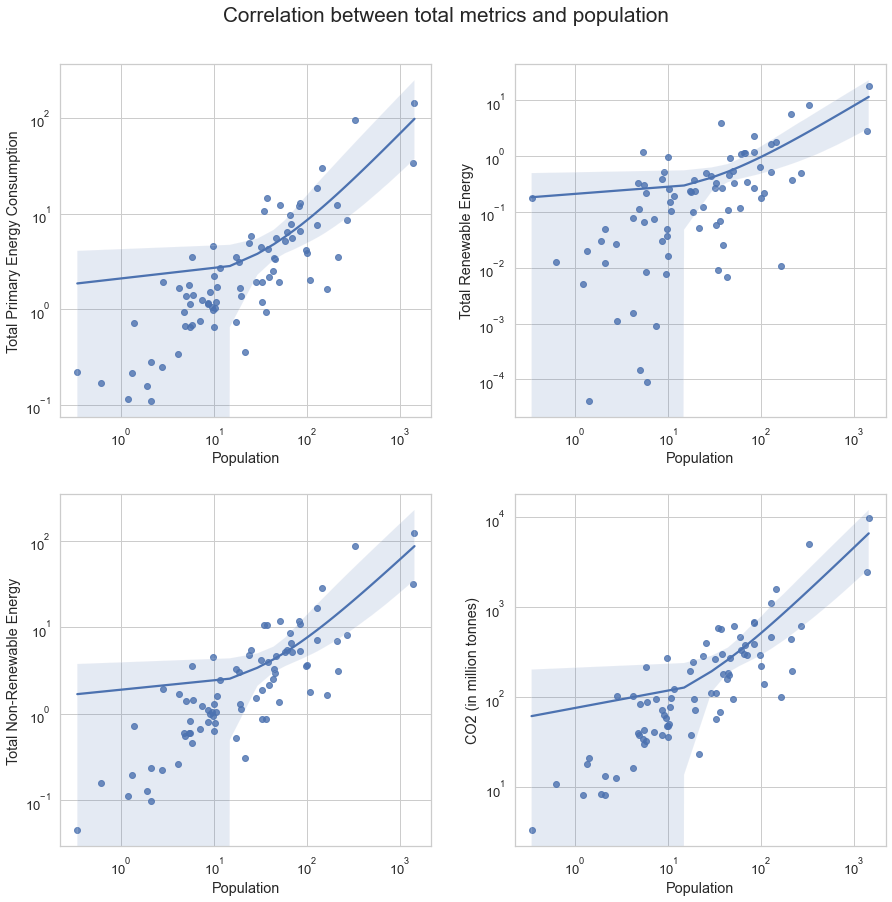

In [73]:
sns.set(rc={'figure.figsize':(13, 13)}, font_scale = 1.2, style = "whitegrid")
df_year = df_final[df_final['Year']==2019 ]
df_year.reset_index()
df_year = df_year[~df_year['Country'].str.contains(pat = "Total")] 

#df_year = df_year[(df_year["Population"] <400) & (df_year["Total Primary Energy Consumption"] < 50)]
plt.suptitle('Correlation between total metrics and population',fontsize = 'x-large')
plt.subplot(2,2,1)
sns.regplot(x=df_year['Population'], y=df_year['Total Primary Energy Consumption'])
plt.xscale("log")
plt.yscale("log")
plt.subplot(2, 2, 2)
sns.regplot(x=df_year['Population'], y=df_year['Total Renewable Energy'])
plt.xscale("log")
plt.yscale("log")
plt.subplot(2, 2, 3)
sns.regplot(x=df_year['Population'], y=df_year['Total Non-Renewable Energy'])
plt.xscale("log")
plt.yscale("log")
plt.subplot(2, 2, 4)
sns.regplot(x=df_year['Population'], y=df_year['CO2 (in million tonnes)'])
plt.xscale("log")
plt.yscale("log")
plt.tight_layout(pad=2)
plt.show()

The regression line appears as a curve on the log-log scale. We can see a clear positive correlation between each of these metrics and population

Let us look at Total Energy Consumption against population again, but this time on a linear scale.

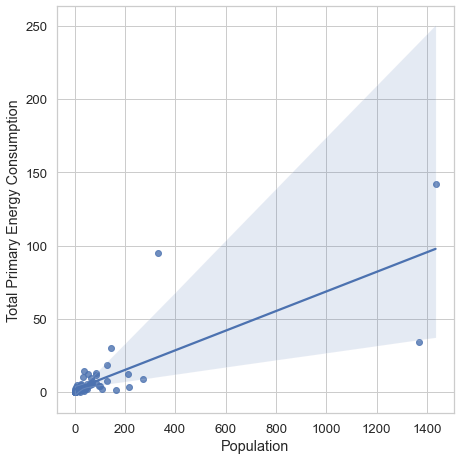

In [74]:
sns.set(rc={'figure.figsize':(7, 7)}, font_scale = 1.2, style = "whitegrid")
df_year = df_final[df_final['Year']==2019 ]
df_year.reset_index()
df_year = df_year[~df_year['Country'].str.contains(pat = "Total")] 

sns.regplot(x=df_year['Population'], y=df_year['Total Primary Energy Consumption'])
plt.tight_layout(pad=2)
plt.show()

We can see a few outliers on this plot which either have very high population or very high total energy consumption. Let us identify these countries

In [75]:
df_outliers = df_year[(df_year['Total Primary Energy Consumption']>50) | (df_year["Population"] > 400)]
df_outliers

Country  Year   Population         Region     Sub Region  OPEC   EU  \
995    China  2019  1433.783692   Asia Pacific   Asia Pacific   0.0  0.0   
2111   India  2019  1366.417756   Asia Pacific   Asia Pacific   0.0  0.0   
6113      US  2019   329.064917  North America  North America   0.0  0.0   

      OECD  CIS  CO2 (in million tonnes)  Total Primary Energy Consumption  \
995    0.0  0.0              9810.456419                        142.028730   
2111   0.0  0.0              2471.946172                         33.891359   
6113   1.0  0.0              5029.389363                         94.895969   

      Total Renewable Energy  Total Non-Renewable Energy  Total Electricity  \
995                18.094694                  123.934035          27.012341   
2111                2.770269                   31.121090           5.773231   
6113                8.254625                   86.641344          15.880174   

      Electricity from Fossil Fuels  Electricity from Non-Fossil Fuels  \
995                       18.334613                           8.677728   
2111                       4.525404                           1.247828   
6113                       9.993688                           5.886485   

           Coal  Natural Gas        Oil   Nuclear  Hydroelectricity     Solar  \
995   81.788988    11.101566  27.935037  3.108444         11.343886  1.996821   
2111  18.597664     2.133012   9.987815  0.402599          1.444266  0.412448   
6113  11.341655    30.572556  37.131994  7.595138          2.544767  0.962519   

          Wind  Geothermal and Biomass  Biofuels      GDP    HDI  
995   3.612998                1.004863  0.136126  16117.0  0.761  
2111  0.564407                0.264464  0.084685   6754.0  0.645  
6113  2.664251                0.684807  1.398281  62683.0  0.926

In [76]:
outliers = list(df_outliers['Country'].unique())
print(outliers)

['China', 'India', 'US']


### Per capita metrics vs population

Now let us compare these plots with those for per-capita values

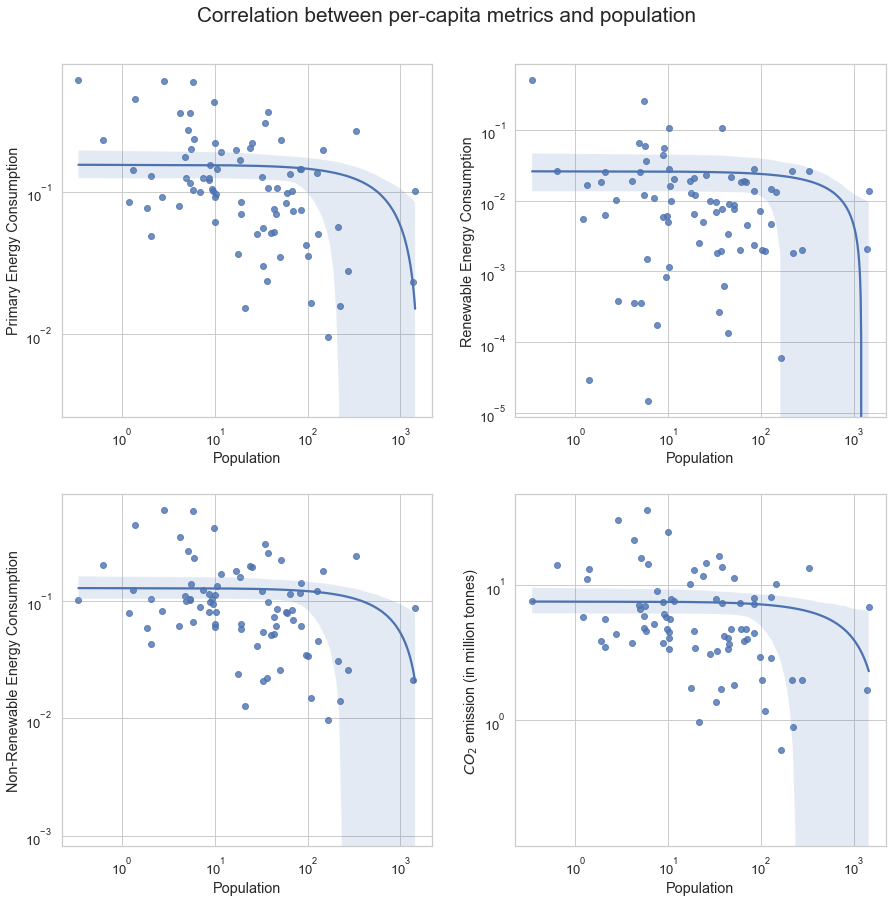

In [77]:
sns.set(rc={'figure.figsize':(13, 13)}, font_scale = 1.2, style = "whitegrid")
df_year = df_per_capita[df_per_capita['Year']==2020]
df_year.reset_index()
df_year = df_year[~df_year['Country'].str.contains(pat = "Total")] 

plt.suptitle('Correlation between per-capita metrics and population',fontsize = 'x-large')
plt.subplot(2,2,1)
sns.regplot(x=df_year['Population'], y=df_year['Total Primary Energy Consumption'])
plt.xscale("log")
plt.ylabel('Primary Energy Consumption')
plt.yscale("log")
plt.subplot(2, 2, 2)
sns.regplot(x=df_year['Population'], y=df_year['Total Renewable Energy'])
plt.xscale("log")
plt.ylabel('Renewable Energy Consumption')
plt.yscale("log")
plt.subplot(2, 2, 3)
sns.regplot(x=df_year['Population'], y=df_year['Total Non-Renewable Energy'])
plt.xscale("log")
plt.ylabel('Non-Renewable Energy Consumption')
plt.yscale("log")
plt.subplot(2, 2, 4)
sns.regplot(x=df_year['Population'], y=df_year['CO2 (in million tonnes)'])
plt.xscale("log")
plt.ylabel(r'$CO_2$ emission (in million tonnes)')
plt.yscale("log")
plt.tight_layout(pad=2)
plt.show()

We can clearly see that the dependence on population is far lesser with an almost horizontal regression line fitting the points. Above a certain population however we notice a sharp drop in per-capita energy consumption as well as emission. This lower per-capita consumption and CO2 emission in high population countries indicates poor resource availability or lower living standards in these high population countries.

### Development metrics 

We now plot GDP vs Population <br>
NOTE: GDP everywhere is GDP per capita

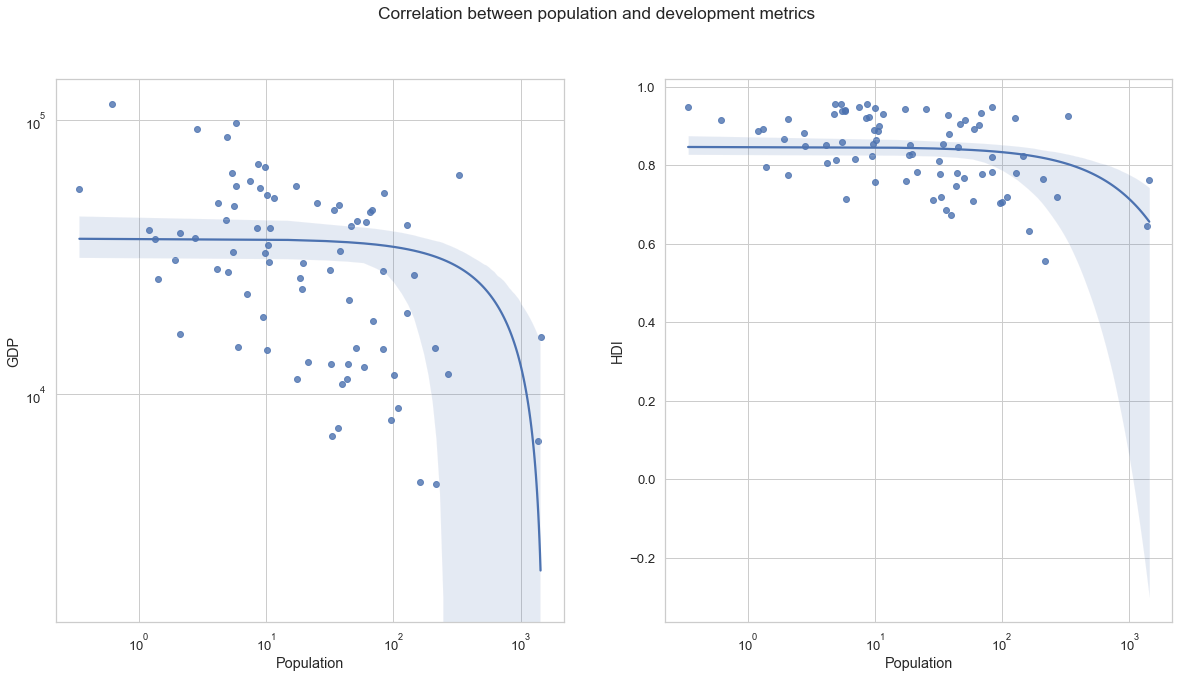

In [78]:
sns.set(rc={'figure.figsize':(20, 10)}, font_scale = 1.2, style = "whitegrid")
df_year = df_final[df_final['Year']==2019]
df_year.reset_index()
df_year = df_year[~df_year['Country'].str.contains(pat = "Total")] 

plt.suptitle("Correlation between population and development metrics")
plt.subplot(1,2,1)
sns.regplot(y=df_year['GDP'], x=df_year['Population'])
plt.xscale("log")
plt.yscale("log")


plt.subplot(1,2,2)
sns.regplot(y=df_year['HDI'], x=df_year['Population'])
plt.xscale("log")
#plt.yscale("log")

plt.show()

These observations again verify the claim that countries with larger population are on average less developed (as estimated by GDP and HDI) but these are not strongly correlated with population

### Per capita metrics vs GDP

Next we will see how energy usage and CO2 emission is correlated with GDP

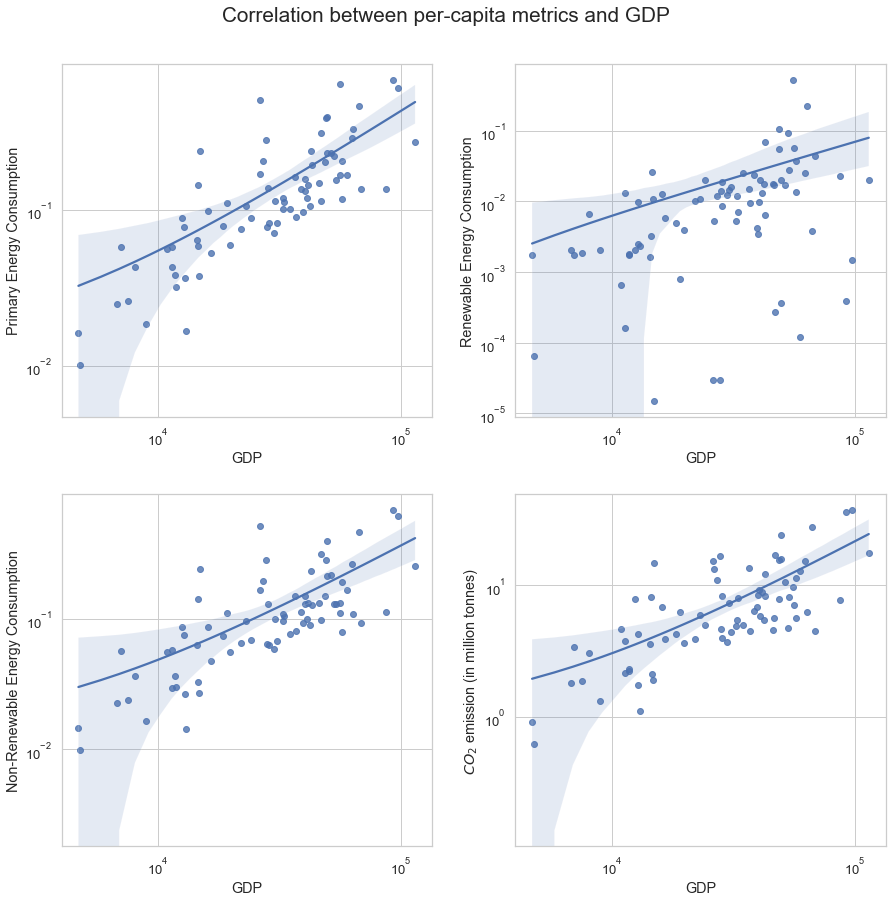

In [79]:
sns.set(rc={'figure.figsize':(13, 13)}, font_scale = 1.2, style = "whitegrid")
df_year = df_per_capita[df_per_capita['Year']==2019]
df_year.reset_index()
df_year = df_year[~df_year['Country'].str.contains(pat = "Total")] 

plt.suptitle('Correlation between per-capita metrics and GDP',fontsize = 'x-large')
plt.subplot(2,2,1)
sns.regplot(x=df_year['GDP'], y=df_year['Total Primary Energy Consumption'])
#r = r2_score(list(df_year['GDP']), list(df_year['Total Primary Energy Consumption']))
#plt.text(r)
plt.xscale("log")
plt.ylabel('Primary Energy Consumption')
plt.yscale("log")
plt.subplot(2, 2, 2)
sns.regplot(x=df_year['GDP'], y=df_year['Total Renewable Energy'])
plt.xscale("log")
plt.ylabel('Renewable Energy Consumption')
plt.yscale("log")
plt.subplot(2, 2, 3)
sns.regplot(x=df_year['GDP'], y=df_year['Total Non-Renewable Energy'])
plt.xscale("log")
plt.ylabel('Non-Renewable Energy Consumption')
plt.yscale("log")
plt.subplot(2, 2, 4)
sns.regplot(x=df_year['GDP'], y=df_year['CO2 (in million tonnes)'])
plt.xscale("log")
plt.ylabel(r'$CO_2$ emission (in million tonnes)')
plt.yscale("log")
plt.tight_layout(pad=2)
plt.show()

We can see a clear increasing trend for all 4 plots. This is indicative of the fact that more developed countries (as measured by GDP) enjoy a higher standard of living and thus, individuals consume more energy and also generate more CO2 on average.

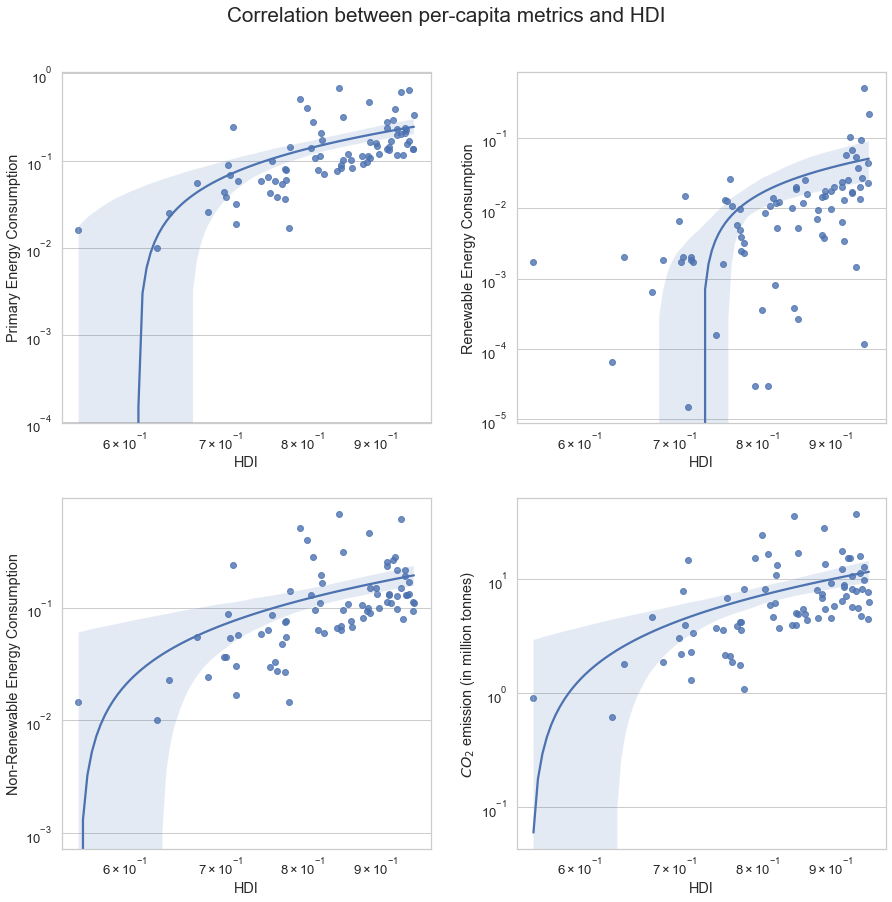

In [80]:
sns.set(rc={'figure.figsize':(13, 13)}, font_scale = 1.2, style = "whitegrid")
df_year = df_per_capita[df_per_capita['Year']==2019]
df_year.reset_index()
df_year = df_year[~df_year['Country'].str.contains(pat = "Total")] 

plt.suptitle('Correlation between per-capita metrics and HDI',fontsize = 'x-large')
plt.subplot(2,2,1)
sns.regplot(x=df_year['HDI'], y=df_year['Total Primary Energy Consumption'])
plt.xscale("log")
plt.ylabel('Primary Energy Consumption')
plt.yscale("log")
plt.subplot(2, 2, 2)
sns.regplot(x=df_year['HDI'], y=df_year['Total Renewable Energy'])
plt.xscale("log")
plt.ylabel('Renewable Energy Consumption')
plt.yscale("log")
plt.subplot(2, 2, 3)
sns.regplot(x=df_year['HDI'], y=df_year['Total Non-Renewable Energy'])
plt.xscale("log")
plt.ylabel('Non-Renewable Energy Consumption')
plt.yscale("log")
plt.subplot(2, 2, 4)
sns.regplot(x=df_year['HDI'], y=df_year['CO2 (in million tonnes)'])
plt.xscale("log")
plt.ylabel(r'$CO_2$ emission (in million tonnes)')
plt.yscale("log")
plt.tight_layout(pad=2)
plt.show()

Similar to the plots against GDP, we see an increasing trend for all 4 plots. In order to compare the degree of correlation for the variables analysed so far we will plot a correlation heatmap. 

### Correlation heatmap

In [81]:
sns.set(rc={'figure.figsize':(9,7)}, font_scale = 1.2, style = "whitegrid")
df_mx = df_per_capita[['Total Primary Energy Consumption','Total Renewable Energy','Total Non-Renewable Energy','CO2 (in million tonnes)', 'GDP', 'HDI','Population']]
rename_cols = ['Primary Energy Consumption per capita','Renewable Energy per capita','Non-Renewable Energy per capita',r'$CO_2$ (in million tonnes)','GDP', 'HDI','Population']
rename_dict = dict(zip(list(df_mx.columns),rename_cols))
df_mx.rename(columns = rename_dict, inplace = True)
df_mx = df_mx.corr()

In [82]:
### The code for this cell is borrowed from StackExchange
def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero.

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower offset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax / (vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highest point in the colormap's range.
          Defaults to 1.0 (no upper offset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

In [83]:
import matplotlib
orig_cmap = matplotlib.cm.BrBG
cmap_shifted =  shiftedColorMap(orig_cmap, midpoint = .23)

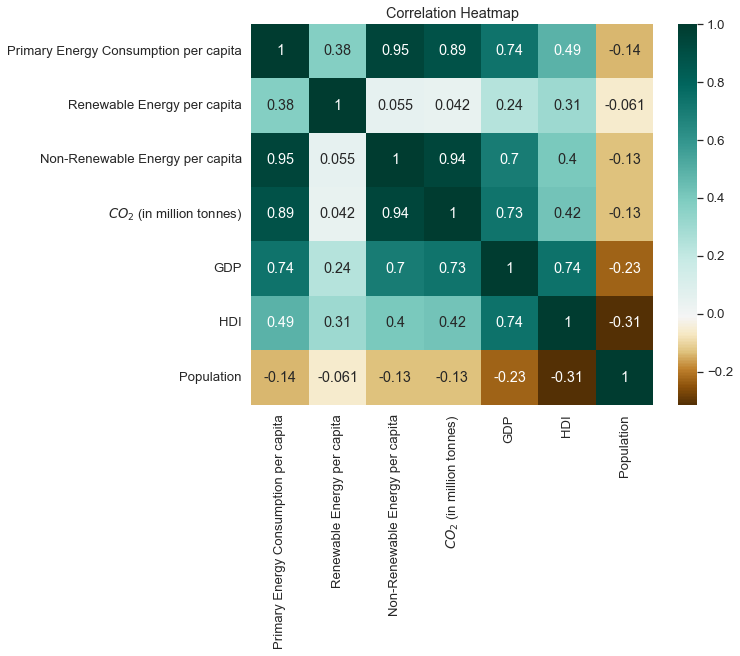

In [84]:
sns.heatmap(df_mx, annot = True, cmap =cmap_shifted)
plt.title('Correlation Heatmap')
plt.show()

#### Positive correlation
Primary Energy Consumption with Non-renewable energy consumption, CO2 emission and GDP <br>
Non-renewable energy consumption has strong positive correlation with CO2 emissions <br>
CO2 has strong positive correlation with GDP <br>

#### Negative correlation
Population has negative correlation with GDP and HDI

## Distribution of Well-being in the World

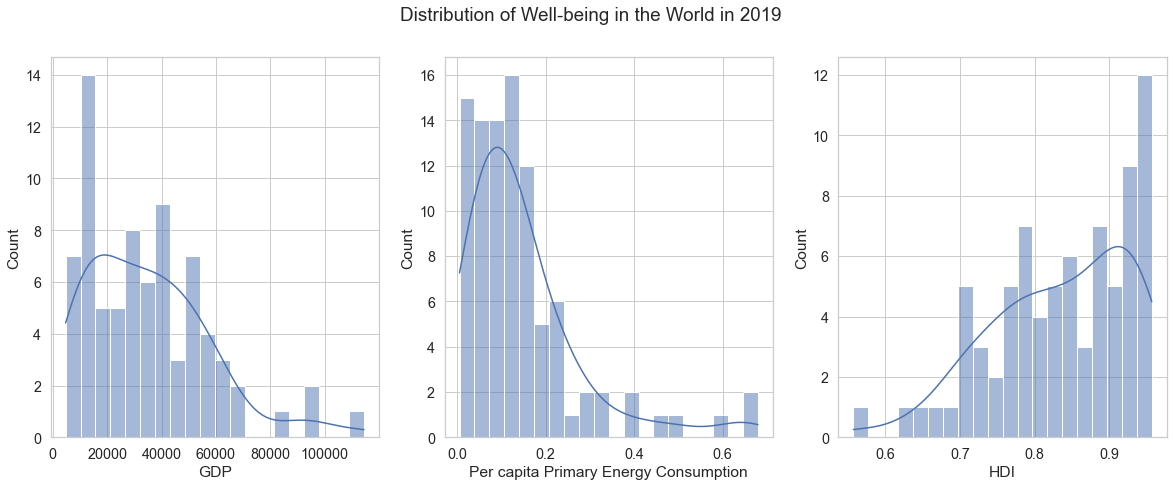

In [85]:
df_hist = df_per_capita[df_per_capita["Year"] == 2019]
sns.set(rc={'figure.figsize':(20, 7)}, font_scale = 1.3, style = "whitegrid")
plt.subplot(1,3,1)
sns.histplot(data = df_hist , x= "GDP", bins = 20, kde = True)

plt.subplot(1,3,2)
sns.histplot(data = df_hist , x= "Total Primary Energy Consumption", bins = 20, kde = True)
plt.xlabel('Per capita Primary Energy Consumption')

plt.subplot(1,3,3)
sns.histplot(data = df_hist , x= "HDI", bins = 20, kde = True)

plt.suptitle('Distribution of Well-being in the World in 2019')
plt.show()

We can see a left skew in the graphs for GDP and energy consumption which indicates that very few countries enjoy a high per-capita GDP and high per-capita energy consumption, both of which are metrics for wellbeing of individuals. This confirms what we saw in the scatterplots as high clustering near the origin. However, the graph for HDI is right skewed which is indicative of the fact that despite low economic output and energy usage many countries enjoy a good quality of life as measured by HDI. HDI is considered a more holistic metric since it takes into accountthe quality of health, education and several other human factors.

## Visualisation on the World Map with GeoPandas

### Create a function for easy visualisation

First let us define a function to easily plot data for any column on the world map. This will take countries along with one column as an argument and generate a choropleth (shaded map) with shading indicating values in the column. _Note that data for large parts of Africa and few other countries is not available._

In [86]:
import geopandas as gpd
from matplotlib import pyplot as plt
import pandas as pd
import mapclassify
import shapefile as shp



countries_shape = gpd.read_file("Shape file/World_Countries.shp")
countries_shape = countries_shape.rename(columns={'COUNTRY': 'Country'})
countries_shape = countries_shape.set_index('Country')  
                             
# data is the data to plot. It is a dataframe of countriesx2 in the form (Country_name, Value to plot)
# colorScheme determines the "cmap" attribute's value for the plot. Options can be found for cmap in matplotlib
# isBig helps to choose between two different sizes of plots.

def geoPlot(data,plot_title, bins = 19,colorScheme = 'Blues', fileName = 'plot', isBig = False):
    if isBig:
        pltSize = (70,35)
        fSize = 40
        legendScale = 4
    else:
        pltSize = (20,10)
        fSize = 12
        legendScale = 1.5


    data = data.set_index('Country')
    ### Changing Russian Federation to Russia
    if "Russian Federation" in data.index:
        as_list = data.index.tolist()
        idx = as_list.index('Russian Federation')
        as_list[idx] = 'Russia'
        data.index = as_list
    ### Changing US to United States
    if "US" in data.index:
        as_list = data.index.tolist()
        idx = as_list.index('US')
        as_list[idx] = 'United States'
        data.index = as_list
    ### Changing "Curacao" to "Curacao (Netherlands)"
    if "Curacao" in data.index:
        as_list = data.index.tolist()
        idx = as_list.index('Curacao')
        as_list[idx] = 'Curacao (Netherlands)'
        data.index = as_list
    ### Changing "Democratic Republic of Congo" to "Democratic Republic of the Congo"
    if "Democratic Republic of Congo" in data.index:
        as_list = data.index.tolist()
        idx = as_list.index('Democratic Republic of Congo')
        as_list[idx] = 'Democratic Republic of the Congo'
        data.index = as_list
    ### Changing "Trinidad & Tobago" to "Trinidad and Tobago"
    if "Trinidad & Tobago" in data.index:
        as_list = data.index.tolist()
        idx = as_list.index('Trinidad & Tobago')
        as_list[idx] = 'Trinidad and Tobago'
        data.index = as_list
    ### Setting index name
    data.index.name = 'Country'

    data.columns = ['Data']
    mergedDF = countries_shape.join(data)
    
    mergedDF.plot(cmap = colorScheme, column='Data', figsize= pltSize,
                  scheme='quantiles',  k=bins, 
                  legend = True,
                  missing_kwds={
                      "color": "lightgrey",
                      "edgecolor": "grey",
                      "hatch": "///",
                      "label": "Missing values",
                      },
                  legend_kwds={
                      "fontsize":fSize,
                      "loc" :"lower left",
                      #"ncol" : 10,
                      'markerscale' : legendScale,
                      }
                  )
    plt.axis('off')
    plt.title(plot_title, fontsize = 25)
    plt.show()
    plt.savefig(fileName + '.png')

## Well-being metrics visualised on the World Map

### HDI

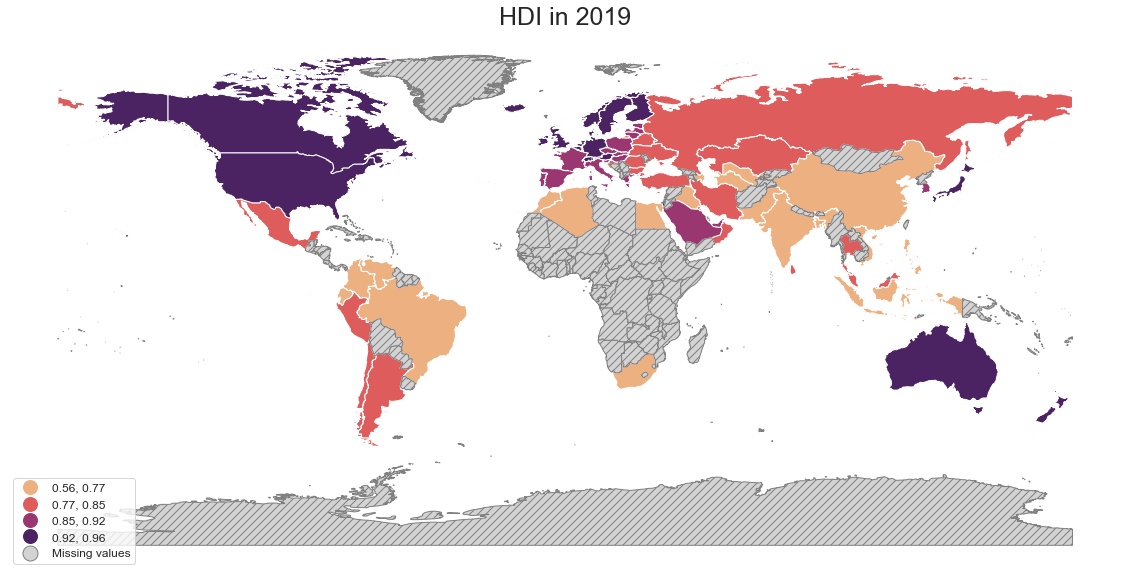

<Figure size 1440x504 with 0 Axes>

In [87]:
geoPlot(df_final[df_final['Year'] == 2019][['Country','HDI']],colorScheme='flare',fileName='HDI_world', plot_title = "HDI in 2019", bins = 4)

### GDP

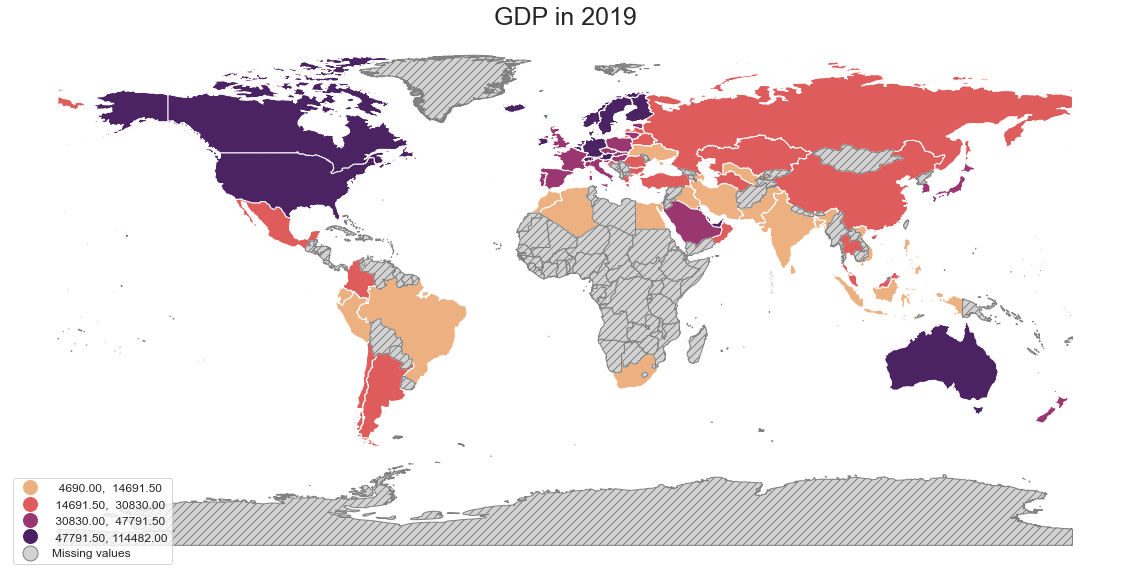

<Figure size 1440x504 with 0 Axes>

In [88]:
geoPlot(df_final[df_final['Year'] == 2019][['Country','GDP']],colorScheme='flare',fileName='GDP_world', plot_title="GDP in 2019", bins = 4)

### Total Energy

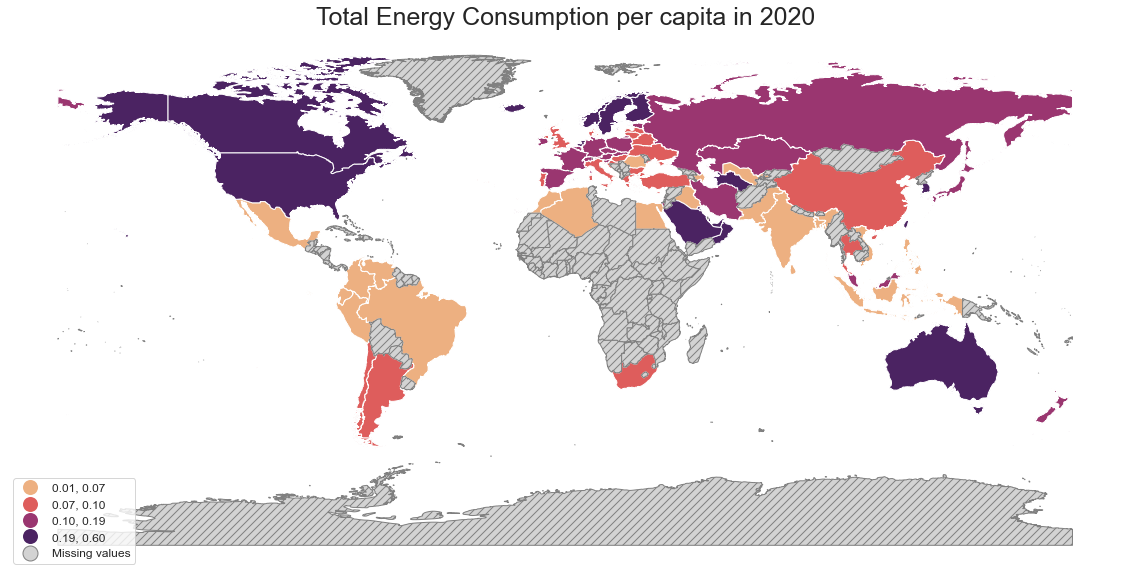

<Figure size 1440x504 with 0 Axes>

In [89]:
geoPlot(df_per_capita[df_per_capita['Year'] == 2020][['Country','Total Primary Energy Consumption']],colorScheme='flare',fileName='Total_energy_world', plot_title="Total Energy Consumption per capita in 2020", bins = 4)

### Fraction of energy which is Renewable

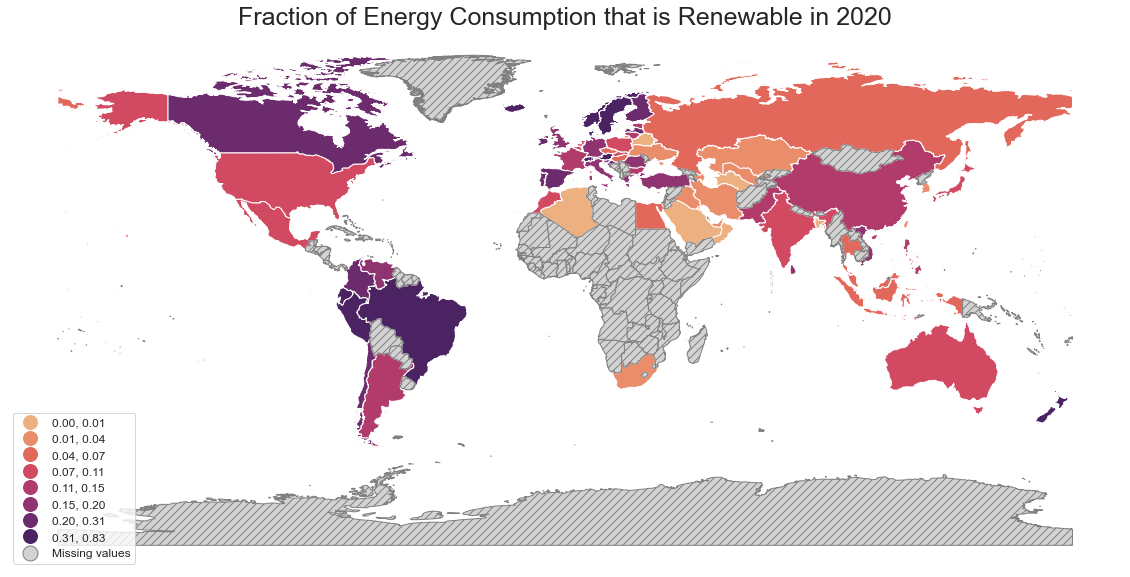

<Figure size 1440x504 with 0 Axes>

In [90]:
df_renewable = df_per_capita[df_per_capita['Year'] == 2020][['Country','Total Renewable Energy']]
df_renewable['Total Renewable Energy'] = df_per_capita[df_per_capita['Year'] == 2020]['Total Renewable Energy']/df_per_capita[df_per_capita['Year'] == 2020]['Total Primary Energy Consumption']
geoPlot(df_renewable,colorScheme='flare',fileName='Renewable_fraction_world', plot_title="Fraction of Energy Consumption that is Renewable in 2020", bins = 8)

## Identify countries with maximum and minimum per capita energy consumption, renewable usage and non renewable usage

### Per capita total energy consumption

In [91]:
total_energy_df = df_per_capita[df_per_capita['Year'] == 2020][['Country','Total Primary Energy Consumption']].copy()

Dropping country groups, only keeping individual countries and then sorting the data

In [92]:
total_energy_df = total_energy_df[~total_energy_df['Country'].str.contains(pat = "Total")] 
total_energy_df.sort_values(by = ['Total Primary Energy Consumption'],inplace = True, ascending = False)

__Top 5 energy consumers (on a per-capita basis)__

In [93]:
total_energy_df.head(5)

Country  Total Primary Energy Consumption
2056               Iceland                          0.601831
3946                 Qatar                          0.594159
4266             Singapore                          0.583891
5890     Trinidad & Tobago                          0.445679
6282  United Arab Emirates                          0.423668

__Lowest 5 energy consumers (on a per-capita basis)__

In [94]:
total_energy_df.tail(5)

Country  Total Primary Energy Consumption
2112        India                          0.023177
3778  Philippines                          0.016654
3625     Pakistan                          0.015728
4658    Sri Lanka                          0.015254
441    Bangladesh                          0.009664

Seeing this data on a plot

In [95]:
top_n_bottom_5 = pd.concat([total_energy_df.head(5),total_energy_df.tail(5)], ignore_index = True)
type_list = ['Top 5' for x in range(10)]
type_list[5:] = ['Bottom 5' for x in range(5)]
top_n_bottom_5['type'] = type_list
top_n_bottom_5

Country  Total Primary Energy Consumption      type
0               Iceland                          0.601831     Top 5
1                 Qatar                          0.594159     Top 5
2             Singapore                          0.583891     Top 5
3     Trinidad & Tobago                          0.445679     Top 5
4  United Arab Emirates                          0.423668     Top 5
5                 India                          0.023177  Bottom 5
6           Philippines                          0.016654  Bottom 5
7              Pakistan                          0.015728  Bottom 5
8             Sri Lanka                          0.015254  Bottom 5
9            Bangladesh                          0.009664  Bottom 5

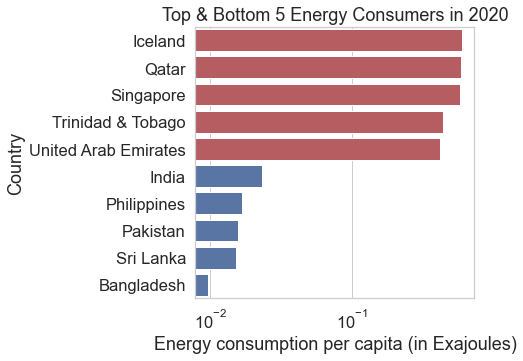

In [96]:
sns.set(rc={'figure.figsize':(5, 5)}, font_scale = 1.5, style = "whitegrid")
sns.barplot(y = 'Country', x = 'Total Primary Energy Consumption', data = top_n_bottom_5, hue = 'type', orient = 'h', palette = ['r', 'b'], dodge = False)
plt.title('Top & Bottom 5 Energy Consumers in 2020')
ax = plt.gca()
ax.legend_ = None # Hide the legend
plt.xlabel('Energy consumption per capita (in Exajoules)')
plt.xscale('log')
plt.show()

Note that we are using a log-scale for this plot since the smaller values are not visible on a linear plot

### Per capita renewable energy consumption

In [97]:
renewable_energy_df = df_per_capita[df_per_capita['Year'] == 2020][['Country','Total Renewable Energy']].copy()

Dropping country groups, only keeping individual countries and then sorting the data

In [98]:
renewable_energy_df = renewable_energy_df[~renewable_energy_df['Country'].str.contains(pat = "Total")] 
renewable_energy_df.sort_values(by = ['Total Renewable Energy'],inplace = True, ascending = False)

__Top 5 renewable energy consumers (on a per-capita basis)__

In [99]:
renewable_energy_df.head(5)

Country  Total Renewable Energy
2056      Iceland                0.499754
3513       Norway                0.251525
4770       Sweden                0.105288
828        Canada                0.104719
3345  New Zealand                0.065061

__Lowest 5 renewable energy consumers (on a per-capita basis)__

In [100]:
renewable_energy_df.tail(5)

Country  Total Renewable Energy
1052  China Hong Kong SAR                0.000172
55                Algeria                0.000133
441            Bangladesh                0.000060
5890    Trinidad & Tobago                0.000030
6058         Turkmenistan                0.000015

Seeing this data on a plot

In [101]:
top_n_bottom_5 = pd.concat([renewable_energy_df.head(5), renewable_energy_df.tail(5)], ignore_index = True)
type_list = ['Top 5' for x in range(10)]
type_list[5:] = ['Bottom 5' for x in range(5)]
top_n_bottom_5['type'] = type_list
top_n_bottom_5

Country  Total Renewable Energy      type
0              Iceland                0.499754     Top 5
1               Norway                0.251525     Top 5
2               Sweden                0.105288     Top 5
3               Canada                0.104719     Top 5
4          New Zealand                0.065061     Top 5
5  China Hong Kong SAR                0.000172  Bottom 5
6              Algeria                0.000133  Bottom 5
7           Bangladesh                0.000060  Bottom 5
8    Trinidad & Tobago                0.000030  Bottom 5
9         Turkmenistan                0.000015  Bottom 5

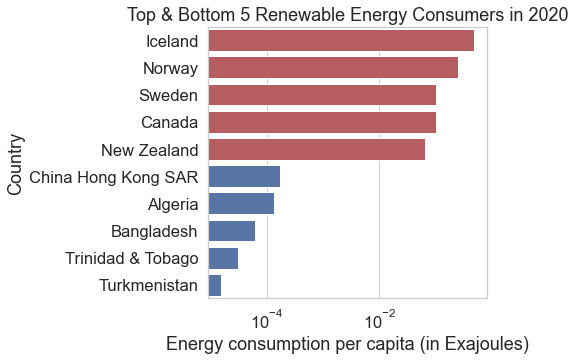

In [102]:
sns.set(rc={'figure.figsize':(5, 5)}, font_scale = 1.5, style = "whitegrid")
sns.barplot(y = 'Country', x = 'Total Renewable Energy', data = top_n_bottom_5, hue = 'type', orient = 'h', palette = ['r', 'b'], dodge = False, ci = "None")
plt.title('Top & Bottom 5 Renewable Energy Consumers in 2020')
ax = plt.gca()
ax.legend_ = None # Hide the legend
plt.xlabel('Energy consumption per capita (in Exajoules)')
plt.xscale('log')
plt.show()

### Renewability Fraction

Let us also look at which country obtains maximum fraction of its enegy renewably. i.e. has the largest per capita renewable consumption divided by total consumption.

In [103]:
sns.set_theme(style="whitegrid")
#sns.color_palette("flare")
#sns.set_context('paper', font_scale = 1.4)
renewability_fraction_df = df_per_capita[(df_per_capita['Year']==2020) & ~(df_per_capita['Country'].str.contains(pat = "Total"))]
renewability_fraction_df['Fraction of energy usage which is renewable']= renewability_fraction_df['Total Renewable Energy']/renewability_fraction_df['Total Primary Energy Consumption']
renewability_fraction_df.sort_values(['Fraction of energy usage which is renewable'], 
            ascending=[False], inplace = True)
renewability_fraction_df = renewability_fraction_df[['Country','Fraction of energy usage which is renewable']]

In [104]:
top_n_bottom_5 = pd.concat([renewability_fraction_df.head(5), renewability_fraction_df.tail(5)], ignore_index = True)
type_list = ['Top 5' for x in range(10)]
type_list[5:] = ['Bottom 5' for x in range(5)]
top_n_bottom_5['type'] = type_list
top_n_bottom_5

Country  Fraction of energy usage which is renewable      type
0            Iceland                                     0.830389     Top 5
1             Norway                                     0.706599     Top 5
2             Sweden                                     0.483461     Top 5
3             Brazil                                     0.460538     Top 5
4        New Zealand                                     0.373296     Top 5
5             Kuwait                                     0.001006  Bottom 5
6       Saudi Arabia                                     0.000873  Bottom 5
7              Qatar                                     0.000639  Bottom 5
8  Trinidad & Tobago                                     0.000067  Bottom 5
9       Turkmenistan                                     0.000064  Bottom 5

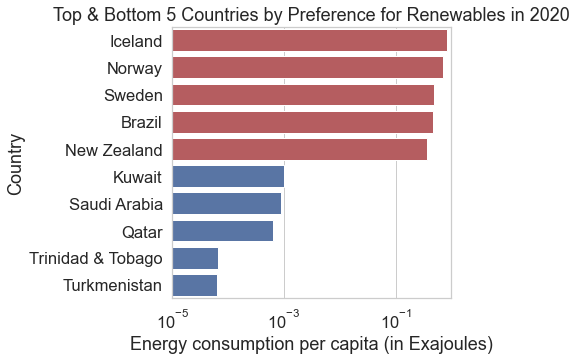

In [105]:
sns.set(rc={'figure.figsize':(5, 5)}, font_scale = 1.5, style = "whitegrid")
sns.barplot(y = 'Country', x = 'Fraction of energy usage which is renewable', data = top_n_bottom_5, hue = 'type', orient = 'h', palette = ['r', 'b'], dodge = False, ci = "None")
plt.title('Top & Bottom 5 Countries by Preference for Renewables in 2020')
ax = plt.gca()
ax.legend_ = None # Hide the legend
plt.xlabel('Energy consumption per capita (in Exajoules)')
plt.xlim([0.00001,1])
plt.xscale('log')
plt.show()

Iceland, Norway, Sweden, Brazil and New Zealand are the top 5 consumers of renewable energy as a fraction of total energy. We will analyse these countries in detail further.

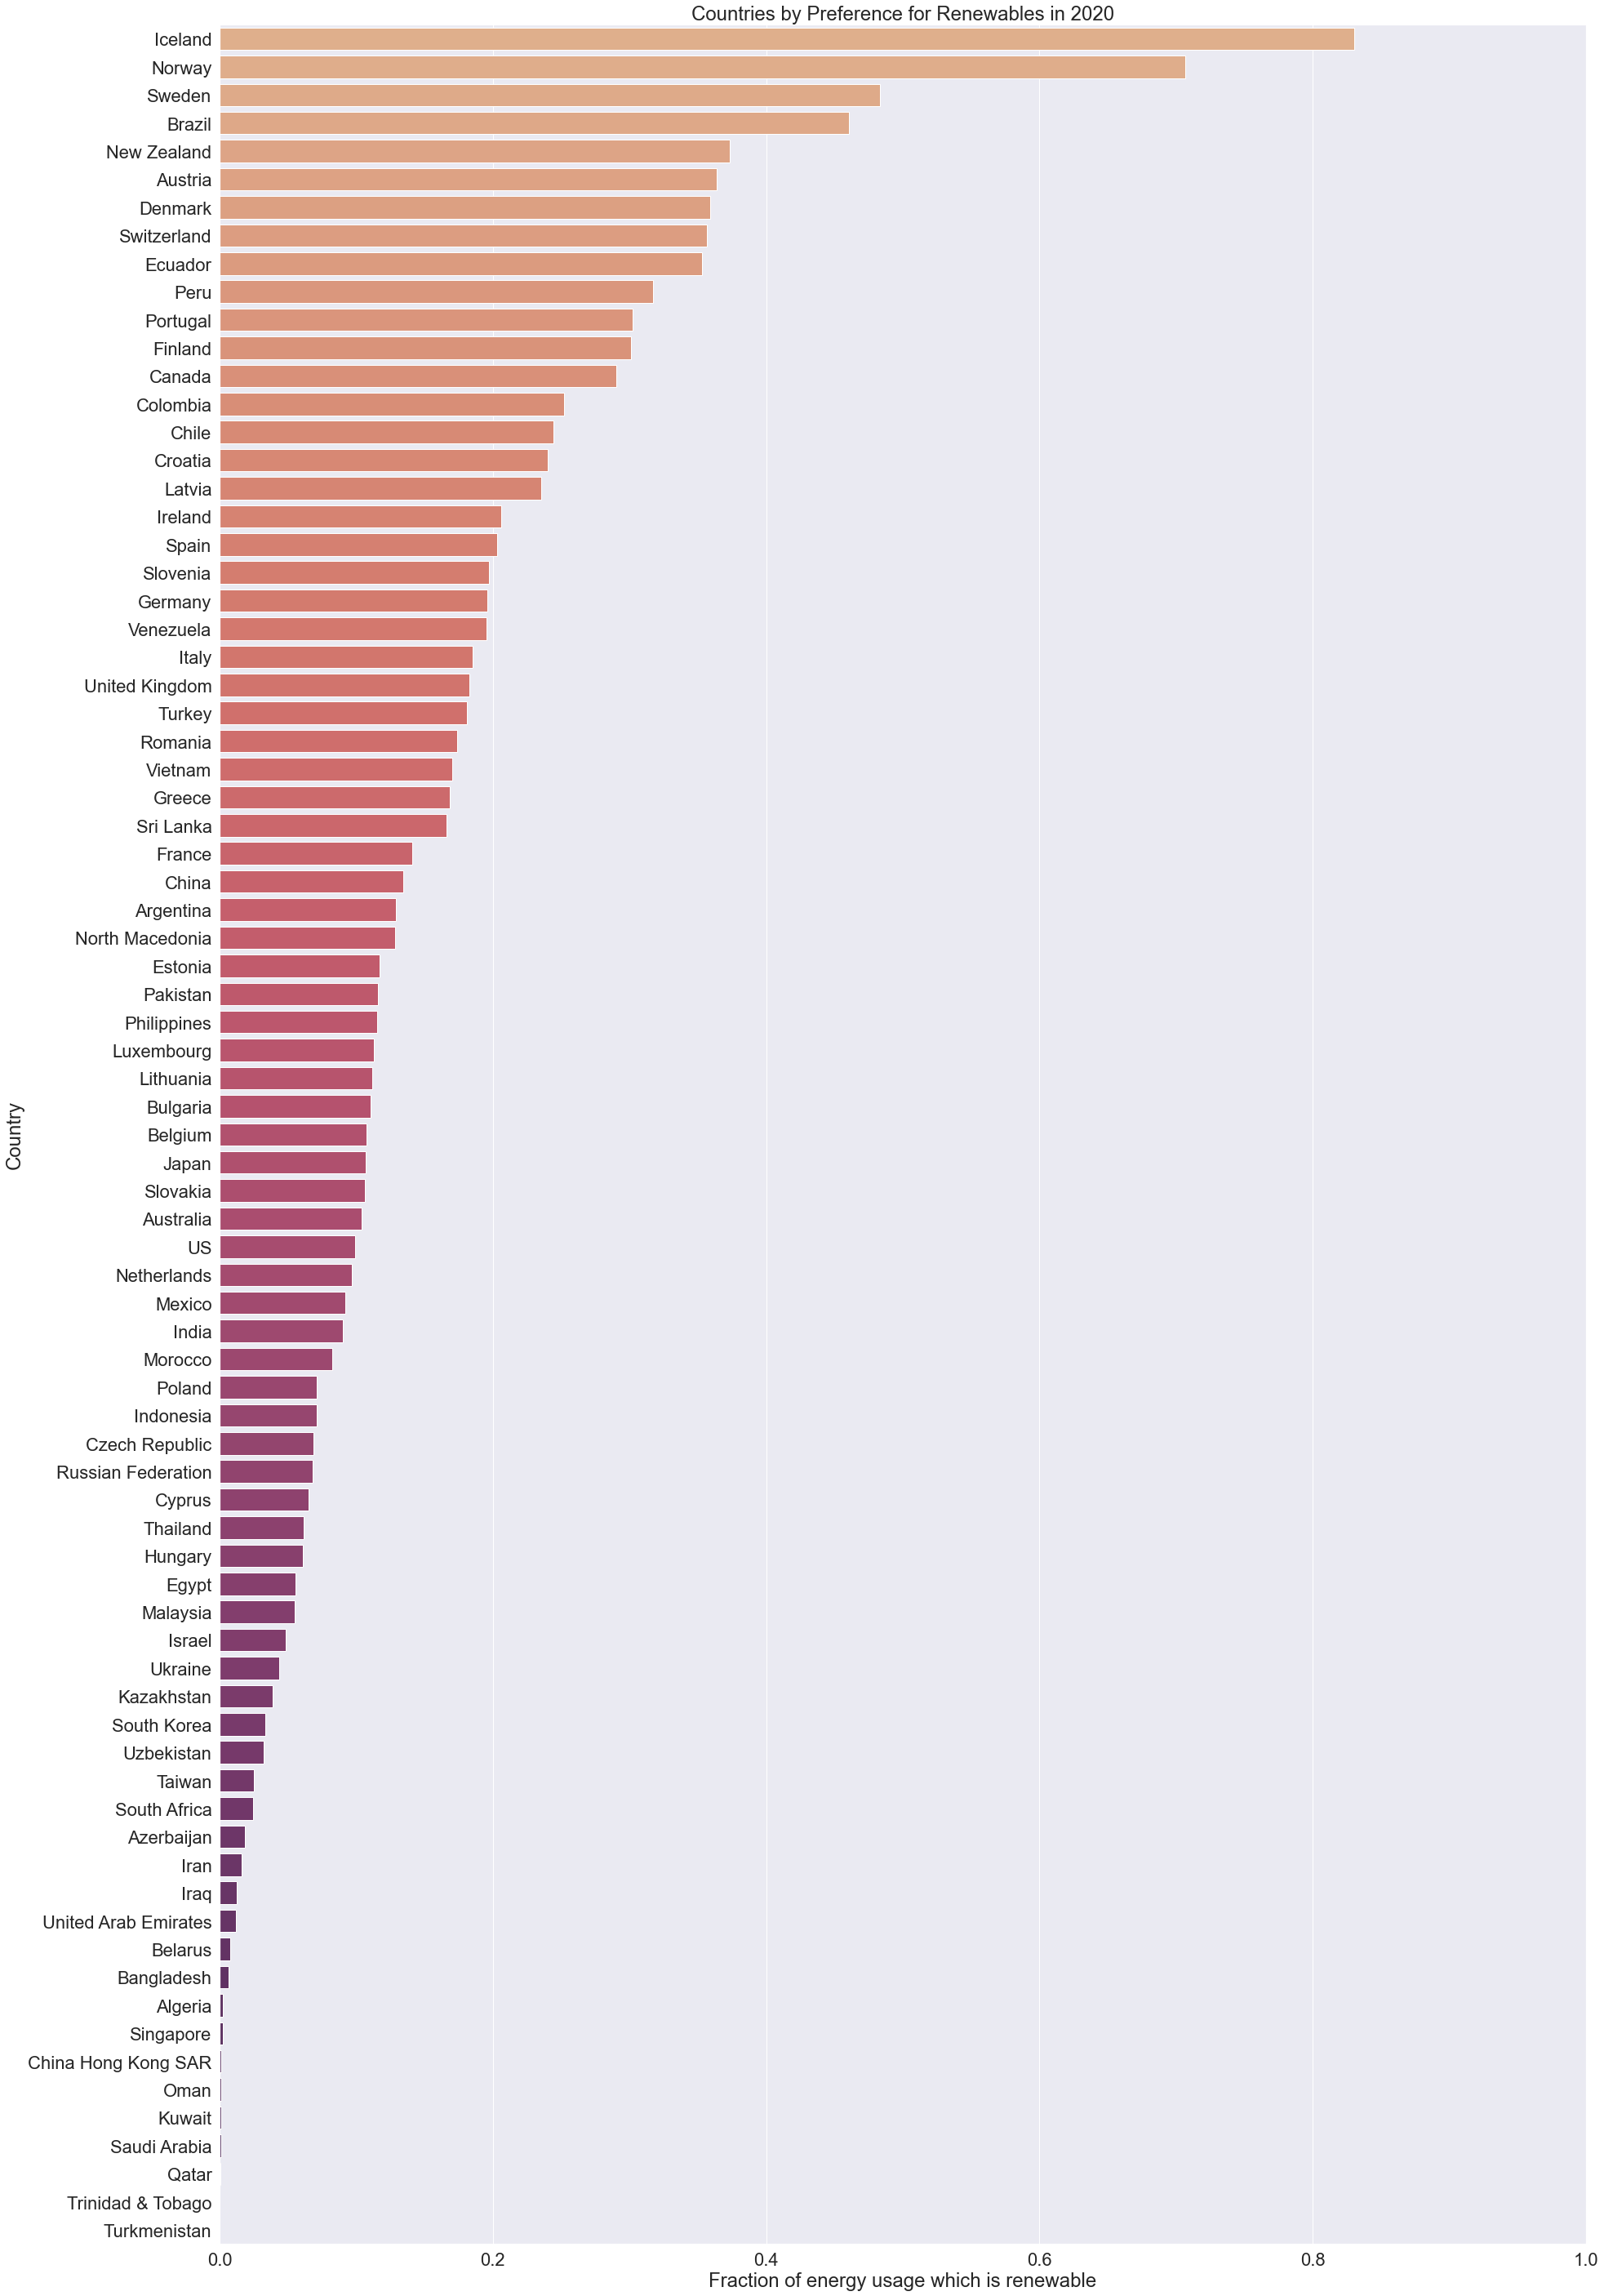

In [106]:
sns.set(rc={'figure.figsize':(30,50)}, font_scale = 2)
sns.barplot(y = 'Country', x = 'Fraction of energy usage which is renewable', 
            data =renewability_fraction_df ,dodge=False, orient = 'h', ci = None, palette = "flare" ) #hue = 'type', orient = 'h', palette = ['r', 'b'],dodge=False)
plt.title('Countries by Preference for Renewables in 2020')
plt.xlim([0,1])
ax = plt.gca()
ax.legend_ = None # Hide the legend
plt.show()

Surprisingly Trinidad and Tobago, Qatar which were among the top energy consumers, consumes very little renewable energy. This suggests that most of their consumption is non-renewable. We will verify this further. <br>

### Per capita non-renewable energy consumption

In [107]:
non_renewable_energy_df = df_per_capita[df_per_capita['Year'] == 2020][['Country','Total Non-Renewable Energy']].copy()

Dropping country groups, only keeping individual countries and then sorting the data

In [108]:
non_renewable_energy_df = non_renewable_energy_df[~non_renewable_energy_df['Country'].str.contains(pat = "Total")] 
non_renewable_energy_df.sort_values(by = ['Total Non-Renewable Energy'],inplace = True, ascending = False)

__Top 5 non-renewable energy consumers (on a per-capita basis)__

In [109]:
non_renewable_energy_df.head(5)

Country  Total Non-Renewable Energy
3946                 Qatar                    0.593780
4266             Singapore                    0.582412
5890     Trinidad & Tobago                    0.445649
6282  United Arab Emirates                    0.418676
2616                Kuwait                    0.352521

__Lowest 5 non-renewable energy consumers (on a per-capita basis)__

In [110]:
non_renewable_energy_df.tail(5)

Country  Total Non-Renewable Energy
3722         Peru                    0.020647
3778  Philippines                    0.014733
3625     Pakistan                    0.013905
4658    Sri Lanka                    0.012720
441    Bangladesh                    0.009604

Seeing this data on a plot

In [111]:
top_n_bottom_5 = pd.concat([non_renewable_energy_df.head(5), non_renewable_energy_df.tail(5)], ignore_index = True)
type_list = ['Top 5' for x in range(10)]
type_list[5:] = ['Bottom 5' for x in range(5)]
top_n_bottom_5['type'] = type_list
top_n_bottom_5

Country  Total Non-Renewable Energy      type
0                 Qatar                    0.593780     Top 5
1             Singapore                    0.582412     Top 5
2     Trinidad & Tobago                    0.445649     Top 5
3  United Arab Emirates                    0.418676     Top 5
4                Kuwait                    0.352521     Top 5
5                  Peru                    0.020647  Bottom 5
6           Philippines                    0.014733  Bottom 5
7              Pakistan                    0.013905  Bottom 5
8             Sri Lanka                    0.012720  Bottom 5
9            Bangladesh                    0.009604  Bottom 5

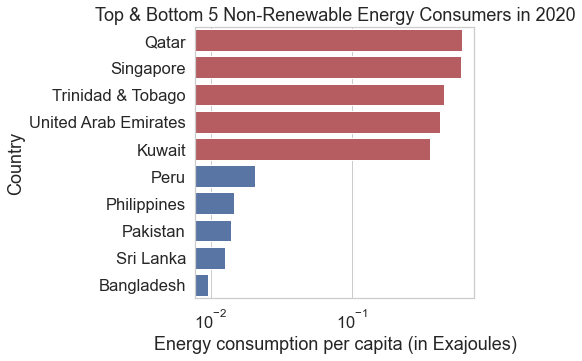

In [112]:
sns.set(rc={'figure.figsize':(5, 5)}, font_scale = 1.5, style = "whitegrid")
sns.barplot(y = 'Country', x = 'Total Non-Renewable Energy', data = top_n_bottom_5, hue = 'type', orient = 'h', palette = ['r', 'b'], dodge = False)
plt.title('Top & Bottom 5 Non-Renewable Energy Consumers in 2020')
ax = plt.gca()
ax.legend_ = None # Hide the legend
plt.xlabel('Energy consumption per capita (in Exajoules)')
plt.xscale('log')
plt.show()

### Top and bottom 5 $CO_2$ emitters

In [113]:
co2_df = df_per_capita[df_per_capita['Year'] == 2020][['Country','CO2 (in million tonnes)']].copy()
co2_df = co2_df[~co2_df['Country'].str.contains(pat = "Total")] 
co2_df.sort_values(by = ['CO2 (in million tonnes)'],inplace = True, ascending = False)

top_n_bottom_5 = pd.concat([co2_df.head(5), co2_df.tail(5)], ignore_index = True)
type_list = ['Top 5' for x in range(10)]
type_list[5:] = ['Bottom 5' for x in range(5)]
top_n_bottom_5['type'] = type_list
top_n_bottom_5

Country  CO2 (in million tonnes)      type
0             Singapore                36.068728     Top 5
1                 Qatar                30.424702     Top 5
2  United Arab Emirates                24.862584     Top 5
3                Kuwait                21.442510     Top 5
4          Saudi Arabia                16.397049     Top 5
5                  Peru                 1.351350  Bottom 5
6           Philippines                 1.162633  Bottom 5
7             Sri Lanka                 0.973562  Bottom 5
8              Pakistan                 0.887511  Bottom 5
9            Bangladesh                 0.594951  Bottom 5

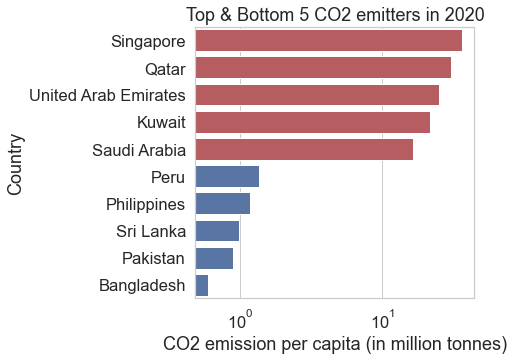

In [114]:
sns.set(rc={'figure.figsize':(5, 5)}, font_scale = 1.5, style = "whitegrid")
sns.barplot(y = 'Country', x = 'CO2 (in million tonnes)', data = top_n_bottom_5, hue = 'type', orient = 'h', palette = ['r', 'b'], dodge = False)
plt.title('Top & Bottom 5 CO2 emitters in 2020')
ax = plt.gca()
ax.legend_ = None # Hide the legend
plt.xlabel('CO2 emission per capita (in million tonnes)')
plt.xscale('log')
plt.show()

We can observe that Singapore and Qatar while being top non-renewable consumers are also top $CO_2$ emitters. None of the top renewable users feature on this list. This also goes to show the lower $CO_2$ emission of renewables.

## Categorise countries based on GDP

We will divide countries into 3 quantiles based on GDP

In [115]:
def returnGDPcat(x, year):
    gdp_quartile = pd.DataFrame(df_final[df_final["Year"] == year]["GDP"].quantile([0.33, 0.66]))
    if np.isnan(x):
        return np.nan
    if x < gdp_quartile["GDP"][.33]:
        return 0            # Low Income
    elif x < gdp_quartile["GDP"][.66]:
        return 1            # Lower middle Income
    else:
        return 2            # Upper middle Incom

gdp_category = pd.DataFrame(np.nan, index = range(df.shape[0]), columns=['GDP Category'])
for i in df_final.index:
    cat = returnGDPcat(df_final['GDP'][i], df_final['Year'][i] )
    gdp_category['GDP Category'][i] = cat

df_final = df_final.join(gdp_category)

Similarly for per capita data

In [116]:
df_per_capita = df_per_capita.join(gdp_category)

In [117]:

countries_by_gdp = {0:[],1:[],2:[]}
for i in range(3):
    countries_by_gdp[i] = list(df_final[(df_final['Year']==2019) & (df_final['GDP Category'] == i)].sort_values("GDP", ascending= False)['Country'].unique())

print(countries_by_gdp)

{0: ['Mexico', 'Belarus', 'Thailand', 'North Macedonia', 'China', 'Turkmenistan', 'Colombia', 'Brazil', 'Iran', 'Azerbaijan', 'Sri Lanka', 'Peru', 'Ukraine', 'South Africa', 'Indonesia', 'Egypt', 'Ecuador', 'Algeria', 'Iraq', 'Philippines', 'Vietnam', 'Morocco', 'Uzbekistan', 'India', 'Bangladesh', 'Pakistan'], 1: ['Japan', 'Spain', 'Czech Republic', 'Israel', 'Cyprus', 'Slovenia', 'Lithuania', 'Estonia', 'Portugal', 'Poland', 'Slovakia', 'Hungary', 'Latvia', 'Greece', 'Romania', 'Croatia', 'Malaysia', 'Turkey', 'Oman', 'Russian Federation', 'Kazakhstan', 'Trinidad & Tobago', 'Chile', 'Bulgaria', 'Argentina'], 2: ['Luxembourg', 'Singapore', 'Qatar', 'Ireland', 'Switzerland', 'United Arab Emirates', 'Norway', 'US', 'China Hong Kong SAR', 'Denmark', 'Netherlands', 'Austria', 'Iceland', 'Germany', 'Sweden', 'Belgium', 'Kuwait', 'Australia', 'Canada', 'Finland', 'Saudi Arabia', 'United Kingdom', 'France', 'New Zealand', 'South Korea', 'Italy']}


Now let us look at the trends for various quanities of interest in these 3 GDP groups. Let us also identify important trends within these groups

In each category we will select the top and bottom 3 countries by GDP to capture the broader trend. We will also keep World data as a reference in each set

In [118]:
top_three = countries_by_gdp[0][0:3]
bottom_three = countries_by_gdp[0][-3:]
l1 = top_three + bottom_three + ["Total World"]
df_low_income = df_per_capita[df_per_capita['Country'].isin(l1)]
print(l1)

['Mexico', 'Belarus', 'Thailand', 'India', 'Bangladesh', 'Pakistan', 'Total World']


In [119]:
top_three = countries_by_gdp[1][0:3]
bottom_three = countries_by_gdp[1][-3:]
l2 = top_three + bottom_three + ["Total World"]
df_middle_income = df_per_capita[df_per_capita['Country'].isin(l2)]
print(l2)

['Japan', 'Spain', 'Czech Republic', 'Chile', 'Bulgaria', 'Argentina', 'Total World']


In [120]:
top_three = countries_by_gdp[2][0:3]
bottom_three = countries_by_gdp[2][-3:]
l3 = top_three + bottom_three + ["Total World"]
df_high_income = df_per_capita[df_per_capita['Country'].isin(l3)]
print(l3)

['Luxembourg', 'Singapore', 'Qatar', 'New Zealand', 'South Korea', 'Italy', 'Total World']


Now let us look at the Total and renewable consumption in each of the chosen countries

### Total primary energy consumption

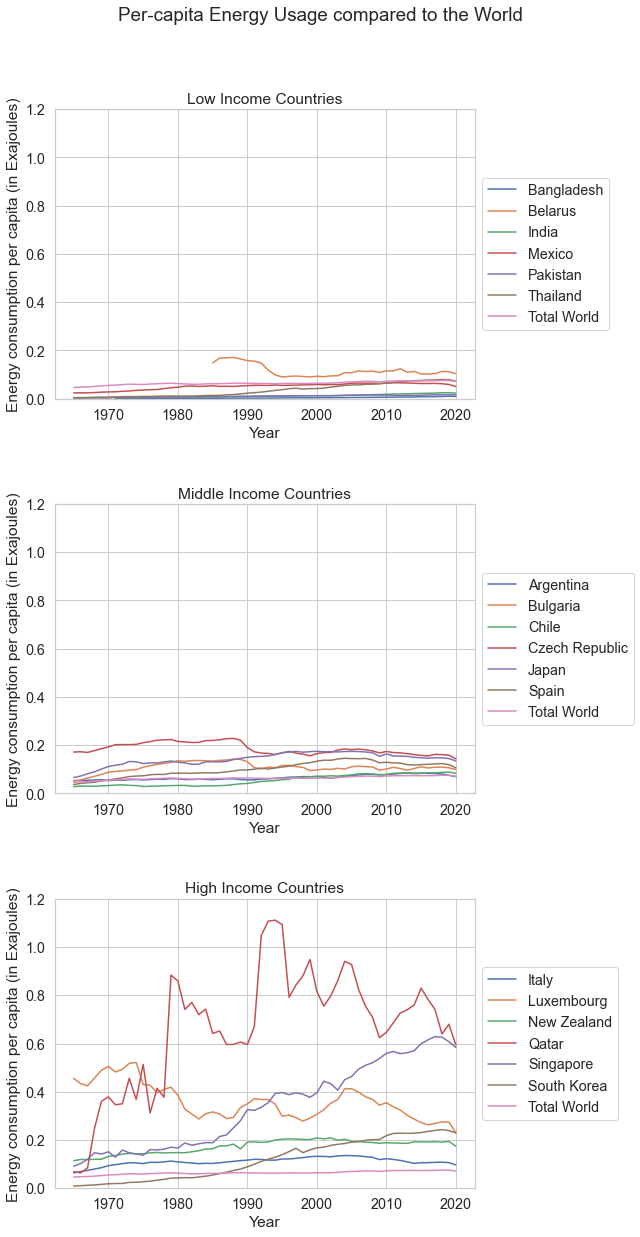

In [121]:
sns.set(rc={'figure.figsize':(10, 18)}, font_scale = 1.3, style = "whitegrid")
plt.subplot(3,1,1)
sns.lineplot(x = 'Year', y= 'Total Primary Energy Consumption', hue = "Country",data = df_low_income, )
plt.title('Low Income Countries')
ax = plt.gca()
#ax.legend_ = None # Hide the legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Energy consumption per capita (in Exajoules)')
plt.ylim([0,1.2])

plt.subplot(3,1,2)
sns.lineplot(x = 'Year', y= 'Total Primary Energy Consumption', hue = "Country",data = df_middle_income, )
plt.title('Middle Income Countries')
ax = plt.gca()
#ax.legend_ = None # Hide the legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Energy consumption per capita (in Exajoules)')
plt.ylim([0,1.2])

plt.subplot(3,1,3)
sns.lineplot(x = 'Year', y= 'Total Primary Energy Consumption', hue = "Country",data = df_high_income, )
plt.title('High Income Countries')
ax = plt.gca()
#ax.legend_ = None # Hide the legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Energy consumption per capita (in Exajoules)')
plt.ylim([0,1.2])

plt.suptitle('Per-capita Energy Usage compared to the World')
plt.tight_layout(pad = 3)
plt.show()


The graphs have all been plotted with the same limits on the y-axis for a fair visual comparision. <br>
The world average is plotted as a reference on all 3 graphs in pink. <br>
* We can clearly see that low income countries have consistently consumed below the world average levels except Belarus. <br>
* Most middle income countries have enjoyed an energy usage slightly above world average. Chile, and even more so, Argentina, have an energy usage very close to the world average. <br>
* High income countries have always had an above average energy consumption in the recent past. Qatar, in particular, consumes way more than any other countries on the list. Singapore shows a much faster growth in energy consumption as compared to any other countries on the list.

### Renewable Usage by GDP

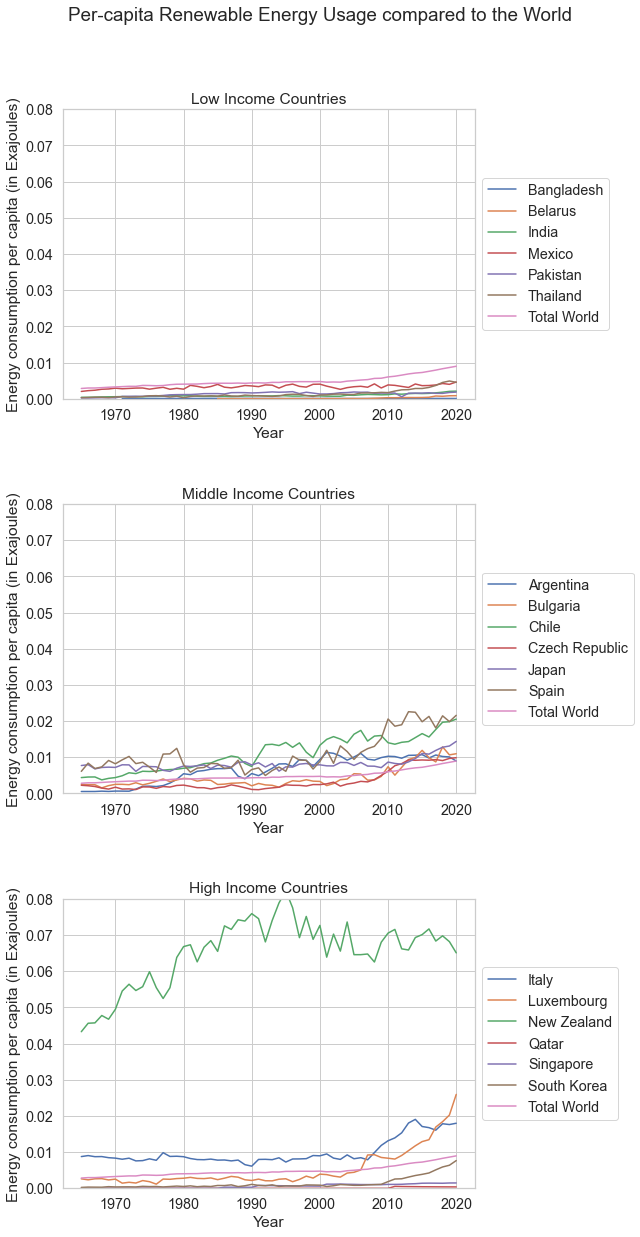

In [122]:
sns.set(rc={'figure.figsize':(10, 18)}, font_scale = 1.3, style = "whitegrid")
plt.subplot(3,1,1)
sns.lineplot(x = 'Year', y= 'Total Renewable Energy', hue = "Country",data = df_low_income, )
plt.title('Low Income Countries')
ax = plt.gca()
#ax.legend_ = None # Hide the legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Energy consumption per capita (in Exajoules)')
plt.ylim([0,0.08])

plt.subplot(3,1,2)
sns.lineplot(x = 'Year', y= 'Total Renewable Energy', hue = "Country",data = df_middle_income, )
plt.title('Middle Income Countries')
ax = plt.gca()
#ax.legend_ = None # Hide the legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Energy consumption per capita (in Exajoules)')
plt.ylim([0,0.08])

plt.subplot(3,1,3)
sns.lineplot(x = 'Year', y= 'Total Renewable Energy', hue = "Country",data = df_high_income, )
plt.title('High Income Countries')
ax = plt.gca()
#ax.legend_ = None # Hide the legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Energy consumption per capita (in Exajoules)')
plt.ylim([0,0.08])

plt.suptitle('Per-capita Renewable Energy Usage compared to the World')
plt.tight_layout(pad = 3)
plt.show()


The graphs have all been plotted with the same limits on the y-axis for a fair visual comparision. <br>
The world average is plotted as a reference on all 3 graphs in pink. <br>
* We can clearly see that low income countries have consistently consumed below the world average levels. The growth rate (as measured by slope) of renewables in these countries has been fairly low too. Thailand and Mexico have the highest renewable usage in this group <br>
* Most middle income countries have a renewable usage well above world average. Spain and Chile have made rapid progress in renewables and even beats many high income countries in this regard <br>
* Many high income countries including New Zealand, Italy and Luxembourg have a renewable usage well above average. Qatar and Singapore are both notable offenders in this category. While the previous section demonstrated rapid growth of energy usage in Singapore and high usage in Qatar, the energy usage in both cases has not been very sustainable. Luxembourg also has the highest growth rate in renewable consumption while its total energy consumption was falling. This suggests that Luxembourg has gotten better at handling energy resources efficiently.

the above analysis only looked at some countries in each group and is not exhaustive by any means.

## Distribution of Energy Source Utilisation by GDP

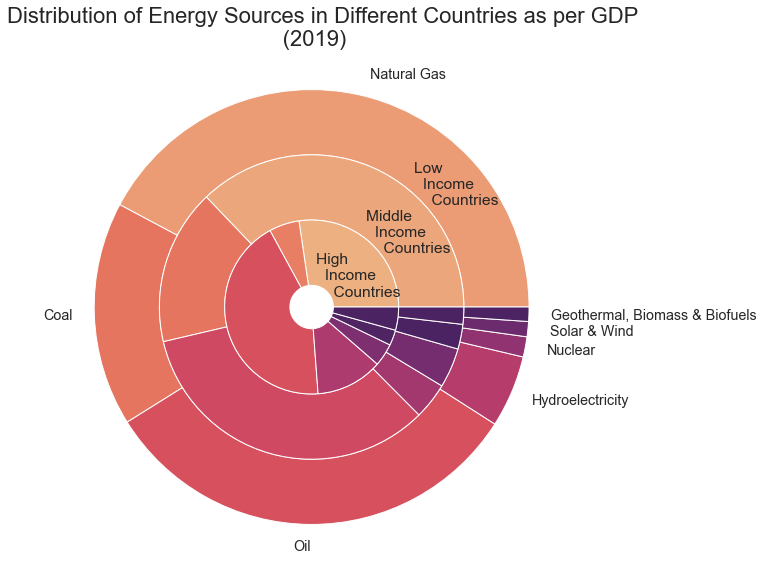

In [123]:
grp = df_per_capita[df_per_capita['Year']==2019].groupby('GDP Category')

df_gdp_cat_mean = grp.agg("mean")[["Natural Gas", "Coal", "Oil","Hydroelectricity","Nuclear", "Solar", "Wind",  
                                   'Geothermal and Biomass', 'Biofuels', ]]

df_gdp_cat_mean
df_gdp_cat_mean["Solar & Wind"] = df_gdp_cat_mean['Solar']+ df_gdp_cat_mean['Wind']
df_gdp_cat_mean["Geothermal, Biomass & Biofuels"] = df_gdp_cat_mean['Biofuels']+ df_gdp_cat_mean['Geothermal and Biomass']
df_gdp_cat_mean = df_gdp_cat_mean.drop(columns=['Biofuels', 'Geothermal and Biomass','Solar','Wind'])
df_gdp_cat_mean
fig, ax = plt.subplots(figsize=(10,10))

size = 0.3
vals = df_gdp_cat_mean


cmap = plt.get_cmap("flare")
outer_colors = cmap(np.arange(7)*40+20)


ax.pie(vals.iloc[0], radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'),  normalize = True,
       labels = vals.columns
       )
plt.text(0.47,0.47,'Low \n  Income \n    Countries')
ax.pie(vals.iloc[1], radius=1-size, colors=cmap(np.arange(7)*50+10),
       wedgeprops=dict(width=size, edgecolor='w'), normalize = True,
       #labels = vals.columns
       )
plt.text(0.25,0.25,'Middle \n  Income \n    Countries')
ax.pie(vals.iloc[2], radius=1-2*size, colors=cmap(np.arange(7)*50),
       wedgeprops=dict(width=size, edgecolor='w'), normalize = True,
       #labels = vals.columns
       )
plt.text(0.02,0.05,'High \n  Income \n    Countries')
plt.text(-1.4,1.2,'Distribution of Energy Sources in Different Countries as per GDP \n                                             (2019)',fontdict={'size':22})
ax.set(aspect="equal")
plt.show()

It is clear from the plot that higher the income of the country, it is more likely to be using renewable sources of energy. Thus one can also say that lower income countries largely depend on non-renewable sources. As setting up nuclear, solar and wind usually involve higher investment, their proportion for low-income countries is lower. <br>
High income countries also show a decrease in coal and natural gas consumption, but a higher oil consumption.

## Proportion of Energy obtained from different sources

Now we will dig deeper and look at the individual energy sources and how their usage has varied over time in selected countries

### World

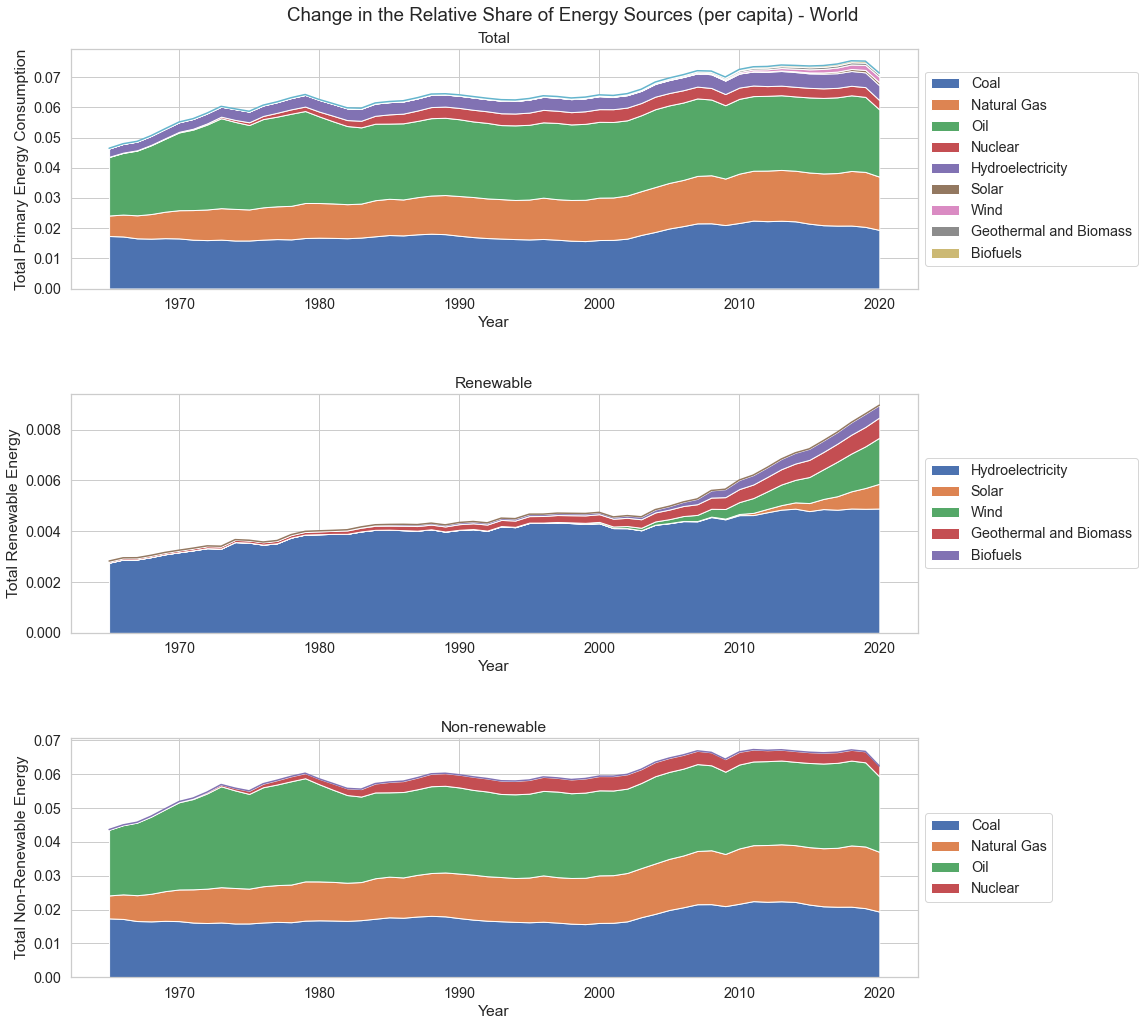

In [124]:
sns.set(rc={'figure.figsize':(17, 15)}, font_scale = 1.3, style = "whitegrid")

df_stack = df_per_capita[df_per_capita["Country"] == 'Total World']

plt.subplot(3,1,1)
plt.title("Total")
plt.stackplot(list(df_stack["Year"]) , np.transpose(df_stack[['Coal', 'Natural Gas', 'Oil', 'Nuclear', 'Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass','Biofuels']].to_numpy()), labels = ['Coal', 'Natural Gas', 'Oil', 'Nuclear', 'Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass','Biofuels'])
sns.lineplot(x = 'Year', y = 'Total Primary Energy Consumption', data = df_stack)

#sns.lineplot(x = 'Year', y = 'CO2 (in million tonnes)', data = df_stack)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplot(3,1,2)
plt.title("Renewable")
plt.stackplot(list(df_stack["Year"]) , np.transpose(df_stack[['Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass','Biofuels']].to_numpy()), labels = ['Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass','Biofuels'])
sns.lineplot(x = 'Year', y = 'Total Renewable Energy', data = df_stack)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplot(3,1,3)
plt.title("Non-renewable")
plt.stackplot(list(df_stack["Year"]) , np.transpose(df_stack[['Coal', 'Natural Gas', 'Oil', 'Nuclear']].to_numpy()), labels = ['Coal', 'Natural Gas', 'Oil', 'Nuclear'])
sns.lineplot(x = 'Year', y = 'Total Non-Renewable Energy', data = df_stack)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout(pad = 3)
plt.suptitle('Change in the Relative Share of Energy Sources (per capita) - World')
plt.show()

Across the world renewables continue to play a relatively minor role. Most energy is still derived from non-renewable sources. Post 2010 we can see a rapid increase in renewable usage, particularly solar and wind energy. Hydroelectricity has always been the largest source of renewable energy across the world and its share is greater than that of all other renewables combined. <br>
The largest energy sources are oil followed by coal and then natural gas. Nuclear energy still has a smaller share than hydroelectricty but greater than all other renewables.

Next, the country of most interest to us is undoubtedly our own!

### India

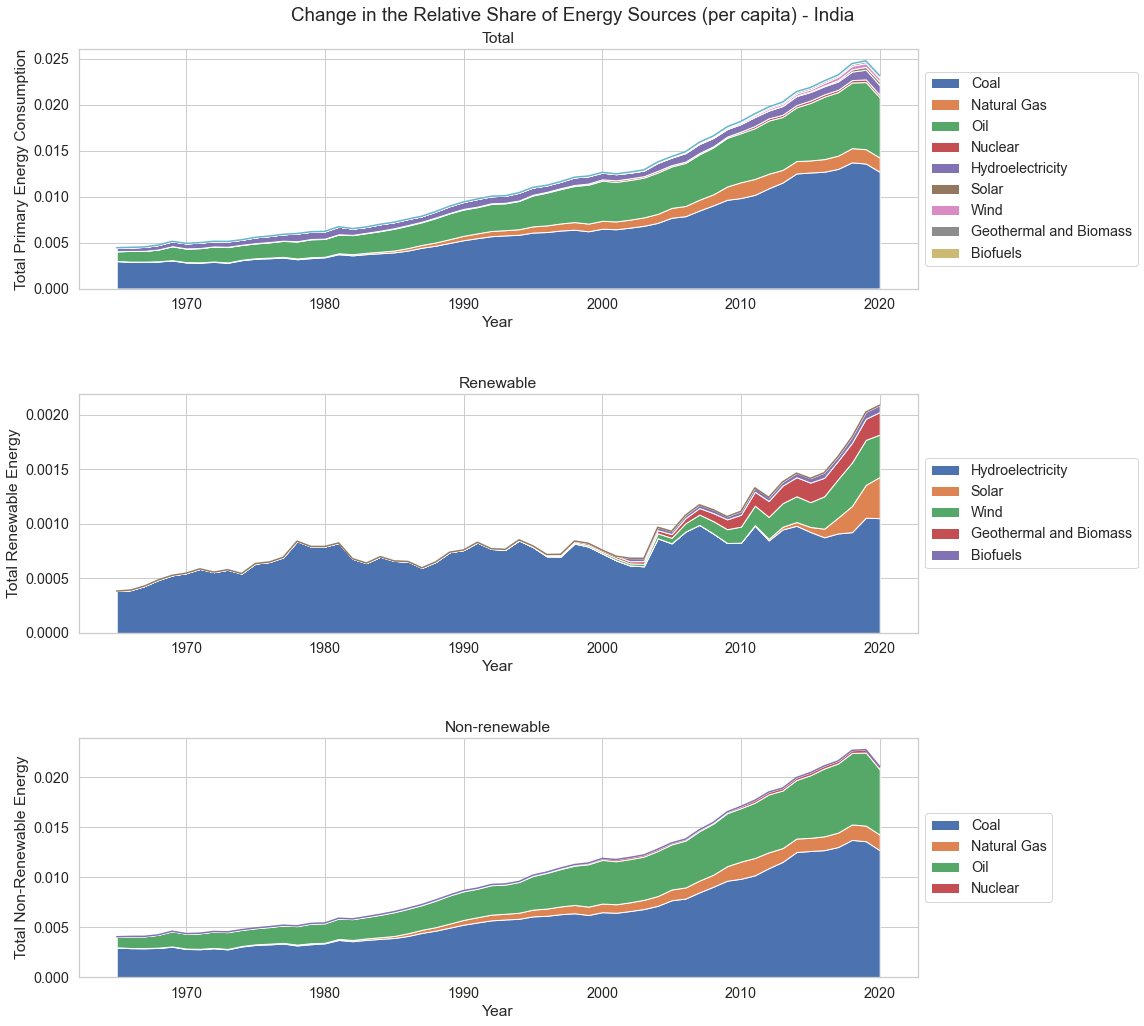

In [125]:
sns.set(rc={'figure.figsize':(17, 15)}, font_scale = 1.3, style = "whitegrid")

df_stack = df_per_capita[df_per_capita["Country"] == 'India']

plt.subplot(3,1,1)
plt.title("Total")
plt.stackplot(list(df_stack["Year"]) , np.transpose(df_stack[['Coal', 'Natural Gas', 'Oil', 'Nuclear', 'Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass','Biofuels']].to_numpy()), labels = ['Coal', 'Natural Gas', 'Oil', 'Nuclear', 'Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass','Biofuels'])
sns.lineplot(x = 'Year', y = 'Total Primary Energy Consumption', data = df_stack)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplot(3,1,2)
plt.title("Renewable")
plt.stackplot(list(df_stack["Year"]) , np.transpose(df_stack[['Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass','Biofuels']].to_numpy()), labels = ['Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass','Biofuels'])
sns.lineplot(x = 'Year', y = 'Total Renewable Energy', data = df_stack)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplot(3,1,3)
plt.title("Non-renewable")
plt.stackplot(list(df_stack["Year"]) , np.transpose(df_stack[['Coal', 'Natural Gas', 'Oil', 'Nuclear']].to_numpy()), labels = ['Coal', 'Natural Gas', 'Oil', 'Nuclear'])
sns.lineplot(x = 'Year', y = 'Total Non-Renewable Energy', data = df_stack)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout(pad = 3)
plt.suptitle('Change in the Relative Share of Energy Sources (per capita) - India')
plt.show()

In India, coal continues to be the largest source of energy followed by oil. <br>
Amongst renewables, hydroelectricity forms the largest portion and has a steady per capita contribution since several years. From 2004, however, we can see a rapid growth in other renewables, particularly wind and geothermal energy. Solar energy has picked up later in the country since 2012.

Now let us look at USA, one of the largest consumers of total energy in the world (we noticed it as an outlier on the linear scale scatterplot for total energy consumption against population)

### United States

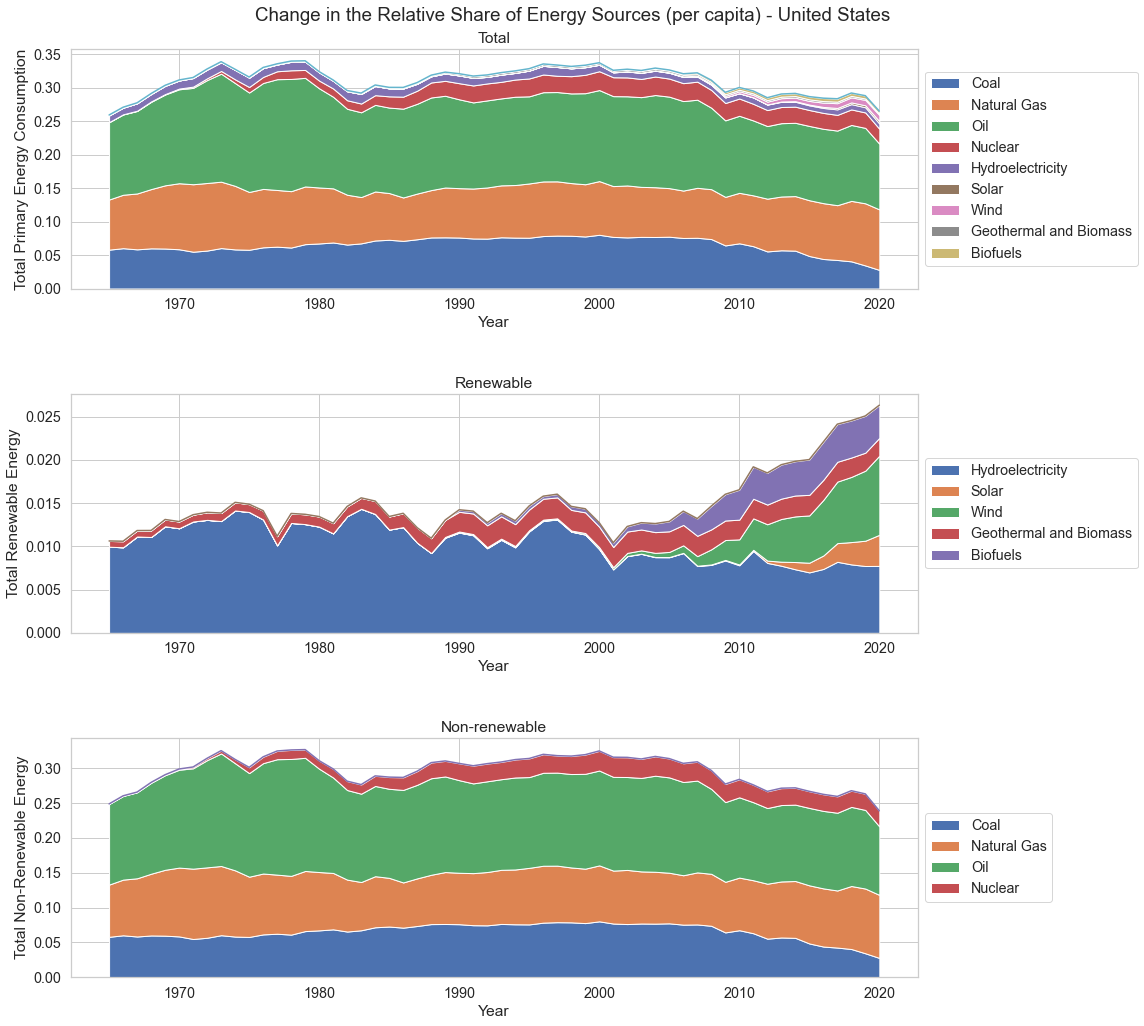

In [126]:
sns.set(rc={'figure.figsize':(17, 15)}, font_scale = 1.3, style = "whitegrid")

df_stack = df_per_capita[df_per_capita["Country"] == 'US']

plt.subplot(3,1,1)
plt.title("Total")
plt.stackplot(list(df_stack["Year"]) , np.transpose(df_stack[['Coal', 'Natural Gas', 'Oil', 'Nuclear', 'Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass','Biofuels']].to_numpy()), labels = ['Coal', 'Natural Gas', 'Oil', 'Nuclear', 'Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass','Biofuels'])
sns.lineplot(x = 'Year', y = 'Total Primary Energy Consumption', data = df_stack)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplot(3,1,2)
plt.title("Renewable")
plt.stackplot(list(df_stack["Year"]) , np.transpose(df_stack[['Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass','Biofuels']].to_numpy()), labels = ['Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass','Biofuels'])
sns.lineplot(x = 'Year', y = 'Total Renewable Energy', data = df_stack)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplot(3,1,3)
plt.title("Non-renewable")
plt.stackplot(list(df_stack["Year"]) , np.transpose(df_stack[['Coal', 'Natural Gas', 'Oil', 'Nuclear']].to_numpy()), labels = ['Coal', 'Natural Gas', 'Oil', 'Nuclear'])
sns.lineplot(x = 'Year', y = 'Total Non-Renewable Energy', data = df_stack)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout(pad = 3)
plt.suptitle('Change in the Relative Share of Energy Sources (per capita) - United States')
plt.show()

The United States get most energy from oil. The share of coal has fallen significantly in recent years. The overall per capita energy consumption has also been decreasing since 2000.<br>
While hydroelectricity as well as geothermal and biomass have played an important role since several years, other renewables have only picked up since 2002. Solar energy has picked up later around 2012, similar to what we saw for India.

China is one of the largest energy consumers on a total basis

### China

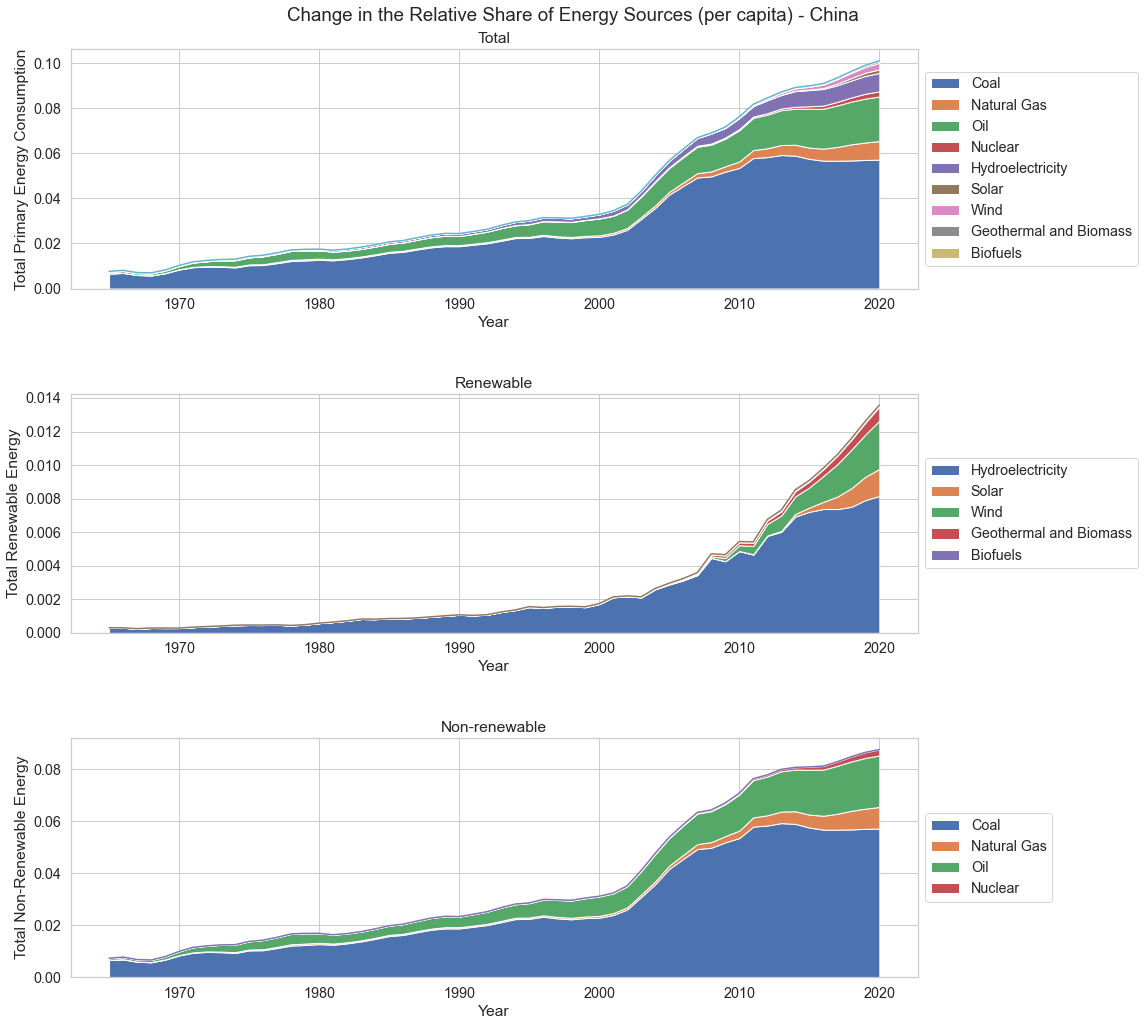

In [127]:
sns.set(rc={'figure.figsize':(17, 15)}, font_scale = 1.3, style = "whitegrid")

df_stack = df_per_capita[df_per_capita["Country"] == 'China']

plt.subplot(3,1,1)
plt.title("Total")
plt.stackplot(list(df_stack["Year"]) , np.transpose(df_stack[['Coal', 'Natural Gas', 'Oil', 'Nuclear', 'Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass','Biofuels']].replace(np.nan, 0).to_numpy()), labels = ['Coal', 'Natural Gas', 'Oil', 'Nuclear', 'Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass','Biofuels'])
sns.lineplot(x = 'Year', y = 'Total Primary Energy Consumption', data = df_stack)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplot(3,1,2)
plt.title("Renewable")
plt.stackplot(list(df_stack["Year"]) , np.transpose(df_stack[['Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass','Biofuels']].replace(np.nan, 0).to_numpy()), labels = ['Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass','Biofuels'])
sns.lineplot(x = 'Year', y = 'Total Renewable Energy', data = df_stack)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplot(3,1,3)
plt.title("Non-renewable")
plt.stackplot(list(df_stack["Year"]) , np.transpose(df_stack[['Coal', 'Natural Gas', 'Oil', 'Nuclear']].replace(np.nan, 0).to_numpy()), labels = ['Coal', 'Natural Gas', 'Oil', 'Nuclear'])
sns.lineplot(x = 'Year', y = 'Total Non-Renewable Energy', data = df_stack)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout(pad = 3)
plt.suptitle('Change in the Relative Share of Energy Sources (per capita) - China')
plt.show()

China has one of the most rapid energy growth rates. It gets most of its energy from coal which delivers more energy than all other sources combined. Post 2000 one can see a significant increase in the growth rate of per capita energy usage. Most renewable energy comes from hydroelectricity

Next we will look at Iceland, the country with largest proportion of renewables

### Iceland 

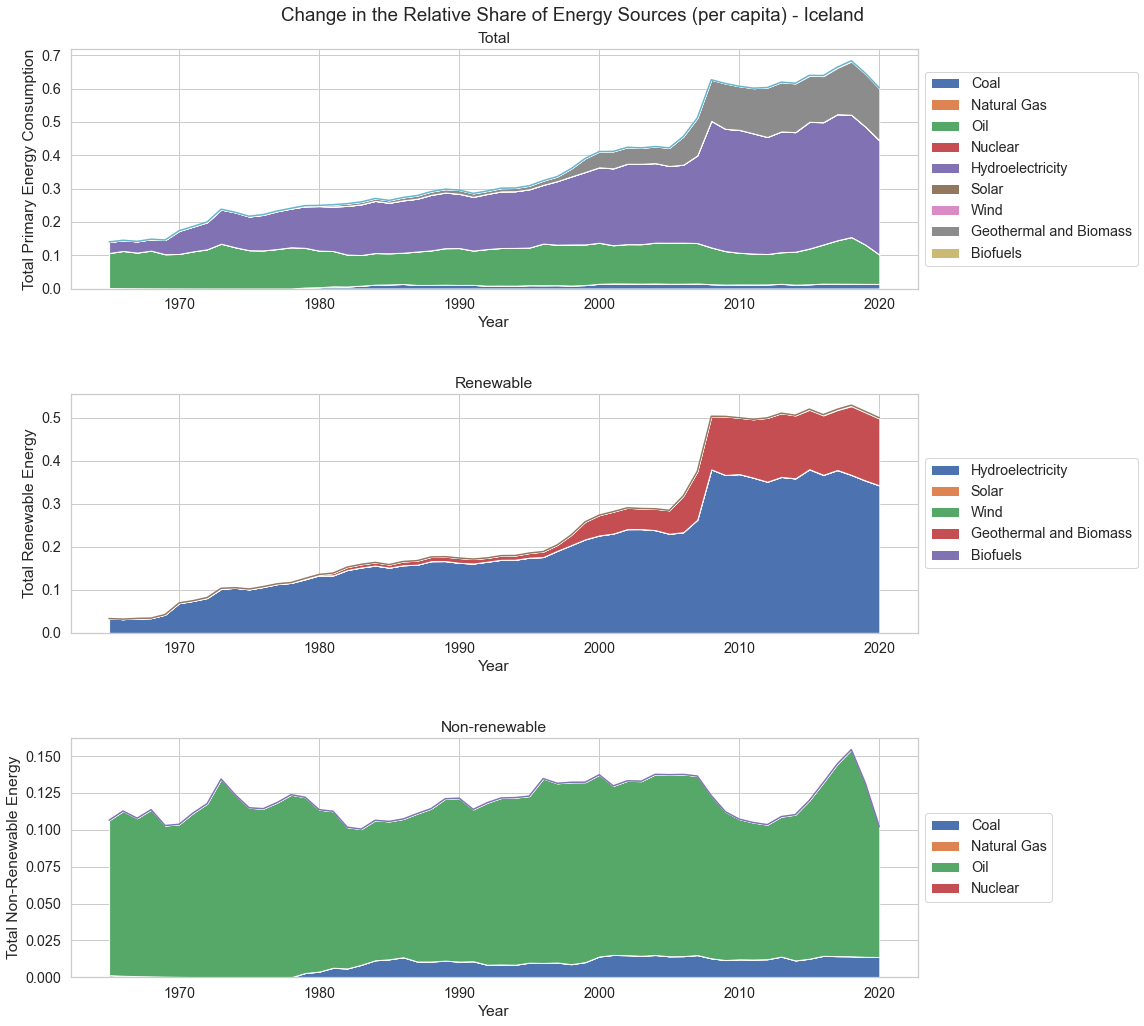

In [128]:
sns.set(rc={'figure.figsize':(17, 15)}, font_scale = 1.3, style = "whitegrid")

df_stack = df_per_capita[df_per_capita["Country"] == 'Iceland']

plt.subplot(3,1,1)
plt.title("Total")
plt.stackplot(list(df_stack["Year"]) , np.transpose(df_stack[['Coal', 'Natural Gas', 'Oil', 'Nuclear', 'Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass','Biofuels']].replace(np.nan, 0).to_numpy()), labels = ['Coal', 'Natural Gas', 'Oil', 'Nuclear', 'Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass','Biofuels'])
sns.lineplot(x = 'Year', y = 'Total Primary Energy Consumption', data = df_stack)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplot(3,1,2)
plt.title("Renewable")
plt.stackplot(list(df_stack["Year"]) , np.transpose(df_stack[['Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass','Biofuels']].replace(np.nan, 0).to_numpy()), labels = ['Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass','Biofuels'])
sns.lineplot(x = 'Year', y = 'Total Renewable Energy', data = df_stack)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplot(3,1,3)
plt.title("Non-renewable")
plt.stackplot(list(df_stack["Year"]) , np.transpose(df_stack[['Coal', 'Natural Gas', 'Oil', 'Nuclear']].replace(np.nan, 0).to_numpy()), labels = ['Coal', 'Natural Gas', 'Oil', 'Nuclear'])
sns.lineplot(x = 'Year', y = 'Total Non-Renewable Energy', data = df_stack)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout(pad = 3)
plt.suptitle('Change in the Relative Share of Energy Sources (per capita) - Iceland')
plt.show()

Unlike most countries in the world, Iceland gets most of its energy (nearly 85%) renewably. Most of this energy comes from hydroelectricty followed by a significant share of geothermal and biomass energy. We can see a rapid increase in renewable comsumption near 2008 followed by a stable level of per-capita consumption from 2010.

Next we will look at Norway, the country with the second largest proportion of energy sourced renewably after Iceland.

### Norway

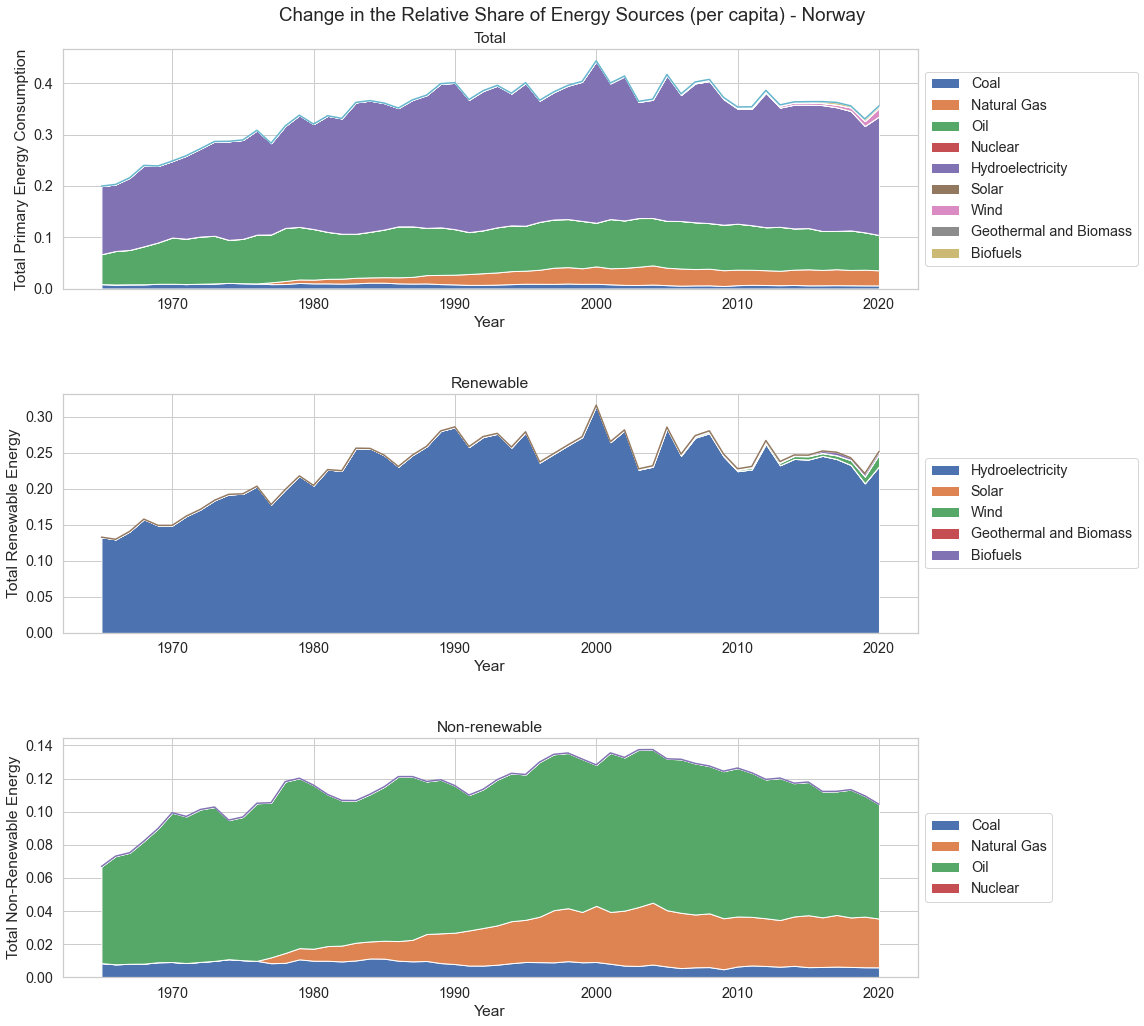

In [129]:
sns.set(rc={'figure.figsize':(17, 15)}, font_scale = 1.3, style = "whitegrid")

df_stack = df_per_capita[df_per_capita["Country"] == 'Norway']

plt.subplot(3,1,1)
plt.title("Total")
plt.stackplot(list(df_stack["Year"]) , np.transpose(df_stack[['Coal', 'Natural Gas', 'Oil', 'Nuclear', 'Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass','Biofuels']].replace(np.nan, 0).to_numpy()), labels = ['Coal', 'Natural Gas', 'Oil', 'Nuclear', 'Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass','Biofuels'])
sns.lineplot(x = 'Year', y = 'Total Primary Energy Consumption', data = df_stack)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplot(3,1,2)
plt.title("Renewable")
plt.stackplot(list(df_stack["Year"]) , np.transpose(df_stack[['Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass','Biofuels']].replace(np.nan, 0).to_numpy()), labels = ['Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass','Biofuels'])
sns.lineplot(x = 'Year', y = 'Total Renewable Energy', data = df_stack)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplot(3,1,3)
plt.title("Non-renewable")
plt.stackplot(list(df_stack["Year"]) , np.transpose(df_stack[['Coal', 'Natural Gas', 'Oil', 'Nuclear']].replace(np.nan, 0).to_numpy()), labels = ['Coal', 'Natural Gas', 'Oil', 'Nuclear'])
sns.lineplot(x = 'Year', y = 'Total Non-Renewable Energy', data = df_stack)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout(pad = 3)
plt.suptitle('Change in the Relative Share of Energy Sources (per capita) - Norway')
plt.show()

Norway gets most of its energy from hydroelectricty followed by a smaller fraction from oil. The contribution of other energy sources is very negligible. 

Let us look at Luxembourg, which has one of the fastest growth rates for renewable usage and also a rapidly declining total energy use

### Luxembourg 

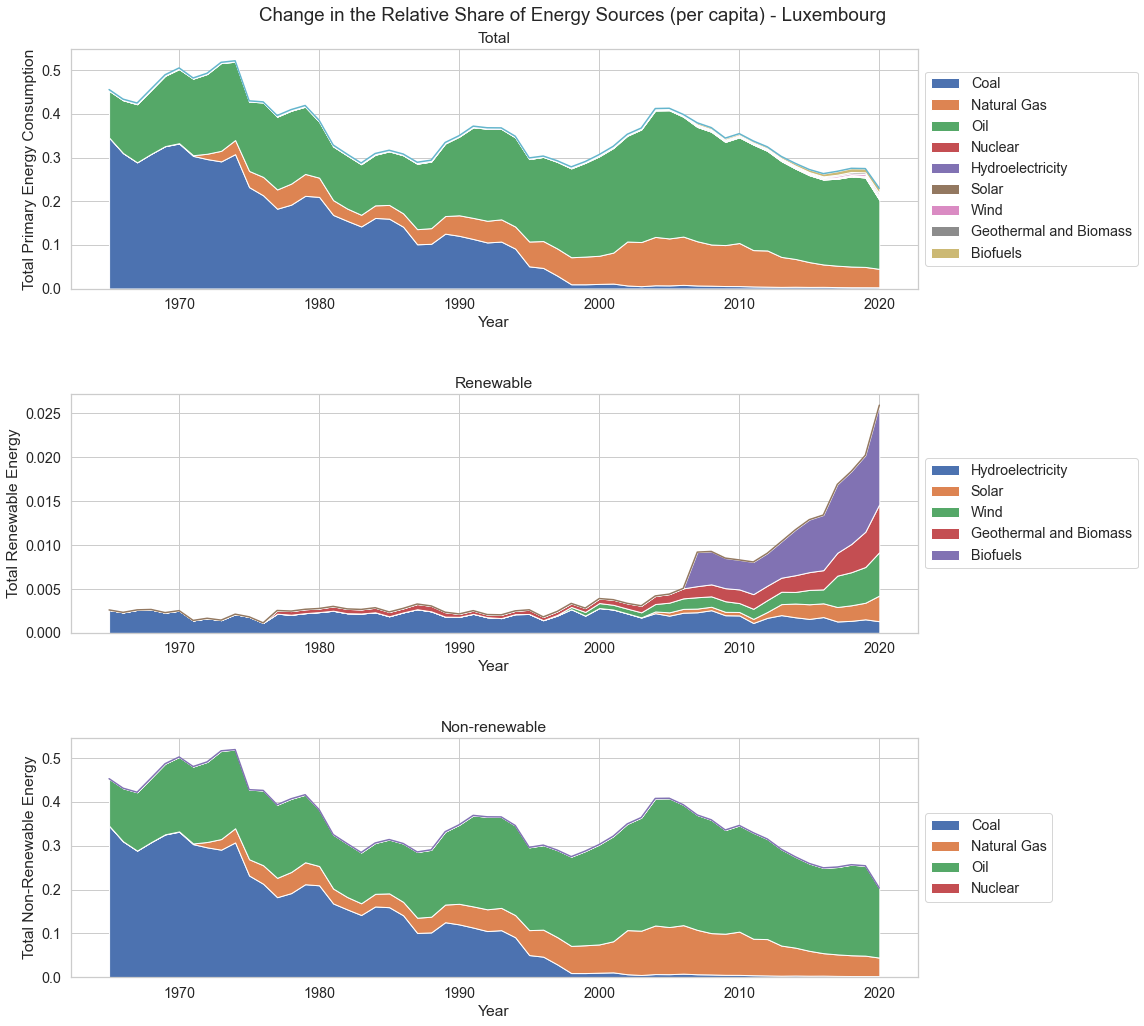

In [130]:
sns.set(rc={'figure.figsize':(17, 15)}, font_scale = 1.3, style = "whitegrid")

df_stack = df_per_capita[df_per_capita["Country"] == 'Luxembourg']

plt.subplot(3,1,1)
plt.title("Total")
plt.stackplot(list(df_stack["Year"]) , np.transpose(df_stack[['Coal', 'Natural Gas', 'Oil', 'Nuclear', 'Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass','Biofuels']].replace(np.nan, 0).to_numpy()), labels = ['Coal', 'Natural Gas', 'Oil', 'Nuclear', 'Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass','Biofuels'])
sns.lineplot(x = 'Year', y = 'Total Primary Energy Consumption', data = df_stack)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplot(3,1,2)
plt.title("Renewable")
plt.stackplot(list(df_stack["Year"]) , np.transpose(df_stack[['Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass','Biofuels']].replace(np.nan, 0).to_numpy()), labels = ['Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass','Biofuels'])
sns.lineplot(x = 'Year', y = 'Total Renewable Energy', data = df_stack)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplot(3,1,3)
plt.title("Non-renewable")
plt.stackplot(list(df_stack["Year"]) , np.transpose(df_stack[['Coal', 'Natural Gas', 'Oil', 'Nuclear']].replace(np.nan, 0).to_numpy()), labels = ['Coal', 'Natural Gas', 'Oil', 'Nuclear'])
sns.lineplot(x = 'Year', y = 'Total Non-Renewable Energy', data = df_stack)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout(pad = 3)
plt.suptitle('Change in the Relative Share of Energy Sources (per capita) - Luxembourg')
plt.show()

Luxembourg still gets most of its energy from oil and the contribution of renewables is very tiny. This contribution, however, is rising very rapidly especially due to the use of biofuels. The total energy consumption per capita is falling due to increased efficiency in resource usage.

### Effect of Policy on World $CO_2$ levels

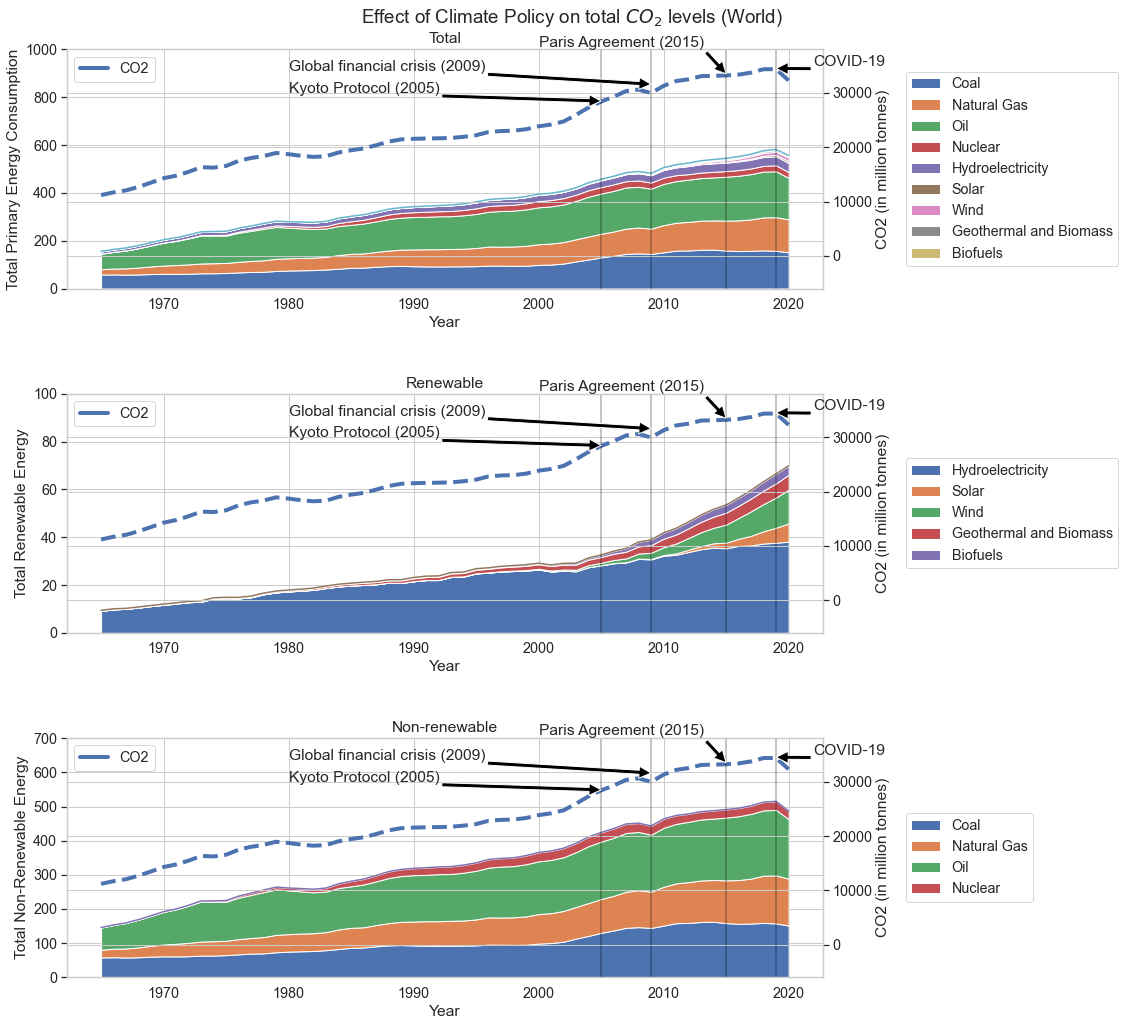

In [131]:
sns.set(rc={'figure.figsize':(17, 15)}, font_scale = 1.3, style = "whitegrid")

df_stack = df_final[df_final["Country"] == 'Total World']

plt.subplot(3,1,1)
plt.title("Total")
plt.stackplot(list(df_stack["Year"]) , np.transpose(df_stack[['Coal', 'Natural Gas', 'Oil', 'Nuclear', 'Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass','Biofuels']].to_numpy()), labels = ['Coal', 'Natural Gas', 'Oil', 'Nuclear', 'Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass','Biofuels'])
sns.lineplot(x = 'Year', y = 'Total Primary Energy Consumption', data = df_stack)

ax = plt.gca()
ax.set_ylim([0, 1000])
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
ax2 = ax.twinx()
ax2.set_ylim([-6000, 38000])
sns.lineplot(x = 'Year', y = 'CO2 (in million tonnes)', data = df_stack, ax = ax2, linewidth = 4, label = 'CO2')
ax2.lines[0].set_linestyle("--")
plt.annotate(text = "Kyoto Protocol (2005)", xytext = (1980, 30000), xy = (2005,28500), arrowprops = dict(facecolor ='black'))
plt.axvline(x = 2005, alpha = 0.3, color = 'black')

plt.annotate(text = "Paris Agreement (2015)", xytext = (2000, 38500), xy = (2015,33500), arrowprops = dict(facecolor ='black'))
plt.axvline(x = 2015, alpha = 0.3, color = 'black')

plt.annotate(text = "Global financial crisis (2009)", xytext = (1980, 34000), xy = (2009,31600), arrowprops = dict(facecolor ='black'))
plt.axvline(x = 2009, alpha = 0.3, color = 'black')

plt.annotate(text = "COVID-19", xytext = (2022, 35000), xy = (2019,34500), arrowprops = dict(facecolor ='black'))
plt.axvline(x = 2019, alpha = 0.3, color = 'black')


plt.subplot(3,1,2)
plt.title("Renewable")
plt.stackplot(list(df_stack["Year"]) , np.transpose(df_stack[['Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass','Biofuels']].to_numpy()), labels = ['Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass','Biofuels'])
sns.lineplot(x = 'Year', y = 'Total Renewable Energy', data = df_stack)

ax = plt.gca()
ax.set_ylim([0, 100])
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
ax2 = ax.twinx()
ax2.set_ylim([-6000, 38000])
sns.lineplot(x = 'Year', y = 'CO2 (in million tonnes)', data = df_stack, ax = ax2, linewidth = 4, label = 'CO2')
ax2.lines[0].set_linestyle("--")
plt.annotate(text = "Kyoto Protocol (2005)", xytext = (1980, 30000), xy = (2005,28500), arrowprops = dict(facecolor ='black'))
plt.axvline(x = 2005, alpha = 0.3, color = 'black')

plt.annotate(text = "Paris Agreement (2015)", xytext = (2000, 38500), xy = (2015,33500), arrowprops = dict(facecolor ='black'))
plt.axvline(x = 2015, alpha = 0.3, color = 'black')

plt.annotate(text = "Global financial crisis (2009)", xytext = (1980, 34000), xy = (2009,31600), arrowprops = dict(facecolor ='black'))
plt.axvline(x = 2009, alpha = 0.3, color = 'black')

plt.annotate(text = "COVID-19", xytext = (2022, 35000), xy = (2019,34500), arrowprops = dict(facecolor ='black'))
plt.axvline(x = 2019, alpha = 0.3, color = 'black')

plt.subplot(3,1,3)
plt.title("Non-renewable")
plt.stackplot(list(df_stack["Year"]) , np.transpose(df_stack[['Coal', 'Natural Gas', 'Oil', 'Nuclear']].to_numpy()), labels = ['Coal', 'Natural Gas', 'Oil', 'Nuclear'])
sns.lineplot(x = 'Year', y = 'Total Non-Renewable Energy', data = df_stack)

ax = plt.gca()
ax.set_ylim([0, 700])
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
ax2 = ax.twinx()
ax2.set_ylim([-6000, 38000])
sns.lineplot(x = 'Year', y = 'CO2 (in million tonnes)', data = df_stack, ax = ax2, linewidth = 4, label = 'CO2')
ax2.lines[0].set_linestyle("--")
plt.annotate(text = "Kyoto Protocol (2005)", xytext = (1980, 30000), xy = (2005,28500), arrowprops = dict(facecolor ='black'))
plt.axvline(x = 2005, alpha = 0.3, color = 'black')

plt.annotate(text = "Paris Agreement (2015)", xytext = (2000, 38500), xy = (2015,33500), arrowprops = dict(facecolor ='black'))
plt.axvline(x = 2015, alpha = 0.3, color = 'black')

plt.annotate(text = "Global financial crisis (2009)", xytext = (1980, 34000), xy = (2009,31600), arrowprops = dict(facecolor ='black'))
plt.axvline(x = 2009, alpha = 0.3, color = 'black')

plt.annotate(text = "COVID-19", xytext = (2022, 35000), xy = (2019,34500), arrowprops = dict(facecolor ='black'))
plt.axvline(x = 2019, alpha = 0.3, color = 'black')

plt.tight_layout(pad = 3)
plt.suptitle('Effect of Climate Policy on total $CO_2$ levels (World)')
plt.show()

While no major drop in CO2 levels is associated with either policy interventions (Kyoto Protocol and Paris Agreement), the plots show a visible dip in CO2 levels with the global recession from 2008 to 2009 and the COVID-19 pandemic in 2019 leading uptil now. The dip caused by the pandemic is visible across all sectors and across most countries.
There is a visible growth in wind energy following the Kyoto Protocol and subsequently a boost in solar energy around 2015, near the adoption of the Paris Treaty. While these major global trends in energy are occurring at the same times as these global policy interventions, it is hard to say how much of this change is actually due to policy.

## An alternative visualisation of energy use distribution across sources

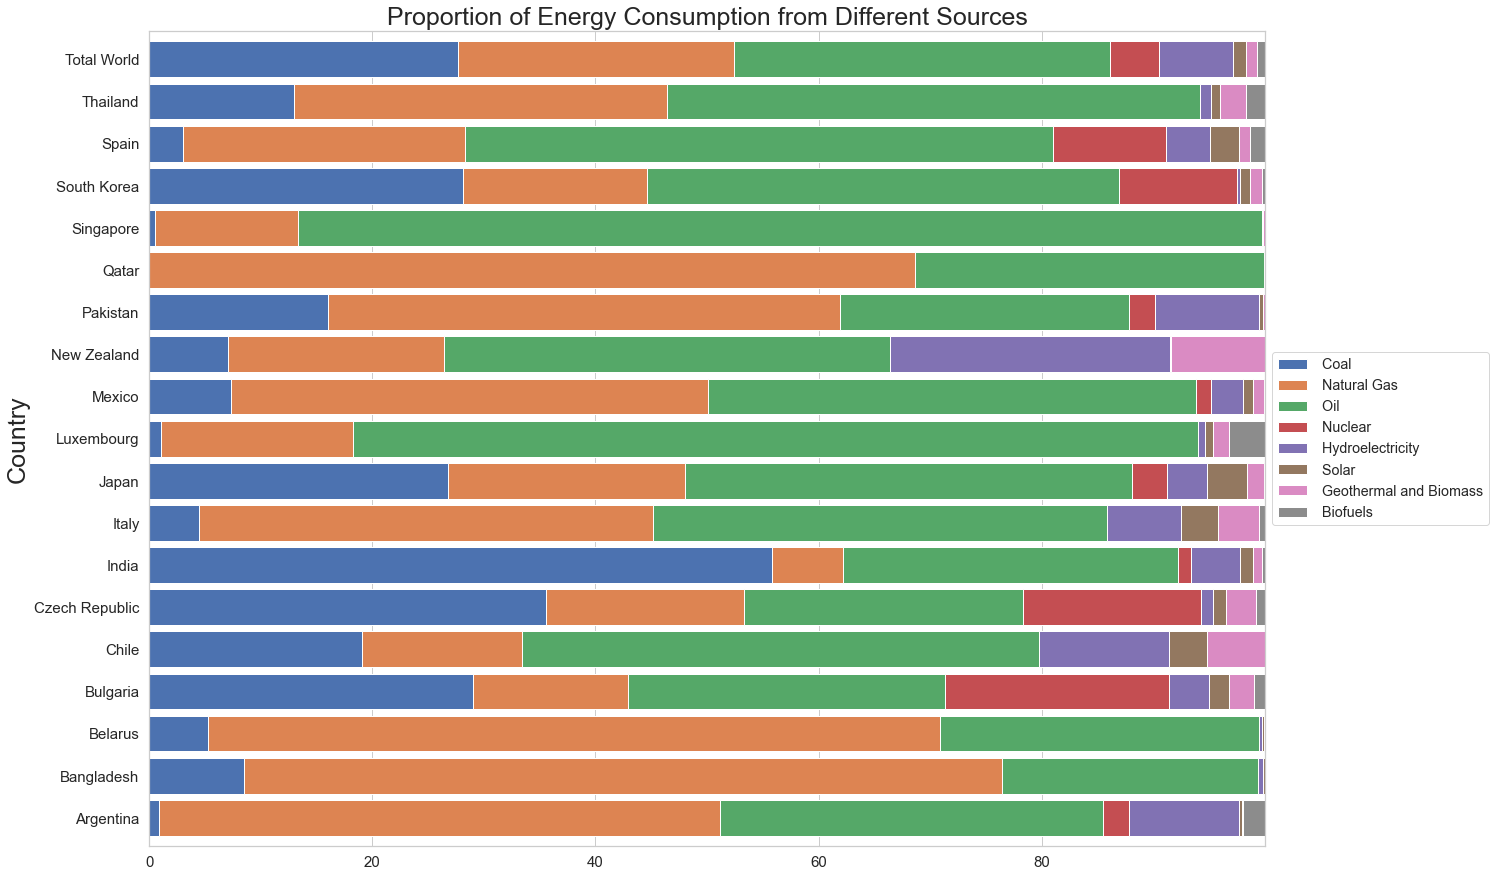

In [132]:
list_for_np = ['Coal', 'Natural Gas', 'Oil', 'Nuclear', 'Hydroelectricity', 'Solar', 'Geothermal and Biomass', "Biofuels"]
list_norm = []

for i in list_for_np:
    list_norm.append(' '  + i)
df_2020 = df_final[df_final['Year']==2019]
df_2020 = df_2020.reset_index()
numarray = df_2020[list_for_np].to_numpy()
numarray[np.isnan(numarray)] = 0
sumarray = np.sum(numarray, axis=1)
sumarray = np.reshape(sumarray, (94,1))
numarray = numarray/sumarray*100
numarray

df_2020_temp = pd.DataFrame(numarray, columns = list_norm)
df_2020 = df_2020.join(df_2020_temp)
df_2020 = df_2020[df_2020["Country"].isin(l1 + l2 + l3)]
df_2020.set_index('Country', inplace = True)


df_2020[list_norm].plot(kind = "barh", stacked = True, figsize = [20, 15], width = .85, fontsize = 15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Proportion of Energy Consumption from Different Sources", fontsize = 25)
plt.ylabel('Country',fontsize = 25)

plt.show()

# Predictions

### Using Machine Learning to analyse trends and draw projections for energy utilisation from different sectors and carbon dioxide emissions across the world for the __next 3 years__
<ol>
<li> Polynomial regression to predict the future distribution of energy usage
<li> Two approaches to predicting CO2 emissions
</ol>

## Import the necessary libraries

In [133]:
#Machine Learning
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

country_list_ml = ['China','Iceland', 'India', 'Luxembourg', 'Total World']
sector_list_ml = ['Total Primary Energy Consumption', 'Coal', 'Natural Gas', 'Oil', 'Nuclear', 'Hydroelectricity', 'Solar',
                   'Wind', 'Geothermal and Biomass', 'Biofuels']


## Polynomial Regression to predict sector-wise distribution

In [134]:
# Machine Learning Using Polynomial Regression on sectorial data and SVR on the future sectorial data
# With 2020

def returnPred(country_ml, sector, next_yrs = 3, from_year_ml = 2000):
    y_train = np.array(list(df_per_capita[(df_per_capita['Country']==country_ml) & (df_per_capita['Year'] >= from_year_ml)][sector]))
    x_train = np.array(list(range(len(y_train)))).reshape(-1,1)
    x_pred = np.array(list(range(len(y_train)+next_yrs))).reshape(-1,1)
    poly = PolynomialFeatures(degree = 3)
    x_poly = poly.fit_transform(x_train)
    poly.fit(x_train, y_train)
    lin2 = LinearRegression()
    lin2.fit(x_poly, y_train)
    y_pred = lin2.predict(poly.fit_transform(x_pred))
    #plt.plot(x_pred, y_pred, label = "Prediction")
    #plt.plot(x_train, y_train, label = "Train")
    #plt.legend()
    #plt.show()
    return y_pred

df_future = pd.DataFrame()

next_yrs = 3
from_year_ml = 2000
for country in country_list_ml:
    entry_ml = []
    for i in range(next_yrs + 2021 - from_year_ml):
            entry_ml.append({'Country' : country, 'Year' : int(from_year_ml+i)})
    for sector in sector_list_ml:
        y_pred = returnPred(country, sector, next_yrs, from_year_ml)
        
        for i in range(next_yrs + 2021 - from_year_ml):
            entry_ml[i][sector] = y_pred[i]
    for i in range(next_yrs + 2021 - from_year_ml):
        df_future = df_future.append(entry_ml[i], ignore_index=True)
df_future["Year"] = df_future["Year"].astype(int)

def predictCO2(country_ml, next_yrs = 3, from_year_ml = 2000):
    y_train = np.array(list(df_per_capita[(df_per_capita['Country']==country_ml) & (df_per_capita['Year'] >= from_year_ml)]['CO2 (in million tonnes)']))
    x_train = np.array((df_per_capita[(df_per_capita['Country']==country_ml) & (df_per_capita['Year'] >= from_year_ml)][sector_list_ml])) 
    svm_poly_reg = SVR()
    svm_poly_reg.fit(x_train, y_train)
    
    x_pred_future = np.array((df_future[(df_future['Country']==country_ml)][sector_list_ml]))
    y_pred_future =(svm_poly_reg.predict(x_pred_future))
    
    return y_pred_future

df_future_CO2 = pd.DataFrame()
for country in country_list_ml:
    y_pred = predictCO2(country)
    for i in range(from_year_ml, 2021+next_yrs):
        entry = {
            "CO2 Predictions" : y_pred[i-from_year_ml]
        }
        df_future_CO2 = df_future_CO2.append(entry, ignore_index=True)

df_future = df_future.join(df_future_CO2)

df_future_with2020 = df_future.copy()

In [135]:
# Machine Learning Using Polynomial Regression on sectorial data and SVR on the future sectorial data
# Without 2020

def returnPred(country_ml, sector, next_yrs = 6, from_year_ml = 2000):
    y_train = np.array(list(df_per_capita[(df_per_capita['Country']==country_ml) & (df_per_capita['Year'] >= from_year_ml)& (df_per_capita['Year'] < 2020)][sector]))
    x_train = np.array(list(range(len(y_train)))).reshape(-1,1)
    x_pred = np.array(list(range(len(y_train)+next_yrs))).reshape(-1,1)
    poly = PolynomialFeatures(degree = 3)
    x_poly = poly.fit_transform(x_train)
    poly.fit(x_train, y_train)
    lin2 = LinearRegression()
    lin2.fit(x_poly, y_train)
    y_pred = lin2.predict(poly.fit_transform(x_pred))
    #plt.plot(x_pred, y_pred, label = "Prediction")
    #plt.plot(x_train, y_train, label = "Train")
    #plt.legend()
    #plt.show()
    return y_pred

df_future = pd.DataFrame()

next_yrs = 6
from_year_ml = 2000
for country in country_list_ml:
    entry_ml = []
    for i in range(next_yrs + 2020 - from_year_ml):
            entry_ml.append({'Country' : country, 'Year' : int(from_year_ml+i)})
    for sector in sector_list_ml:
        y_pred = returnPred(country, sector, next_yrs, from_year_ml)
        
        for i in range(next_yrs + 2020 - from_year_ml):
            entry_ml[i][sector] = y_pred[i]
    for i in range(next_yrs + 2020 - from_year_ml):
        df_future = df_future.append(entry_ml[i], ignore_index=True)
df_future["Year"] = df_future["Year"].astype(int)

def predictCO2(country_ml, next_yrs = 3, from_year_ml = 2000):
    y_train = np.array(list(df_per_capita[(df_per_capita['Country']==country_ml) & (df_per_capita['Year'] >= from_year_ml)& (df_per_capita['Year'] < 2020)]['CO2 (in million tonnes)']))
    x_train = np.array((df_per_capita[(df_per_capita['Country']==country_ml) & (df_per_capita['Year'] >= from_year_ml)& (df_per_capita['Year'] < 2020)][sector_list_ml])) 
    svm_poly_reg = SVR()
    svm_poly_reg.fit(x_train, y_train)
    
    x_pred_future = np.array((df_future[(df_future['Country']==country_ml)][sector_list_ml]))
    y_pred_future =(svm_poly_reg.predict(x_pred_future))
    
    return y_pred_future

df_future_CO2 = pd.DataFrame()
for country in country_list_ml:
    y_pred = predictCO2(country)
    for i in range(from_year_ml, 2020+next_yrs):
        entry = {
            
            "CO2 Predictions" : y_pred[i-from_year_ml]
        }
        df_future_CO2 = df_future_CO2.append(entry, ignore_index=True)

df_future = df_future.join(df_future_CO2)
df_future_wo2020 = df_future.copy()

In [136]:
##### Now we take CO2 as a sector
sector_list_ml.append('CO2 (in million tonnes)')

In [137]:
# Machine Learning by a polynomial regresssion on sectorial data, degree = 3
# With 2020

def returnPred(country_ml, sector, next_yrs = 3, from_year_ml = 2000):
    y_train = np.array(list(df_per_capita[(df_per_capita['Country']==country_ml) & (df_per_capita['Year'] >= from_year_ml)][sector]))
    x_train = np.array(list(range(len(y_train)))).reshape(-1,1)
    x_pred = np.array(list(range(len(y_train)+next_yrs))).reshape(-1,1)
    poly = PolynomialFeatures(degree = 3)
    x_poly = poly.fit_transform(x_train)
    poly.fit(x_train, y_train)
    lin2 = LinearRegression()
    lin2.fit(x_poly, y_train)
    y_pred = lin2.predict(poly.fit_transform(x_pred))
    #plt.plot(x_pred, y_pred, label = "Prediction")
    #plt.plot(x_train, y_train, label = "Train")
    #plt.legend()
    #plt.show()
    return y_pred

df_future = pd.DataFrame()
next_yrs = 3
from_year_ml = 2000
for country in country_list_ml:
    entry_ml = []
    for i in range(next_yrs + 2021 - from_year_ml):
            entry_ml.append({'Country' : country, 'Year' : int(from_year_ml+i)})
    for sector in sector_list_ml:
        y_pred = returnPred(country, sector, next_yrs, from_year_ml)
        
        for i in range(next_yrs + 2021 - from_year_ml):
            entry_ml[i][sector] = y_pred[i]
    for i in range(next_yrs + 2021 - from_year_ml):
        df_future = df_future.append(entry_ml[i], ignore_index=True)
df_future["Year"] = df_future["Year"].astype(int)
df_future_CO2_w2020 = df_future.copy()


In [151]:
# Machine Learning by a polynomial regresssion on sectorial data, degree = 3
# Without 2020

def returnPred(country_ml, sector, next_yrs = 6, from_year_ml = 2000):
    y_train = np.array(list(df_per_capita[(df_per_capita['Country']==country_ml) & (df_per_capita['Year'] >= from_year_ml)& (df_per_capita['Year'] < 2020)][sector]))
    x_train = np.array(list(range(len(y_train)))).reshape(-1,1)
    x_pred = np.array(list(range(len(y_train)+next_yrs))).reshape(-1,1)
    poly = PolynomialFeatures(degree = 3)
    x_poly = poly.fit_transform(x_train)
    poly.fit(x_train, y_train)
    lin2 = LinearRegression()
    lin2.fit(x_poly, y_train)
    y_pred = lin2.predict(poly.fit_transform(x_pred))
    #plt.plot(x_pred, y_pred, label = "Prediction")
    #plt.plot(x_train, y_train, label = "Train")
    #plt.legend()
    #plt.show()
    return y_pred

df_future = pd.DataFrame()

next_yrs = 6
from_year_ml = 2000
for country in country_list_ml:
    entry_ml = []
    for i in range(next_yrs + 2020 - from_year_ml):
            entry_ml.append({'Country' : country, 'Year' : int(from_year_ml+i)})
    for sector in sector_list_ml:
        y_pred = returnPred(country, sector, next_yrs, from_year_ml)
        
        for i in range(next_yrs + 2020 - from_year_ml):
            entry_ml[i][sector] = y_pred[i]
    for i in range(next_yrs + 2020 - from_year_ml):
        df_future = df_future.append(entry_ml[i], ignore_index=True)
df_future["Year"] = df_future["Year"].astype(int)
df_future_CO2 = df_future.copy()


In [139]:
# Machine Learning by a polynomial regresssion on sectorial data, degree = 1
# With 2020

def returnPred(country_ml, sector, next_yrs = 3, from_year_ml = 2000):
    y_train = np.array(list(df_per_capita[(df_per_capita['Country']==country_ml) & (df_per_capita['Year'] >= from_year_ml)][sector]))
    x_train = np.array(list(range(len(y_train)))).reshape(-1,1)
    x_pred = np.array(list(range(len(y_train)+next_yrs))).reshape(-1,1)
    poly = PolynomialFeatures(degree = 1)
    x_poly = poly.fit_transform(x_train)
    poly.fit(x_train, y_train)
    lin2 = LinearRegression()
    lin2.fit(x_poly, y_train)
    y_pred = lin2.predict(poly.fit_transform(x_pred))
    #plt.plot(x_pred, y_pred, label = "Prediction")
    #plt.plot(x_train, y_train, label = "Train")
    #plt.legend()
    #plt.show()
    return y_pred

df_future = pd.DataFrame()

next_yrs = 3
from_year_ml = 2000
for country in country_list_ml:
    entry_ml = []
    for i in range(next_yrs + 2021 - from_year_ml):
            entry_ml.append({'Country' : country, 'Year' : int(from_year_ml+i)})
    for sector in sector_list_ml:
        y_pred = returnPred(country, sector, next_yrs, from_year_ml)
        
        for i in range(next_yrs + 2021 - from_year_ml):
            entry_ml[i][sector] = y_pred[i]
    for i in range(next_yrs + 2021 - from_year_ml):
        df_future = df_future.append(entry_ml[i], ignore_index=True)
df_future["Year"] = df_future["Year"].astype(int)
df_future_CO2_w2020_2 = df_future.copy()

In [140]:
# Machine Learning by a polynomial regresssion on sectorial data, degree = 1
# Without 2020

def returnPred(country_ml, sector, next_yrs = 4, from_year_ml = 2000):
    y_train = np.array(list(df_per_capita[(df_per_capita['Country']==country_ml) & (df_per_capita['Year'] >= from_year_ml)& (df_per_capita['Year'] < 2020)][sector]))
    x_train = np.array(list(range(len(y_train)))).reshape(-1,1)
    x_pred = np.array(list(range(len(y_train)+next_yrs))).reshape(-1,1)
    poly = PolynomialFeatures(degree = 1)
    x_poly = poly.fit_transform(x_train)
    poly.fit(x_train, y_train)
    lin2 = LinearRegression()
    lin2.fit(x_poly, y_train)
    y_pred = lin2.predict(poly.fit_transform(x_pred))
    #plt.plot(x_pred, y_pred, label = "Prediction")
    #plt.plot(x_train, y_train, label = "Train")
    #plt.legend()
    #plt.show()
    return y_pred

df_future = pd.DataFrame()

next_yrs = 4
from_year_ml = 2000
for country in country_list_ml:
    entry_ml = []
    for i in range(next_yrs + 2020 - from_year_ml):
            entry_ml.append({'Country' : country, 'Year' : int(from_year_ml+i)})
    for sector in sector_list_ml:
        y_pred = returnPred(country, sector, next_yrs, from_year_ml)
        
        for i in range(next_yrs + 2020 - from_year_ml):
            entry_ml[i][sector] = y_pred[i]
    for i in range(next_yrs + 2020 - from_year_ml):
        df_future = df_future.append(entry_ml[i], ignore_index=True)
df_future["Year"] = df_future["Year"].astype(int)
df_future_CO2_2 = df_future.copy()

In [141]:
# Machine Learning by a polynomial regresssion on sectorial data, degree = 5
# With 2020

def returnPred(country_ml, sector, next_yrs = 3, from_year_ml = 2000):
    y_train = np.array(list(df_per_capita[(df_per_capita['Country']==country_ml) & (df_per_capita['Year'] >= from_year_ml)][sector]))
    x_train = np.array(list(range(len(y_train)))).reshape(-1,1)
    x_pred = np.array(list(range(len(y_train)+next_yrs))).reshape(-1,1)
    poly = PolynomialFeatures(degree = 5)
    x_poly = poly.fit_transform(x_train)
    poly.fit(x_train, y_train)
    lin2 = LinearRegression()
    lin2.fit(x_poly, y_train)
    y_pred = lin2.predict(poly.fit_transform(x_pred))
    #plt.plot(x_pred, y_pred, label = "Prediction")
    #plt.plot(x_train, y_train, label = "Train")
    #plt.legend()
    #plt.show()
    return y_pred

df_future = pd.DataFrame()
next_yrs = 3
from_year_ml = 2000
for country in country_list_ml:
    entry_ml = []
    for i in range(next_yrs + 2021 - from_year_ml):
            entry_ml.append({'Country' : country, 'Year' : int(from_year_ml+i)})
    for sector in sector_list_ml:
        y_pred = returnPred(country, sector, next_yrs, from_year_ml)
        
        for i in range(next_yrs + 2021 - from_year_ml):
            entry_ml[i][sector] = y_pred[i]
    for i in range(next_yrs + 2021 - from_year_ml):
        df_future = df_future.append(entry_ml[i], ignore_index=True)
df_future["Year"] = df_future["Year"].astype(int)
df_future_CO2_w2020_4 = df_future.copy()

In [142]:
# Machine Learning by a polynomial regresssion on sectorial data, degree = 5
# Without 2020

def returnPred(country_ml, sector, next_yrs = 4, from_year_ml = 2000):
    y_train = np.array(list(df_per_capita[(df_per_capita['Country']==country_ml) & (df_per_capita['Year'] >= from_year_ml)& (df_per_capita['Year'] < 2020)][sector]))
    x_train = np.array(list(range(len(y_train)))).reshape(-1,1)
    x_pred = np.array(list(range(len(y_train)+next_yrs))).reshape(-1,1)
    poly = PolynomialFeatures(degree = 5)
    x_poly = poly.fit_transform(x_train)
    poly.fit(x_train, y_train)
    lin2 = LinearRegression()
    lin2.fit(x_poly, y_train)
    y_pred = lin2.predict(poly.fit_transform(x_pred))
    #plt.plot(x_pred, y_pred, label = "Prediction")
    #plt.plot(x_train, y_train, label = "Train")
    #plt.legend()
    #plt.show()
    return y_pred

df_future = pd.DataFrame()

next_yrs = 4
from_year_ml = 2000
for country in country_list_ml:
    entry_ml = []
    for i in range(next_yrs + 2020 - from_year_ml):
            entry_ml.append({'Country' : country, 'Year' : int(from_year_ml+i)})
    for sector in sector_list_ml:
        y_pred = returnPred(country, sector, next_yrs, from_year_ml)
        
        for i in range(next_yrs + 2020 - from_year_ml):
            entry_ml[i][sector] = y_pred[i]
    for i in range(next_yrs + 2020 - from_year_ml):
        df_future = df_future.append(entry_ml[i], ignore_index=True)
df_future["Year"] = df_future["Year"].astype(int)
df_future_CO2_4 = df_future.copy()

In [167]:
df_stack = df_per_capita[(df_per_capita["Country"] == 'Total World')&(df_per_capita["Year"] >= 1981)]
df_stack = df_stack.reset_index()
df_stack = df_stack[['Country', 'Year',
       'Total Primary Energy Consumption', 'Coal', 'Natural Gas', 'Oil', 'Nuclear', 'Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass', 'Biofuels', 'CO2 (in million tonnes)', 'Total Non-Renewable Energy', 'Total Renewable Energy']]

In [168]:
df_stack_pred = df_future_wo2020[(df_future_wo2020['Country']=='Total World')&(df_future_wo2020['Year']>2017)].reset_index()
df_stack_pred = df_stack_pred[['Country', 'Year',
       'Total Primary Energy Consumption', 'Coal', 'Natural Gas', 'Oil', 'Nuclear', 'Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass', 'Biofuels', 'CO2 Predictions']]

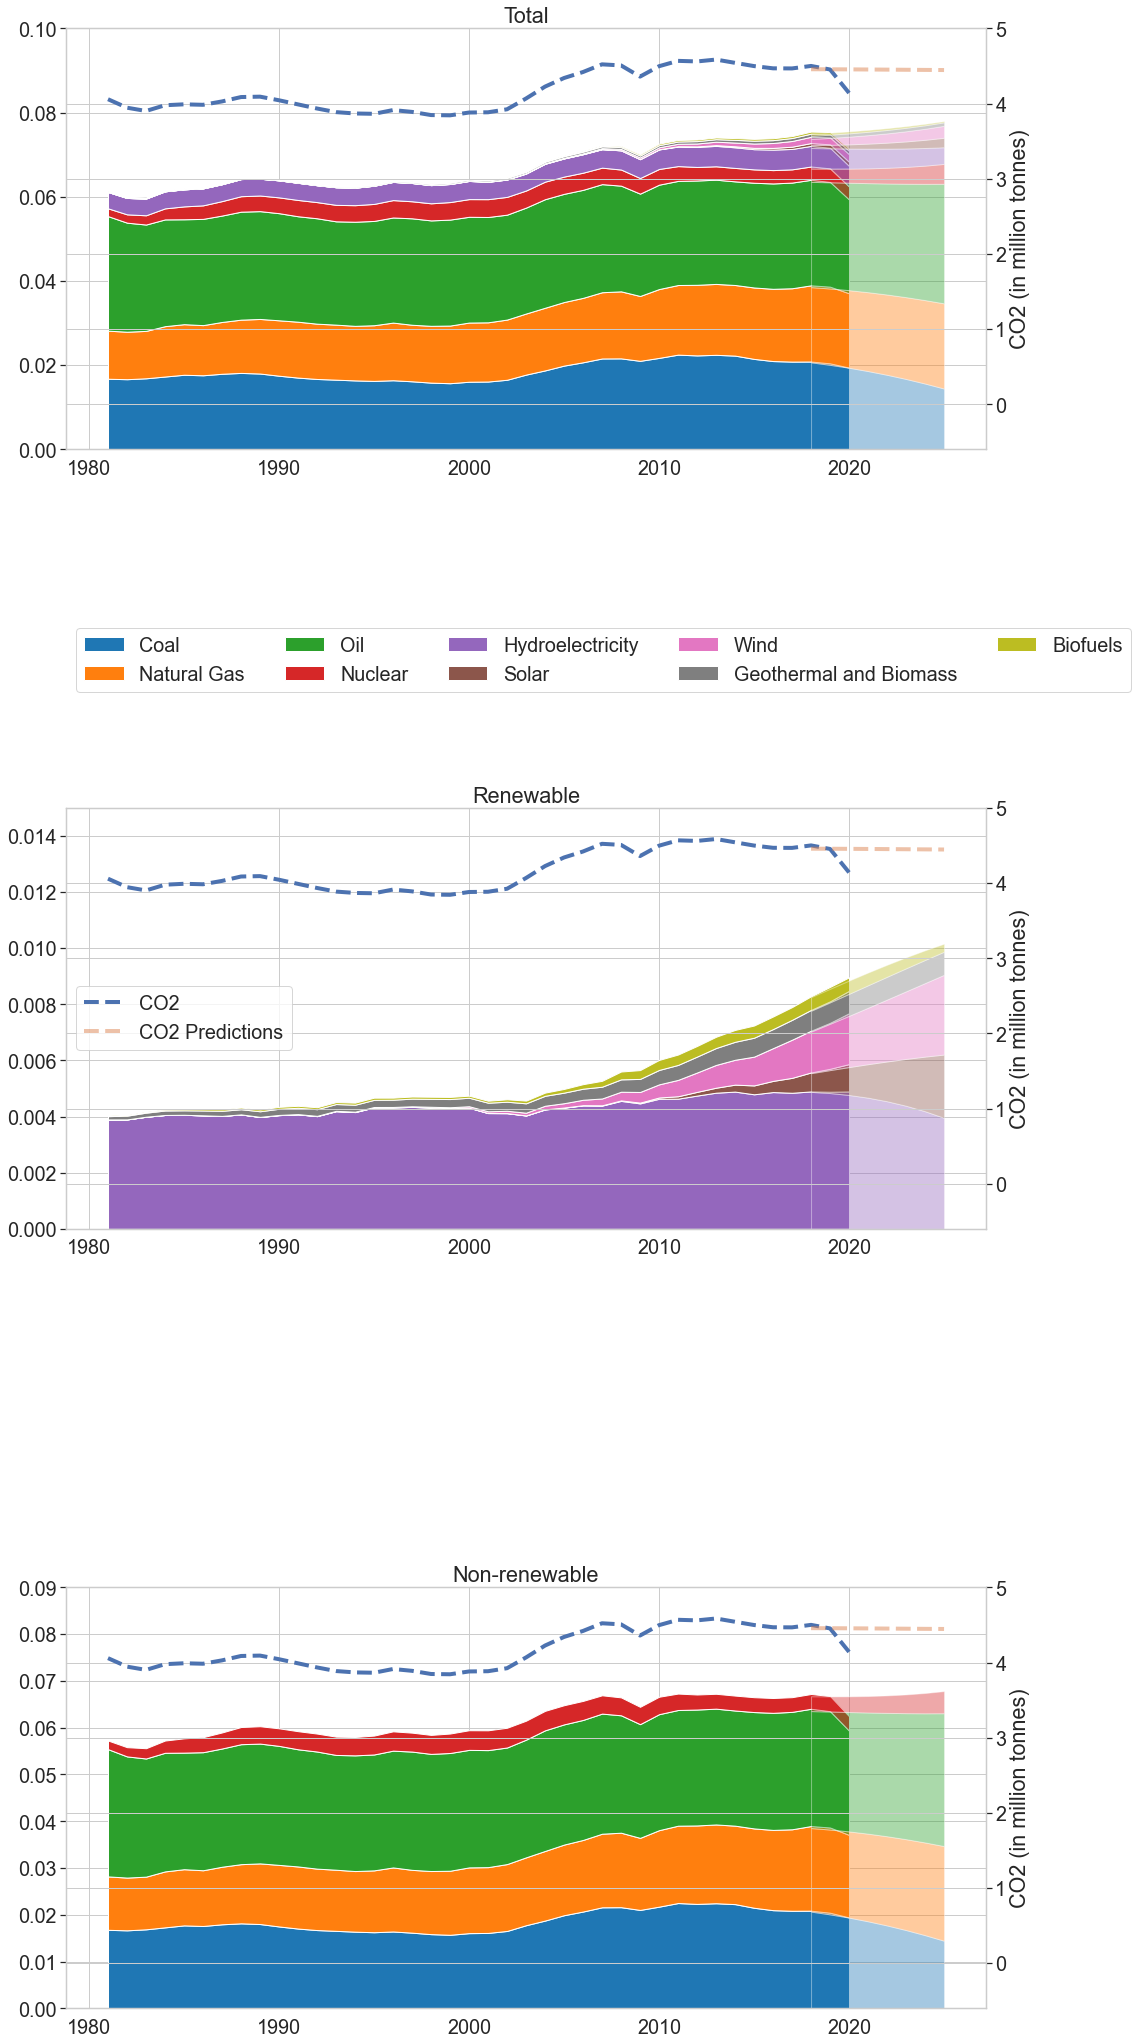

In [195]:
sns.set(rc={'figure.figsize':(17, 30)}, font_scale = 1.8, style = "whitegrid")
alp = 0.4

plt.subplot(3,1,1)
plt.title("Total")
plt.stackplot(list(df_stack["Year"]) , np.transpose(df_stack[['Coal', 'Natural Gas', 'Oil', 'Nuclear', 'Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass','Biofuels']].to_numpy()), labels = ['Coal', 'Natural Gas', 'Oil', 'Nuclear', 'Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass','Biofuels'],colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
plt.stackplot(list(df_stack_pred["Year"]) , np.transpose(df_stack_pred[['Coal', 'Natural Gas', 'Oil', 'Nuclear', 'Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass','Biofuels']].to_numpy()), alpha = alp, colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
ax = plt.gca()
ax.set_ylim([0, 0.1])
plt.legend(loc='center left', bbox_to_anchor=(0,-0.5), ncol = 5)
ax2 = ax.twinx()
ax2.set_ylim([-0.6, 5])
sns.lineplot(x = 'Year', y = 'CO2 (in million tonnes)', data = df_stack, ax = ax2, linewidth = 4)
sns.lineplot(x = 'Year', y = 'CO2 Predictions', data = df_stack_pred, ax = ax2, linewidth = 4, alpha = 0.5)
ax2.lines[0].set_linestyle("--")
ax2.lines[1].set_linestyle("--")

plt.subplot(3,1,2)
plt.title("Renewable")
plt.stackplot(list(df_stack["Year"]) , np.transpose(df_stack[['Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass','Biofuels']].replace(np.nan, 0).to_numpy()), colors = ['#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22'])
plt.stackplot(list(df_stack_pred["Year"]) , np.transpose(df_stack_pred[['Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass','Biofuels']].replace(np.nan, 0).to_numpy()), colors = ['#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22'],alpha = alp)
ax = plt.gca()
ax.set_ylim([0, 0.015])
ax2 = ax.twinx()
ax2.set_ylim([-0.6, 5])

sns.lineplot(x = 'Year', y = 'CO2 (in million tonnes)', data = df_stack, ax = ax2, linewidth = 4, label = 'CO2')
sns.lineplot(x = 'Year', y = 'CO2 Predictions', data = df_stack_pred, ax = ax2, linewidth = 4, label = 'CO2 Predictions', alpha = 0.5)
ax2.lines[0].set_linestyle("--")
ax2.lines[1].set_linestyle("--")
ax2.legend(loc='center left', bbox_to_anchor=(0, 0.5))


plt.subplot(3,1,3)
plt.title("Non-renewable")
plt.stackplot(list(df_stack["Year"]) , np.transpose(df_stack[['Coal', 'Natural Gas', 'Oil', 'Nuclear']].to_numpy()), colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.stackplot(list(df_stack_pred["Year"]) , np.transpose(df_stack_pred[['Coal', 'Natural Gas', 'Oil', 'Nuclear']].to_numpy()), colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'],alpha = alp)
ax = plt.gca()
ax.set_ylim([0, 0.09])
ax2 = ax.twinx()
ax2.set_ylim([-0.6, 5])
sns.lineplot(x = 'Year', y = 'CO2 (in million tonnes)', data = df_stack, ax = ax2, linewidth = 4)
sns.lineplot(x = 'Year', y = 'CO2 Predictions', data = df_stack_pred, ax = ax2, linewidth = 4, alpha = 0.5)
ax2.lines[0].set_linestyle("--")
ax2.lines[1].set_linestyle("--")


plt.tight_layout(pad = 3)
#plt.suptitle('Change in the Relative Share of Energy Sources (per capita) - World')
plt.savefig('prediction.png')
plt.show()


In [161]:
df_stack_pred = df_future_CO2[(df_future_wo2020['Country']=='Total World')&(df_future_CO2['Year']>2017)].reset_index()
df_stack_pred = df_stack_pred[['Country', 'Year',
       'Total Primary Energy Consumption', 'Coal', 'Natural Gas', 'Oil', 'Nuclear', 'Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass', 'Biofuels', 'CO2 (in million tonnes)']]

No handles with labels found to put in legend.
No handles with labels found to put in legend.


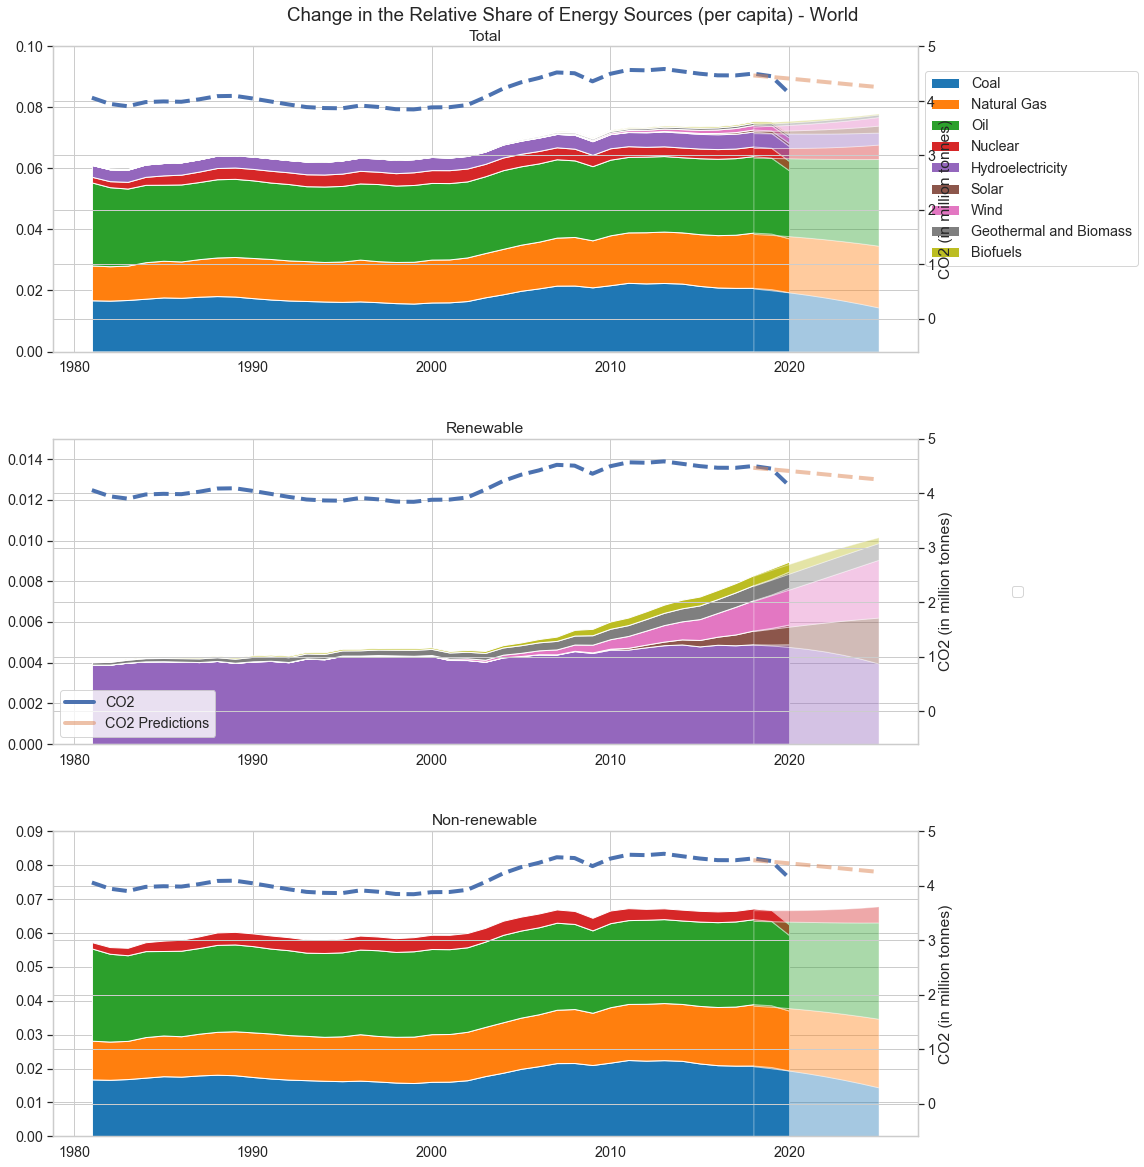

In [165]:
sns.set(rc={'figure.figsize':(17, 17)}, font_scale = 1.3, style = "whitegrid")
alp = 0.4

plt.subplot(3,1,1)
plt.title("Total")
plt.stackplot(list(df_stack["Year"]) , np.transpose(df_stack[['Coal', 'Natural Gas', 'Oil', 'Nuclear', 'Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass','Biofuels']].to_numpy()), labels = ['Coal', 'Natural Gas', 'Oil', 'Nuclear', 'Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass','Biofuels'],colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
#sns.lineplot(x = 'Year', y = 'Total Primary Energy Consumption', data = df_stack)
plt.stackplot(list(df_stack_pred["Year"]) , np.transpose(df_stack_pred[['Coal', 'Natural Gas', 'Oil', 'Nuclear', 'Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass','Biofuels']].to_numpy()), alpha = alp, colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
#sns.lineplot(x = 'Year', y = 'CO2 (in million tonnes)', data = df_stack)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.6))
ax = plt.gca()
ax.set_ylim([0, 0.1])
#plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
ax2 = ax.twinx()
ax2.set_ylim([-0.6, 5])
sns.lineplot(x = 'Year', y = 'CO2 (in million tonnes)', data = df_stack, ax = ax2, linewidth = 4)
sns.lineplot(x = 'Year', y = 'CO2 (in million tonnes)', data = df_stack_pred, ax = ax2, linewidth = 4, alpha = 0.5)
ax2.lines[0].set_linestyle("--")
ax2.lines[1].set_linestyle("--")

plt.subplot(3,1,2)
plt.title("Renewable")
plt.stackplot(list(df_stack["Year"]) , np.transpose(df_stack[['Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass','Biofuels']].replace(np.nan, 0).to_numpy()), colors = ['#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
#sns.lineplot(x = 'Year', y = 'Total Renewable Energy', data = df_stack)
plt.stackplot(list(df_stack_pred["Year"]) , np.transpose(df_stack_pred[['Hydroelectricity', 'Solar',
       'Wind', 'Geothermal and Biomass','Biofuels']].replace(np.nan, 0).to_numpy()), colors = ['#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'],alpha = alp)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax = plt.gca()
ax.set_ylim([0, 0.015])
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
ax2 = ax.twinx()
ax2.set_ylim([-0.6, 5])
sns.lineplot(x = 'Year', y = 'CO2 (in million tonnes)', data = df_stack, ax = ax2, linewidth = 4, label = 'CO2')
sns.lineplot(x = 'Year', y = 'CO2 (in million tonnes)', data = df_stack_pred, ax = ax2, linewidth = 4, label = 'CO2 Predictions', alpha = 0.5)
ax2.lines[0].set_linestyle("--")
ax2.lines[1].set_linestyle("--")


plt.subplot(3,1,3)
plt.title("Non-renewable")
plt.stackplot(list(df_stack["Year"]) , np.transpose(df_stack[['Coal', 'Natural Gas', 'Oil', 'Nuclear']].to_numpy()), colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
#sns.lineplot(x = 'Year', y = 'Total Non-Renewable Energy', data = df_stack)
plt.stackplot(list(df_stack_pred["Year"]) , np.transpose(df_stack_pred[['Coal', 'Natural Gas', 'Oil', 'Nuclear']].to_numpy()), colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'],alpha = alp)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax = plt.gca()
ax.set_ylim([0, 0.09])
#plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
ax2 = ax.twinx()
ax2.set_ylim([-0.6, 5])
sns.lineplot(x = 'Year', y = 'CO2 (in million tonnes)', data = df_stack, ax = ax2, linewidth = 4)
sns.lineplot(x = 'Year', y = 'CO2 (in million tonnes)', data = df_stack_pred, ax = ax2, linewidth = 4, alpha = 0.5)
ax2.lines[0].set_linestyle("--")
ax2.lines[1].set_linestyle("--")


plt.tight_layout(pad = 3)
plt.suptitle('Change in the Relative Share of Energy Sources (per capita) - World')
plt.savefig('prediction with polyfit.png')
plt.show()